<a href="https://colab.research.google.com/github/InscribeDeeper/bert_utils/blob/Jujun/confcall_newtranscript_regression_step8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# inport packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# import sys, os
# cur_path = os.path.join('/content/drive/MyDrive/Conf_Call/','Conf_Call')
# os.chdir(cur_path)
# print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import statsmodels.api as sm
from scipy import stats

In [3]:
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels.panel import compare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
t4 = pd.read_csv('/content/drive/MyDrive/temp/reg_data_20220817.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
list(t4.columns)

['fyearq',
 'fqtr',
 'permno',
 'tic',
 'path',
 'report_day',
 'rdq',
 'encoded_unique_ticker_ts',
 'sic',
 'gap',
 'gvkey',
 'fyr',
 'roaq',
 'leverage',
 'indfmt',
 'BM',
 'size',
 'surp',
 'car_-1_1',
 'car_-1_7',
 'car_-1_14',
 'car_-1_30',
 'car_-1_60',
 'car_0_1',
 'car_0_7',
 'car_0_14',
 'car_0_30',
 'car_0_60',
 'car_1_7',
 'car_1_14',
 'car_1_30',
 'car_1_60',
 'car_2_7',
 'car_2_14',
 'car_2_30',
 'car_2_60',
 'car_7_14',
 'car_7_30',
 'car_7_60',
 'sum_sent_question',
 'mean_sent_question',
 'num_question',
 'fyearqrt',
 'anl_chg_new',
 'anl_chg_dis',
 'anl_chg_unch',
 'anl_chg_new_%',
 'anl_chg_dis_%',
 'anl_chg_unch_%',
 'profile_m1',
 'profile_m2',
 'profile_m4',
 'm_netqa_h4d',
 'm_netqa_henry',
 'm_netqa_lm',
 'a_net_henry',
 'a_net_h4d',
 'profile_m4-2',
 'profile_m4-1',
 '%uncertainty',
 'a_net_lm',
 'log_sentence',
 'net_lm',
 'net_henry',
 'net_h4d',
 'net_lm_qa',
 'm_net_lm',
 'm_net_henry',
 'm_net_h4d',
 'avg_lm',
 'avg_henry',
 'avg_h4d',
 'avg_lm_qa',
 'avg_h

In [6]:
t5 = t4[t4.log_pre_wrd_count != 0]

In [7]:
t6 = t5[~t5.path.str.contains('Presents')]

In [8]:
def get_input(t4):
  input = t4[(t4.fyearq>=2013)&(t4.fyearq<=2017)]

  print('input', input.shape)

  # input1 =  input[(input.sic<6000)|(input.sic>6999)]
  # input1 = input1[(input1.sic<4900)|(input1.sic>4949)]
  # print(input1.shape)
  sic_conditions = list(zip([4900, 6000], [4949, 6999]))
  sic_bool_index = np.all(
  [
              ~input["sic"].between(cur_lower, cur_upper)
              for cur_lower, cur_upper in sic_conditions
          ],
          axis=0,
      )
  input1 = input[sic_bool_index].reset_index(drop=True)
  display(input1.sic.hist(bins=10))
  input1 = sm.add_constant(input1)

  input1 = input1[input1.gap<=30]

  input1 = input1.reset_index(drop=True)
  print(input1.shape)

  return input1

input (42466, 110)


(33348, 111)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


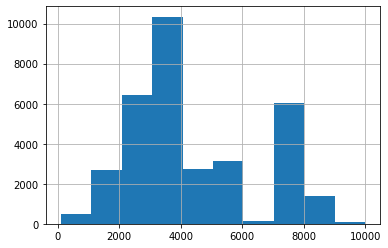

In [9]:
input_data = get_input(t6)

In [10]:
input_data.head()

const  fyearq  fqtr  permno   tic  \
0    1.0    2013     2   92988   CFN   
1    1.0    2014     2   31077   CUB   
2    1.0    2015     2   31077   CUB   
3    1.0    2014     3   89252   FVE   
4    1.0    2016     4   13599  LFVN   

                                                path  report_day       rdq  \
0  /backup_disk/conference_calls/CFN/1167001-care...    20130207  20130207   
1  /backup_disk/conference_calls/CUB/2213213-cubi...    20140512  20140512   
2  /backup_disk/conference_calls/CUB/3193576-cubi...    20150518  20150518   
3  /backup_disk/conference_calls/FVE/2762725-five...    20141216  20141216   
4  /backup_disk/conference_calls/LFVN/4030032-lif...    20161212  20161212   

  encoded_unique_ticker_ts     sic  ...  SP_fin_7  SP_fin_8  SP_gen_1  \
0                  16050.0  3841.0  ...  0.366667  0.103377  0.748107   
1                  22127.0  3578.0  ...  0.000000  0.039812  0.586107   
2                  22128.0  3578.0  ...  0.142857  0.089356  0.449646   
3                  31295.0  8051.0  ...  0.400000  0.339859  0.726046   
4                  47142.0  2834.0  ...  0.277778  0.260099  0.590752   

   SP_gen_2  SP_gen_3  SP_gen_4      SP_gen_5  SP_gen_6  SP_gen_7  SP_gen_8  
0  0.733333  0.999971  1.000000  5.571296e-03  0.733333  0.700000  0.356206  
1  0.538462  0.761577  0.981656  2.361297e-07  0.615385  0.538462  0.300696  
2  0.357143  0.629465  0.983389  2.499808e-07  0.357143  0.357143  0.274026  
3  0.600000  0.726046  0.726046  2.120681e-01  0.600000  0.600000  0.426117  
4  0.555556  0.954151  0.999967  1.709000e-04  0.555556  0.500000  0.438642  

[5 rows x 111 columns]

In [11]:
input_data.tail()

const  fyearq  fqtr  permno   tic  \
33343    1.0    2014     2   90955  SSKN   
33344    1.0    2014     3   90955  SSKN   
33345    1.0    2015     2   90955  SSKN   
33346    1.0    2014     1   77425  USAK   
33347    1.0    2016     3   77425  USAK   

                                                    path  report_day  \
33343  ./code/data/newly_add_transcript/transcript_v5...    20140813   
33344  ./code/data/newly_add_transcript/transcript_v5...    20141112   
33345  ./code/data/newly_add_transcript/transcript_v5...    20150813   
33346  ./code/data/newly_add_transcript/transcript_v5...    20140430   
33347  ./code/data/newly_add_transcript/transcript_v5...    20161104   

            rdq encoded_unique_ticker_ts     sic  ...  SP_fin_7  SP_fin_8  \
33343  20140813                  new1861  3841.0  ...  0.272727  0.123632   
33344  20141112                  new1863  3841.0  ...  0.000000  0.019050   
33345  20150813                  new1862  3841.0  ...  0.428571  0.296217   
33346  20140430                  new1900  4213.0  ...  0.166667  0.123707   
33347  20161104                  new1901  4213.0  ...  0.269231  0.193198   

       SP_gen_1  SP_gen_2  SP_gen_3  SP_gen_4      SP_gen_5  SP_gen_6  \
33343  0.353013  0.272727  0.388314  0.703156  1.267048e-06  0.272727   
33344  0.498158  0.500000  0.498158  0.597789  5.824806e-06  0.500000   
33345  0.764521  0.571429  0.764521  0.900047  3.048553e-01  0.857143   
33346  0.671508  0.666667  0.805634  0.992667  8.832748e-04  0.666667   
33347  0.566908  0.500000  0.998131  0.999998  9.630307e-08  0.500000   

       SP_gen_7  SP_gen_8  
33343  0.272727  0.231287  
33344  0.500000  0.394658  
33345  0.571429  0.517082  
33346  0.666667  0.450036  
33347  0.461538  0.331531  

[5 rows x 111 columns]

In [12]:
input_data = input_data.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])

In [13]:
input_data.shape

(28671, 111)

In [14]:
spvs = ['SP_1'] #,'SP_2', 'SP_3', 'SP_4', 'SP_5', 'SP_6', 'SP_7'
include_car = ['-1_1', '-1_7','-1_14', '-1_30','-1_60',
               '0_1', '0_7', '0_14', '0_30','0_60',
                '1_7', '1_14', '1_30','1_60',
                '2_7', '2_14', '2_30','2_60',
                '7_14', '7_30','7_60'] 
target_car = ['car_'+i for i in include_car]

In [15]:
input_data.groupby(['fyearq','fqtr']).size().to_frame()

0
fyearq fqtr      
2013   1     1326
       2     1400
       3     1402
       4     1406
2014   1     1344
       2     1485
       3     1497
       4     1559
2015   1     1556
       2     1558
       3     1550
       4     1536
2016   1     1524
       2     1525
       3     1495
       4     1476
2017   1     1273
       2     1278
       3     1186
       4     1295

In [16]:
len(set(input_data.permno))

2061

In [17]:
# CAR in percentage
input_data[target_car] = input_data[target_car]*100

In [18]:
input_data[target_car].describe()

car_-1_1      car_-1_7     car_-1_14     car_-1_30     car_-1_60  \
count  28671.000000  28671.000000  28671.000000  28671.000000  28671.000000   
mean       0.102115      0.167508      0.117442      0.107125     -0.169610   
std        9.621999     11.954926     13.755390     18.101512     24.661038   
min      -85.877936    -98.537078    -99.667172   -178.810914   -243.792347   
25%       -4.535811     -5.784368     -6.646737     -8.478664    -11.862732   
50%        0.113191      0.076086      0.046910     -0.107931     -0.343123   
75%        4.876909      5.886847      6.606809      8.139472     11.006279   
max      316.785076    310.657994    319.440168    696.256117    716.529275   

            car_0_1       car_0_7      car_0_14      car_0_30      car_0_60  \
count  28671.000000  28671.000000  28671.000000  28671.000000  28671.000000   
mean       0.034005      0.099399      0.049333      0.039015     -0.237719   
std        9.393633     11.756512     13.562463     17.918558     24.494455   
min      -89.428879    -97.697061    -92.304405   -148.012624   -212.994057   
25%       -4.447661     -5.651755     -6.614728     -8.460526    -11.776200   
50%        0.013098      0.042787      0.022177     -0.193197     -0.330458   
75%        4.639907      5.727430      6.459152      7.990531     10.798894   
max      322.070006    315.942924    323.248337    700.064286    720.337444   

       ...      car_1_14      car_1_30      car_1_60       car_2_7  \
count  ...  28671.000000  28671.000000  28671.000000  28671.000000   
mean   ...      0.009251     -0.001066     -0.277800      0.065393   
std    ...     11.848462     16.589056     23.507665      6.776766   
min    ...   -144.288673   -289.630061   -354.611493    -70.701855   
25%    ...     -5.056546     -7.142716    -10.995143     -2.916869   
50%    ...     -0.140455     -0.258689     -0.465408     -0.154250   
75%    ...      4.895093      6.642172      9.855858      2.696923   
max    ...    322.539802    699.355751    719.628908    227.915897   

           car_2_14      car_2_30      car_2_60      car_7_14      car_7_30  \
count  28671.000000  28671.000000  28671.000000  28671.000000  28671.000000   
mean       0.015327      0.005010     -0.271724     -0.034437     -0.044754   
std        9.447127     14.911037     22.275129      6.891117     13.230404   
min      -88.229036   -233.570424   -298.551857    -70.661617   -212.962755   
25%       -4.083902     -6.339431    -10.140071     -2.913474     -5.476640   
50%       -0.246341     -0.353531     -0.460736     -0.162316     -0.298902   
75%        3.746020      5.617724      9.057616      2.572623      4.817083   
max      324.167821    700.983770    721.256928    324.038446    700.854396   

           car_7_60  
count  28671.000000  
mean      -0.321488  
std       20.851445  
min     -277.944188  
25%       -9.484434  
50%       -0.554994  
75%        8.420021  
max      721.127553  

[8 rows x 21 columns]

In [19]:
# add firm size quantile
input_data['size_qtl'] = pd.qcut(input_data['size'], 3, labels=[1,2,3])

In [20]:
input_data['size_qtl'].value_counts()

1    9557
2    9557
3    9557
Name: size_qtl, dtype: int64

In [21]:
# add firm tone quantile
input_data['tone_qtl'] = pd.qcut(input_data['net_lm'], 2, labels=[0,1])

In [22]:
input_data['tone_qtl'].value_counts()

0    14349
1    14322
Name: tone_qtl, dtype: int64

In [23]:
# add firm sue quantile
input_data['surp_qtl'] = pd.qcut(input_data['surp'], 2, labels=[0,1])

In [24]:
input_data['surp_qtl'].value_counts()

0    14336
1    14335
Name: surp_qtl, dtype: int64

# prepare for regression

### define regression function

In [25]:
def panel_reg(data, time_effect_on,  target = ['car_11'], selected_cols = ['bm', 'leverage', 'log_vol', 'roa', 'size',  'sue', 'volatility'], to_save=False):
    entity_effects = True
    time_effects = True
    #exog = sm.add_constant(data[selected_cols])
    model = PanelOLS(data[target], data[selected_cols], entity_effects=entity_effects, time_effects=time_effects)
    model = model.fit(cov_type='clustered', cluster_entity=entity_effects, cluster_time=time_effects)
    return model

In [26]:
def as_num(x):
    if len(x.strip()) != 0:
        x = float('{:.4f}'.format(float(x)))  # .10f 保留10位小数
    else:
        x = None
    return x

def stat_summary_convertor(table1):
    a = pd.DataFrame(table1)
    columns_str = list(map(lambda x: str(x), a.iloc[0, 1:].tolist()))
    b = pd.DataFrame(a.iloc[1:, 1:].values, columns=columns_str, index=a.iloc[1:, 0])
    b = b.applymap(lambda x: as_num(x.format(4)))
    return b

def get_formated_table(model, features_cols):
    res = model.summary.tables[1]
    res = stat_summary_convertor(res)
    res['key'] = features_cols
    res = res.loc[:, ['key', 'Parameter','T-stat']]
    res.columns = ['key', 'our_coef', 'our_T-stat']
    return res

In [27]:
def run_reg(t2, gap, include_car, features_cols = ['bm_w','size','surp','leverage_w','roa_w'], lang_cols = ['net_tone']):
  #  
  # lang_cols = ['net_tone']
  print(lang_cols)
  use_cols = lang_cols+ features_cols+['const']
  target_cols = ['car_'+i for i in include_car]
  
  

  data = t2[(t2.fyearq>=2013)&(t2.fyearq<=2017)]

  
  
  print(data[use_cols+target_cols].isnull().sum())

  data = data[data.gap <= gap]
  data = data.dropna(subset=use_cols)
  print(data.shape)
  print('num_gvk',len(set(data.gvkey)))

  print("before")
  display(data[use_cols].describe().round(2))
  data[ features_cols+target_cols] = data[ features_cols+target_cols].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)
  cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'tr:hover',
    'props': [('background-color', '#ffffb3')]}
  cor = data[use_cols+target_cols].corr()
  print("after winsorize")
  display(cor.style.bar(align='mid', color=['#d65f5f', '#5fba7d'],axis=None, vmin=-1, vmax=1).set_table_styles([cell_hover]))
  display(data[use_cols].describe().round(4))
  display(data[target_cols].describe().round(4))
  for c in features_cols: #+lang_cols
    data[c] = zscore(data[c])

  #print(data[features_cols+lang_cols].describe())
  print("after z-normal")
  display(data[use_cols+['car_-1_1', 'car_0_7','car_1_14']].describe().round(4))

  print(data.shape)
  div_type = ''
  seeds = 124
  to_save = True
  time_effect_on = 'fyearqrt'

  data = data.set_index(['gvkey', time_effect_on])


  paper = pd.read_excel('/content/drive/MyDrive/Conf_Call/Conf_Call/code/5_emotion_extraction/MAML/mid_stage_output/paper_summary.xlsx')
  paper.columns = ['key', 'paper_coef', 'paper_T-stat']
  # paper.loc[paper['key'] == 'SP', 'key'] = language_cols[0]
  paper.loc[paper['key'] == 'BM', 'key'] = 'bm'

  p11 = paper.iloc[0:12].copy().add_prefix(
      'car_-1_1'+'_').rename(columns={'car_-1_1'+'_'+'key': 'key'})
  p260 = paper.iloc[18:].copy().add_prefix(
      'car_2_60'+'_').rename(columns={'car_2_60'+'_'+'key': 'key'})

  #t = 0
  #model_name = []
  model_res = {}
  for target in target_cols:
      #t += 1
      model = panel_reg(data,time_effect_on,  target=[target], selected_cols=use_cols, to_save=False)
      #model_name.append(model +str(t))
      res11 = get_formated_table(model, use_cols).add_prefix(target+'_').rename(columns={target+'_'+'key': 'key'})
      p11 = p11.merge(res11, how='outer', left_on='key', right_on='key')
      model_res[target] = model
      if (target == 'car_-1_1') or (target == 'car_0_7') or (target == 'car_1_14'):
        display(model)
  r2 = compare(model_res,stars=True)
  display(compare(model_res))

  respNA = p11.merge(p260, how='outer', left_on='key', right_on='key')
  resp = respNA.fillna(0)
  resp = resp.set_index('key').T
  resp['type'] = [0,1] * (int(resp.shape[0]/2))
  resp0 = resp[resp['type'] == 0].T # 0 是 coef
  resp1 = resp[resp['type'] == 1].T # 1 是 ttest  


  cell_hover = {  # for row hover use <tr> instead of <td>
      'selector': 'tr:hover',
      'props': [('background-color', '#ffffb3')]
  }
  r0 = resp0.loc[use_cols,:]
  r0 = r0.filter(regex='our')
  display(r0.T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'],axis=None, vmin=-2, vmax=2).set_table_styles([cell_hover]))



  cell_hover = {  # for row hover use <tr> instead of <td>
      'selector': 'tr:hover',
      'props': [('background-color', '#ffffb3')]
  }
  r1 = resp1.loc[use_cols,:]
  r1 = r1.filter(regex='our')
  display(r1.T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'],axis=None, vmin=-10, vmax=10).set_table_styles([cell_hover]))

  print("**************************************************************")
  return r0, r1, r2, model

In [28]:
import re

In [29]:
def decimal_func(input:str):
  res = None
  try:
    x = re.search('-?\d*\.{0,1}\d+', input)
    x1 = x.group(0)
    res = re.sub(str(x1),str(round(float(str(x1)),2)), input)
  except:
    res = input

  return res


## for all data reprot

In [30]:
#for reporting table 1
input2 = input_data.copy()


# vv = ['SP_gen_v2','SP_fin_8','profile_m1_fin','m_net_lm', 'a_net_lm','%uncertainty','net_lm', 'avg_henry', 'avg_h4d', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']] = input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

input2[vv].describe().round(2)

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp        BM  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.08      0.03     -0.06      0.15      0.30      0.00      0.47   
std        8.69     10.62     10.49      0.05      0.18      0.05      0.39   
min      -25.20    -30.91    -32.17      0.00     -1.00     -0.23      0.00   
25%       -4.54     -5.65     -5.06      0.11      0.19     -0.01      0.20   
50%        0.11      0.04     -0.14      0.15      0.31      0.00      0.37   
75%        4.88      5.73      4.90      0.18      0.42      0.01      0.62   
max       25.16     32.42     34.00      1.00      1.00      0.28      2.16   

           size  leverage      roaq  log_num_analyst  
count  28671.00  28671.00  28671.00         28671.00  
mean       3.10      0.78      0.06             1.67  
std        0.82      2.76      0.22             0.67  
min        1.23    -12.00     -0.92             0.00  
25%        2.54      0.01      0.05             1.39  
50%        3.10      0.39      0.11             1.79  
75%        3.63      0.97      0.17             2.20  
max        5.17     16.82      0.40             3.22

In [31]:
input2[vv].corr().round(2)

car_-1_1  car_0_7  car_1_14  SP_fin_8  avg_lm  surp    BM  \
car_-1_1             1.00     0.80      0.47     -0.06    0.18  0.07  0.03   
car_0_7              0.80     1.00      0.72     -0.05    0.14  0.05  0.05   
car_1_14             0.47     0.72      1.00     -0.02    0.07  0.01  0.07   
SP_fin_8            -0.06    -0.05     -0.02      1.00   -0.15 -0.01  0.02   
avg_lm               0.18     0.14      0.07     -0.15    1.00  0.05 -0.13   
surp                 0.07     0.05      0.01     -0.01    0.05  1.00 -0.05   
BM                   0.03     0.05      0.07      0.02   -0.13 -0.05  1.00   
size                 0.01    -0.00     -0.01      0.03    0.07 -0.06 -0.32   
leverage             0.01     0.01      0.01      0.01   -0.01 -0.00 -0.00   
roaq                 0.05     0.03      0.01      0.05    0.02 -0.07  0.01   
log_num_analyst      0.02     0.02      0.02     -0.01    0.06 -0.06 -0.23   

                 size  leverage  roaq  log_num_analyst  
car_-1_1         0.01      0.01  0.05             0.02  
car_0_7         -0.00      0.01  0.03             0.02  
car_1_14        -0.01      0.01  0.01             0.02  
SP_fin_8         0.03      0.01  0.05            -0.01  
avg_lm           0.07     -0.01  0.02             0.06  
surp            -0.06     -0.00 -0.07            -0.06  
BM              -0.32     -0.00  0.01            -0.23  
size             1.00      0.09  0.41             0.68  
leverage         0.09      1.00  0.06             0.07  
roaq             0.41      0.06  1.00             0.23  
log_num_analyst  0.68      0.07  0.23             1.00

In [ ]:
b = input2[vv].describe().round(2)
b.to_excel('/content/drive/MyDrive/temp/result/stat.xlsx')

a = input2[vv].corr().round(2)
a.to_excel('/content/drive/MyDrive/temp/result/corr.xlsx')

In [ ]:
#for reporting appendix
input2 = input_data.copy()

vv = ['SP_fin_8','SP_gen_8','SP_fin_1','profile_m1_fin','m_net_lm', 'a_net_lm','net_lm', 'avg_henry', 'avg_h4d','%uncertainty', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

#vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_1', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['log_total_wrd_count']] = input2[['log_total_wrd_count']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

input2[vv].describe().round(2)

SP_fin_8  SP_gen_8  SP_fin_1  profile_m1_fin  m_net_lm  a_net_lm  \
count  28671.00  28671.00  28671.00        26899.00  28671.00  28671.00   
mean       0.15      0.37      0.34            0.15      0.43      0.17   
std        0.05      0.09      0.12            0.03      0.26      0.19   
min        0.00      0.00      0.00            0.00     -1.00     -1.00   
25%        0.11      0.31      0.26            0.13      0.27      0.05   
50%        0.15      0.37      0.33            0.15      0.45      0.17   
75%        0.18      0.42      0.40            0.17      0.61      0.29   
max        1.00      1.00      1.00            1.00      1.00      1.00   

         net_lm  avg_henry   avg_h4d  %uncertainty  ...   car_0_7  car_1_14  \
count  28671.00   28671.00  28671.00      28671.00  ...  28671.00  28671.00   
mean       0.40       0.49      0.37          0.02  ...      0.10      0.01   
std        0.24       0.15      0.11          0.01  ...     11.76     11.85   
min       -1.00      -0.67     -0.37          0.00  ...    -97.70   -144.29   
25%        0.26       0.40      0.30          0.01  ...     -5.65     -5.06   
50%        0.43       0.50      0.37          0.01  ...      0.04     -0.14   
75%        0.57       0.59      0.44          0.02  ...      5.73      4.90   
max        1.00       1.00      1.00          0.10  ...    315.94    322.54   

         SP_fin    avg_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.34      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.12      0.18      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.26      0.19     -0.01      0.20      2.54      0.01      0.05   
50%        0.33      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.40      0.42      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst  
count         28671.00  
mean              1.67  
std               0.67  
min               0.00  
25%               1.39  
50%               1.79  
75%               2.20  
max               3.22  

[8 rows x 22 columns]

In [ ]:
input2[vv].corr().round(2)

SP_fin_8  SP_gen_8  SP_fin_1  profile_m1_fin  m_net_lm  \
SP_fin_8                 1.00      0.63      0.75            0.22     -0.12   
SP_gen_8                 0.63      1.00      0.48            0.20     -0.07   
SP_fin_1                 0.75      0.48      1.00            0.18     -0.04   
profile_m1_fin           0.22      0.20      0.18            1.00     -0.07   
m_net_lm                -0.12     -0.07     -0.04           -0.07      1.00   
a_net_lm                -0.13     -0.03     -0.06           -0.08      0.29   
net_lm                  -0.17     -0.10     -0.10           -0.09      0.90   
avg_henry               -0.11     -0.08      0.04           -0.06      0.44   
avg_h4d                 -0.09     -0.04     -0.02           -0.07      0.33   
%uncertainty             0.02      0.05      0.05           -0.01      0.01   
log_total_wrd_count      0.04      0.11      0.19            0.02      0.08   
car_-1_1                -0.06     -0.04     -0.04            0.01      0.11   
car_0_7                 -0.04     -0.02     -0.03            0.01      0.08   
car_1_14                -0.02     -0.01     -0.01            0.02      0.04   
SP_fin                   0.75      0.48      1.00            0.18     -0.04   
avg_lm                  -0.15     -0.07     -0.06           -0.09      0.87   
surp                    -0.00     -0.00     -0.01           -0.01      0.03   
BM                       0.03     -0.02     -0.04            0.05     -0.11   
size                     0.03      0.12      0.22            0.02      0.11   
leverage                 0.00      0.00      0.00            0.00      0.00   
roaq                     0.05      0.02      0.10            0.05      0.05   
log_num_analyst         -0.01      0.06      0.16           -0.03      0.10   

                     a_net_lm  net_lm  avg_henry  avg_h4d  %uncertainty  ...  \
SP_fin_8                -0.13   -0.17      -0.11    -0.09          0.02  ...   
SP_gen_8                -0.03   -0.10      -0.08    -0.04          0.05  ...   
SP_fin_1                -0.06   -0.10       0.04    -0.02          0.05  ...   
profile_m1_fin          -0.08   -0.09      -0.06    -0.07         -0.01  ...   
m_net_lm                 0.29    0.90       0.44     0.33          0.01  ...   
a_net_lm                 1.00    0.56       0.36     0.35          0.01  ...   
net_lm                   0.56    1.00       0.48     0.39          0.00  ...   
avg_henry                0.36    0.48       1.00     0.33          0.02  ...   
avg_h4d                  0.35    0.39       0.33     1.00          0.03  ...   
%uncertainty             0.01    0.00       0.02     0.03          1.00  ...   
log_total_wrd_count     -0.02    0.03       0.09    -0.06          0.05  ...   
car_-1_1                 0.17    0.16       0.12     0.09         -0.01  ...   
car_0_7                  0.14    0.12       0.09     0.08          0.00  ...   
car_1_14                 0.07    0.05       0.04     0.04          0.01  ...   
SP_fin                  -0.06   -0.10       0.04    -0.02          0.05  ...   
avg_lm                   0.73    0.94       0.50     0.42          0.01  ...   
surp                     0.02    0.03       0.02     0.01         -0.00  ...   
BM                      -0.08   -0.12      -0.19    -0.08         -0.04  ...   
size                    -0.01    0.07       0.13    -0.04          0.10  ...   
leverage                -0.00    0.00      -0.00    -0.00         -0.00  ...   
roaq                    -0.04    0.02       0.06    -0.07         -0.01  ...   
log_num_analyst         -0.02    0.05       0.11    -0.04          0.07  ...   

                     car_0_7  car_1_14  SP_fin  avg_lm  surp    BM  size  \
SP_fin_8               -0.04     -0.02    0.75   -0.15 -0.00  0.03  0.03   
SP_gen_8               -0.02     -0.01    0.48   -0.07 -0.00 -0.02  0.12   
SP_fin_1               -0.03     -0.01    1.00   -0.06 -0.01 -0.04  0.22   
profile_m1_fin          0.01      0.02    0.18   -0.09 -0.

In [ ]:
c = input2[vv].describe().round(2)
c.to_excel('/content/drive/MyDrive/temp/result/stat_appendix.xlsx')

d = input2[vv].corr().round(2)
d.to_excel('/content/drive/MyDrive/temp/result/corr_appendix.xlsx')

In [ ]:
#for reporting validation table
input2 = input_data.copy()

vv = [ 'SP_fin_8', 'avg_lm','%uncertainty'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst', 'profile_m1_fin', ] 
input2 = input2.dropna(subset=vv)
input2[['surp','BM', 'size', 'leverage','roaq','log_num_analyst']] = input2[['surp','BM', 'size', 'leverage','roaq','log_num_analyst']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

input2[vv].describe().round(2)

SP_fin_8    avg_lm  %uncertainty      surp        BM      size  \
count  26899.00  26899.00      26899.00  26899.00  26899.00  26899.00   
mean       0.15      0.30          0.02      0.00      0.47      3.11   
std        0.05      0.18          0.01      0.05      0.39      0.82   
min        0.00     -1.00          0.00     -0.23      0.00      1.24   
25%        0.11      0.19          0.01     -0.01      0.20      2.56   
50%        0.15      0.31          0.01      0.00      0.37      3.11   
75%        0.18      0.43          0.02      0.01      0.62      3.64   
max        0.68      1.00          0.10      0.28      2.16      5.18   

       leverage      roaq  log_num_analyst  profile_m1_fin  
count  26899.00  26899.00         26899.00        26899.00  
mean       0.79      0.06             1.67            0.15  
std        2.73      0.21             0.67            0.03  
min      -11.82     -0.90             0.00            0.00  
25%        0.01      0.05             1.39            0.13  
50%        0.39      0.11             1.79            0.15  
75%        0.98      0.17             2.20            0.17  
max       16.55      0.39             2.83            1.00

In [ ]:
c = input2[vv].describe().round(2)
c.to_excel('/content/drive/MyDrive/temp/result/stat_validation.xlsx')

d = input2[vv].corr().round(2)
d.to_excel('/content/drive/MyDrive/temp/result/corr_validation.xlsx')

In [ ]:
d

SP_fin_8  avg_lm  %uncertainty  surp    BM  size  leverage  \
SP_fin_8             1.00   -0.15          0.02 -0.01  0.03  0.03      0.01   
avg_lm              -0.15    1.00          0.01  0.05 -0.13  0.08     -0.01   
%uncertainty         0.02    0.01          1.00 -0.01 -0.04  0.09      0.01   
surp                -0.01    0.05         -0.01  1.00 -0.05 -0.05     -0.00   
BM                   0.03   -0.13         -0.04 -0.05  1.00 -0.32     -0.00   
size                 0.03    0.08          0.09 -0.05 -0.32  1.00      0.10   
leverage             0.01   -0.01          0.01 -0.00 -0.00  0.10      1.00   
roaq                 0.05    0.02         -0.01 -0.07  0.01  0.41      0.06   
log_num_analyst     -0.01    0.06          0.07 -0.06 -0.23  0.68      0.07   
profile_m1_fin       0.22   -0.09         -0.01 -0.01  0.02  0.02      0.03   

                 roaq  log_num_analyst  profile_m1_fin  
SP_fin_8         0.05            -0.01            0.22  
avg_lm           0.02             0.06           -0.09  
%uncertainty    -0.01             0.07           -0.01  
surp            -0.07            -0.06           -0.01  
BM               0.01            -0.23            0.02  
size             0.41             0.68            0.02  
leverage         0.06             0.07            0.03  
roaq             1.00             0.23            0.05  
log_num_analyst  0.23             1.00           -0.03  
profile_m1_fin   0.05            -0.03            1.00

In [ ]:
# from scipy.stats import pearsonr
# import numpy as np
# input3 = input_data[vv]
# rho = input3.corr()
# pval = input3.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
# p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
# rho.round(2).astype(str) + p

car_-1_1   car_0_7  car_1_14  SP_1_new    avg_lm      surp  \
car_-1_1           1.0***   0.78***   0.41***  -0.02***   0.16***      0.01   
car_0_7           0.78***    1.0***   0.68***  -0.02***   0.12***       0.0   
car_1_14          0.41***   0.68***    1.0***   -0.01**   0.06***     -0.01   
SP_1_new         -0.02***  -0.02***   -0.01**    1.0***   0.02***     0.01*   
avg_lm            0.16***   0.12***   0.06***   0.02***    1.0***     0.01*   
surp                 0.01       0.0     -0.01     0.01*     0.01*    1.0***   
BM                0.03***   0.05***   0.06***  -0.08***  -0.12***    0.01**   
size                 -0.0    -0.01*  -0.02***   0.25***   0.07***  -0.04***   
leverage            -0.01   -0.01**      -0.0      0.01       0.0       0.0   
roaq              0.04***   0.02***       0.0   0.06***     0.01*  -0.05***   
log_num_analyst   0.02***   0.01***      0.01   0.17***   0.06***       0.0   

                       BM      size leverage      roaq log_num_analyst  
car_-1_1          0.03***      -0.0    -0.01   0.04***         0.02***  
car_0_7           0.05***    -0.01*  -0.01**   0.02***         0.01***  
car_1_14          0.06***  -0.02***     -0.0       0.0            0.01  
SP_1_new         -0.08***   0.25***     0.01   0.06***         0.17***  
avg_lm           -0.12***   0.07***      0.0     0.01*         0.06***  
surp               0.01**  -0.04***      0.0  -0.05***             0.0  
BM                 1.0***  -0.29***     0.01   0.02***        -0.21***  
size             -0.29***    1.0***  0.02***   0.39***         0.68***  
leverage             0.01   0.02***   1.0***       0.0             0.0  
roaq              0.02***   0.39***      0.0    1.0***         0.22***  
log_num_analyst  -0.21***   0.68***      0.0   0.22***          1.0***

## for sub data report

In [32]:
#for reporting table for size quantile
input2 = input_data.copy()

# vv = ['SP_gen_v2','SP_fin_8','profile_m1_fin','m_net_lm', 'a_net_lm','%uncertainty','net_lm', 'avg_henry', 'avg_h4d', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
#input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']] = input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

skp_mean_overs = []
skp_corr_size_overs = []
skp_corr_car11_overs = []
skp_corr_car114_overs = []
for q in [1,2,3]:
  input3 = input2[input2.size_qtl == q]
  input3 = input3[vv]
  print('****', q, "****")
  display(input3.describe())
  display(input3.corr())
  m = np.mean(input3.SP_fin_8)
  skp_mean_overs.append((q,m))
  c = input3.corr()
  c1 = c.loc['SP_fin_8','size']
  skp_corr_size_overs.append((q,c1))

  c2 = c.loc['SP_fin_8','car_-1_1']
  skp_corr_car11_overs.append((q,c2))

  c3 = c.loc['SP_fin_8','car_1_14']
  skp_corr_car114_overs.append((q,c3)) 
  


**** 1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean     -0.027463     0.009569     0.092267     0.147941     0.288394   
std      10.256853    13.283514    13.666723     0.065211     0.205778   
min     -25.197869   -30.908179   -32.165697     0.000002    -0.999999   
25%      -5.847615    -7.845313    -7.961300     0.105730     0.164706   
50%      -0.109553    -0.245498    -0.245620     0.141597     0.298485   
75%       5.790171     7.520114     7.557200     0.181512     0.428049   
max      25.160783    32.419872    33.997549     0.997474     1.000000   

              surp           BM         size     leverage         roaq  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean      0.005379     0.618121     2.200983     0.460970    -0.052237   
std       0.074613     0.488923     0.416504     2.374120     0.277802   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.012876     0.262805     1.914578     0.000000    -0.119830   
50%       0.000000     0.512621     2.307724     0.128894     0.052736   
75%       0.014196     0.850340     2.543910     0.609135     0.115099   
max       0.279152     2.164289     2.752584    16.821839     0.396328   

       log_num_analyst  
count      9557.000000  
mean          1.130645  
std           0.587668  
min           0.000000  
25%           0.693147  
50%           1.098612  
75%           1.609438  
max           2.944439

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.763388  0.490607 -0.034286  0.158381  0.085047   
car_0_7          0.763388  1.000000  0.745011 -0.022443  0.132121  0.064682   
car_1_14         0.490607  0.745011  1.000000 -0.019633  0.089916  0.019204   
SP_fin_8        -0.034286 -0.022443 -0.019633  1.000000 -0.130890 -0.010422   
avg_lm           0.158381  0.132121  0.089916 -0.130890  1.000000  0.059823   
surp             0.085047  0.064682  0.019204 -0.010422  0.059823  1.000000   
BM               0.033684  0.055866  0.079117  0.063895 -0.114693 -0.061010   
size             0.032004  0.034998  0.002916 -0.052543  0.024715 -0.121117   
leverage         0.005497  0.021453  0.025335  0.007223 -0.005622 -0.003937   
roaq             0.065558  0.047822  0.024509  0.041136 -0.004864 -0.114020   
log_num_analyst  0.039396  0.051009  0.045377 -0.031999 -0.004000 -0.071920   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.033684  0.032004  0.005497  0.065558         0.039396  
car_0_7          0.055866  0.034998  0.021453  0.047822         0.051009  
car_1_14         0.079117  0.002916  0.025335  0.024509         0.045377  
SP_fin_8         0.063895 -0.052543  0.007223  0.041136        -0.031999  
avg_lm          -0.114693  0.024715 -0.005622 -0.004864        -0.004000  
surp            -0.061010 -0.121117 -0.003937 -0.114020        -0.071920  
BM               1.000000 -0.214270  0.060595  0.248843        -0.121796  
size            -0.214270  1.000000  0.047206  0.267799         0.363132  
leverage         0.060595  0.047206  1.000000  0.065145         0.017860  
roaq             0.248843  0.267799  0.065145  1.000000         0.003786  
log_num_analyst -0.121796  0.363132  0.017860  0.003786         1.000000

**** 2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean      0.256019     0.281815    -0.001264     0.149430     0.298224   
std       9.039576    10.444936     9.937794     0.052056     0.178271   
min     -25.197869   -30.908179   -32.165697     0.000057    -0.799999   
25%      -4.998330    -5.712865    -5.172086     0.115471     0.188240   
50%       0.300556     0.465534     0.023886     0.144484     0.308442   
75%       5.754638     6.445130     5.219585     0.178451     0.421229   
max      25.160783    32.419872    33.997549     0.678680     0.928571   

              surp           BM         size     leverage         roaq  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean     -0.000273     0.441054     3.102309     0.790898     0.091607   
std       0.038304     0.337893     0.195062     2.870894     0.172043   
min      -0.225532     0.000000     2.752679   -12.000363    -0.915130   
25%      -0.004902     0.205859     2.939074     0.005405     0.072578   
50%       0.000462     0.377555     3.103185     0.368519     0.118528   
75%       0.004625     0.586866     3.269565     0.950138     0.170613   
max       0.279152     2.164289     3.441967    16.821839     0.396328   

       log_num_analyst  
count      9557.000000  
mean          1.691651  
std           0.528494  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.079442  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.829377  0.463381 -0.079267  0.201689  0.067504   
car_0_7          0.829377  1.000000  0.691836 -0.061098  0.148584  0.042065   
car_1_14         0.463381  0.691836  1.000000 -0.029192  0.057031 -0.015912   
SP_fin_8        -0.079267 -0.061098 -0.029192  1.000000 -0.147049 -0.014296   
avg_lm           0.201689  0.148584  0.057031 -0.147049  1.000000  0.063656   
surp             0.067504  0.042065 -0.015912 -0.014296  0.063656  1.000000   
BM               0.028750  0.046624  0.046110  0.031052 -0.128661 -0.057002   
size            -0.024264 -0.017463 -0.018740 -0.004701  0.017158  0.026390   
leverage         0.024011  0.015939  0.012159  0.001349 -0.008579  0.012907   
roaq             0.038409  0.016719  0.006846  0.035046 -0.028986  0.062425   
log_num_analyst  0.002689  0.009374  0.027214 -0.051815  0.053310 -0.007627   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.028750 -0.024264  0.024011  0.038409         0.002689  
car_0_7          0.046624 -0.017463  0.015939  0.016719         0.009374  
car_1_14         0.046110 -0.018740  0.012159  0.006846         0.027214  
SP_fin_8         0.031052 -0.004701  0.001349  0.035046        -0.051815  
avg_lm          -0.128661  0.017158 -0.008579 -0.028986         0.053310  
surp            -0.057002  0.026390  0.012907  0.062425        -0.007627  
BM               1.000000 -0.102693  0.027895  0.084300        -0.014221  
size            -0.102693  1.000000  0.027801  0.115253         0.271074  
leverage         0.027895  0.027801  1.000000  0.031969         0.030234  
roaq             0.084300  0.115253  0.031969  1.000000        -0.057381  
log_num_analyst -0.014221  0.271074  0.030234 -0.057381         1.000000

**** 3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean     -0.000031    -0.212705    -0.272075     0.151624     0.314693   
std       6.300492     7.274401     6.666638     0.045129     0.161823   
min     -25.197869   -30.908179   -32.165697     0.000176    -0.601364   
25%      -3.381751    -4.214672    -3.483687     0.121714     0.208681   
50%       0.121771    -0.019591    -0.231578     0.148219     0.323824   
75%       3.617795     4.052810     3.154788     0.178739     0.425770   
max      25.160783    32.419872    33.997549     0.423241     0.814589   

              surp           BM         size     leverage         roaq  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean      0.001229     0.346172     3.999583     1.096398     0.147719   
std       0.026285     0.261855     0.449092     2.950833     0.109843   
min      -0.225532     0.000000     3.441995   -12.000363    -0.915130   
25%      -0.001910     0.165299     3.634045     0.278952     0.103357   
50%       0.000973     0.291133     3.890009     0.653950     0.144946   
75%       0.003449     0.455037     4.266611     1.251033     0.194805   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      9557.000000  
mean          2.193939  
std           0.416159  
min           0.000000  
25%           1.945910  
50%           2.197225  
75%           2.484907  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.830950  0.424925 -0.108352  0.193075  0.056731   
car_0_7          0.830950  1.000000  0.670705 -0.080962  0.150220  0.030597   
car_1_14         0.424925  0.670705  1.000000 -0.018787  0.032463 -0.016846   
SP_fin_8        -0.108352 -0.080962 -0.018787  1.000000 -0.197642 -0.021237   
avg_lm           0.193075  0.150220  0.032463 -0.197642  1.000000  0.052315   
surp             0.056731  0.030597 -0.016846 -0.021237  0.052315  1.000000   
BM               0.009725  0.024616  0.040753 -0.044833 -0.110262 -0.066655   
size             0.003686  0.000110 -0.010457  0.087216  0.082653 -0.013782   
leverage        -0.008693 -0.013319 -0.005559  0.024430 -0.028888 -0.005035   
roaq             0.018256  0.026233  0.039527  0.068995  0.047173  0.023830   
log_num_analyst  0.033705  0.033439  0.035774 -0.003034  0.043907 -0.023145   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.009725  0.003686 -0.008693  0.018256         0.033705  
car_0_7          0.024616  0.000110 -0.013319  0.026233         0.033439  
car_1_14         0.040753 -0.010457 -0.005559  0.039527         0.035774  
SP_fin_8        -0.044833  0.087216  0.024430  0.068995        -0.003034  
avg_lm          -0.110262  0.082653 -0.028888  0.047173         0.043907  
surp            -0.066655 -0.013782 -0.005035  0.023830        -0.023145  
BM               1.000000 -0.085938 -0.033877 -0.236785         0.004846  
size            -0.085938  1.000000  0.009156  0.129297         0.318070  
leverage        -0.033877  0.009156  1.000000 -0.021144        -0.012966  
roaq            -0.236785  0.129297 -0.021144  1.000000        -0.003660  
log_num_analyst  0.004846  0.318070 -0.012966 -0.003660         1.000000

In [33]:
skp_mean_overs = pd.DataFrame(skp_mean_overs,columns={'size_quantile','skp'})

In [34]:
skp_mean_overs

skp  size_quantile
0    1       0.147941
1    2       0.149430
2    3       0.151624

In [35]:
skp_corr_size_overs = pd.DataFrame(skp_corr_size_overs,columns={'size_quantile','skp_size_corr'})
skp_corr_size_overs

skp_size_corr  size_quantile
0              1      -0.052543
1              2      -0.004701
2              3       0.087216

In [36]:
skp_corr_car11_overs = pd.DataFrame(skp_corr_car11_overs,columns={'size_quantile','skp_car-1_1_corr'})
skp_corr_car11_overs

skp_car-1_1_corr  size_quantile
0                 1      -0.034286
1                 2      -0.079267
2                 3      -0.108352

In [37]:
skp_corr_car114_overs = pd.DataFrame(skp_corr_car114_overs,columns={'size_quantile','skp_car1_14_corr'})
skp_corr_car114_overs

skp_car1_14_corr  size_quantile
0                 1      -0.019633
1                 2      -0.029192
2                 3      -0.018787

In [38]:
#for reporting table for size quantile
input2 = input_data.copy()

# vv = ['SP_gen_v2','SP_fin_8','profile_m1_fin','m_net_lm', 'a_net_lm','%uncertainty','net_lm', 'avg_henry', 'avg_h4d', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']] = input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

skp_overt = []
for y in [2013,2014,2015,2016,2017]:
  input3 = input2[input2.fyearq == y]
  for q in [1,2,3,4]:
    input4 = input3[input3.fqtr == q]
    input4 = input4[vv]
    print('****', y,' ', q, "****")
    display(input4.describe())
    display(input4.corr())

    m = np.mean(input4.SP_fin_8)
    skp_overt.append((y,q,m))
  

**** 2013   1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1326.000000  1326.000000  1326.000000  1326.000000  1326.000000   
mean      0.155618    -0.053084     0.059677     0.151438     0.270359   
std       7.517754     9.188212     9.230746     0.061506     0.181118   
min     -25.197869   -30.908179   -32.165697     0.000057    -0.666666   
25%      -3.655338    -4.699551    -4.319272     0.113600     0.159067   
50%       0.148290    -0.035362    -0.580353     0.147344     0.284919   
75%       3.841332     4.550212     4.157817     0.182704     0.388636   
max      25.160783    32.419872    33.997549     0.997474     1.000000   

              surp           BM         size     leverage         roaq  \
count  1326.000000  1326.000000  1326.000000  1326.000000  1326.000000   
mean      0.000561     0.518936     3.072407     0.762779     0.092918   
std       0.038238     0.395306     0.798366     2.628173     0.185657   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004705     0.245645     2.518820     0.010469     0.068772   
50%       0.000319     0.427962     3.069290     0.329535     0.124751   
75%       0.003987     0.696064     3.580471     0.871510     0.175906   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1326.000000  
mean          1.723096  
std           0.662535  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.135494

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.809746  0.483912 -0.097947  0.238944  0.087756   
car_0_7          0.809746  1.000000  0.737677 -0.049966  0.198271  0.093753   
car_1_14         0.483912  0.737677  1.000000  0.005247  0.083476  0.089914   
SP_fin_8        -0.097947 -0.049966  0.005247  1.000000 -0.236753 -0.082594   
avg_lm           0.238944  0.198271  0.083476 -0.236753  1.000000  0.050476   
surp             0.087756  0.093753  0.089914 -0.082594  0.050476  1.000000   
BM               0.003589  0.058027  0.070274  0.023937 -0.110472 -0.008021   
size             0.000269 -0.038604 -0.081985  0.001236  0.052833 -0.034863   
leverage         0.018207  0.007060 -0.038533 -0.006620 -0.000791 -0.030979   
roaq             0.048455  0.012469 -0.086811 -0.008216  0.024063 -0.100682   
log_num_analyst  0.042126  0.007497  0.003163 -0.015885  0.068668 -0.019418   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.003589  0.000269  0.018207  0.048455         0.042126  
car_0_7          0.058027 -0.038604  0.007060  0.012469         0.007497  
car_1_14         0.070274 -0.081985 -0.038533 -0.086811         0.003163  
SP_fin_8         0.023937  0.001236 -0.006620 -0.008216        -0.015885  
avg_lm          -0.110472  0.052833 -0.000791  0.024063         0.068668  
surp            -0.008021 -0.034863 -0.030979 -0.100682        -0.019418  
BM               1.000000 -0.333913 -0.031744 -0.019963        -0.262658  
size            -0.333913  1.000000  0.060221  0.388172         0.678380  
leverage        -0.031744  0.060221  1.000000  0.043279         0.036376  
roaq            -0.019963  0.388172  0.043279  1.000000         0.231007  
log_num_analyst -0.262658  0.678380  0.036376  0.231007         1.000000

**** 2013   2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      0.302036     0.421443     0.816401     0.150074     0.283066   
std       8.067636     9.737085     9.907748     0.056682     0.178325   
min     -25.197869   -30.908179   -32.165697     0.000895    -0.500000   
25%      -4.068407    -4.872332    -4.146011     0.112709     0.172192   
50%       0.177881     0.479204     0.351581     0.145511     0.289339   
75%       4.498012     5.263365     5.273272     0.182422     0.409776   
max      25.160783    32.419872    33.997549     0.500035     0.764368   

              surp           BM         size     leverage         roaq  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000   
mean      0.000842     0.510409     3.081060     0.770733     0.091994   
std       0.042085     0.399205     0.792704     2.497610     0.186081   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004905     0.235298     2.527069     0.009690     0.066182   
50%       0.000521     0.412707     3.072491     0.325923     0.122266   
75%       0.004555     0.688783     3.581045     0.844422     0.175766   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1400.000000  
mean          1.738556  
std           0.661897  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.803748  0.464561 -0.063882  0.206646  0.109050   
car_0_7          0.803748  1.000000  0.721819 -0.041818  0.161851  0.132099   
car_1_14         0.464561  0.721819  1.000000 -0.084081  0.056642  0.088564   
SP_fin_8        -0.063882 -0.041818 -0.084081  1.000000 -0.176822  0.007844   
avg_lm           0.206646  0.161851  0.056642 -0.176822  1.000000  0.090357   
surp             0.109050  0.132099  0.088564  0.007844  0.090357  1.000000   
BM               0.038490  0.105695  0.144959 -0.004956 -0.118407 -0.009667   
size             0.034988 -0.021123 -0.078428  0.036955  0.029417 -0.055827   
leverage         0.019834  0.032733 -0.014606  0.028226  0.026546  0.068713   
roaq             0.141686  0.117156  0.017071  0.051586 -0.004700 -0.064677   
log_num_analyst  0.055523  0.007674 -0.016979  0.016638  0.043000 -0.075943   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.038490  0.034988  0.019834  0.141686         0.055523  
car_0_7          0.105695 -0.021123  0.032733  0.117156         0.007674  
car_1_14         0.144959 -0.078428 -0.014606  0.017071        -0.016979  
SP_fin_8        -0.004956  0.036955  0.028226  0.051586         0.016638  
avg_lm          -0.118407  0.029417  0.026546 -0.004700         0.043000  
surp            -0.009667 -0.055827  0.068713 -0.064677        -0.075943  
BM               1.000000 -0.317386 -0.037178 -0.014980        -0.239570  
size            -0.317386  1.000000  0.071985  0.393128         0.687601  
leverage        -0.037178  0.071985  1.000000  0.084099         0.050338  
roaq            -0.014980  0.393128  0.084099  1.000000         0.251325  
log_num_analyst -0.239570  0.687601  0.050338  0.251325         1.000000

**** 2013   3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1402.000000  1402.000000  1402.000000  1402.000000  1402.000000   
mean      0.229632     0.277146     0.320852     0.149165     0.275214   
std       8.537815    10.248936    10.068004     0.055839     0.185408   
min     -25.197869   -30.908179   -32.165697     0.000043    -0.732143   
25%      -4.142301    -4.957906    -4.474633     0.111918     0.159585   
50%       0.173569    -0.173554    -0.065513     0.146149     0.287339   
75%       4.762392     5.635984     4.643113     0.180776     0.400551   
max      25.160783    32.419872    33.997549     0.500355     0.816666   

              surp           BM         size     leverage         roaq  \
count  1402.000000  1402.000000  1402.000000  1402.000000  1402.000000   
mean      0.002538     0.473174     3.106898     0.789962     0.087227   
std       0.043058     0.357214     0.782202     2.485033     0.194144   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.003618     0.228276     2.574532     0.009514     0.069369   
50%       0.001010     0.390794     3.102873     0.335592     0.123013   
75%       0.005504     0.640456     3.603166     0.840941     0.173313   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1402.000000  
mean          1.721465  
std           0.651122  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.837174  0.501423 -0.076243  0.226222  0.064289   
car_0_7          0.837174  1.000000  0.707010 -0.050368  0.160372  0.053137   
car_1_14         0.501423  0.707010  1.000000  0.009517  0.022402  0.001332   
SP_fin_8        -0.076243 -0.050368  0.009517  1.000000 -0.168320 -0.013106   
avg_lm           0.226222  0.160372  0.022402 -0.168320  1.000000  0.097657   
surp             0.064289  0.053137  0.001332 -0.013106  0.097657  1.000000   
BM              -0.004873  0.014424  0.053885 -0.005643 -0.065198 -0.055001   
size            -0.005849 -0.008284 -0.049746  0.026600  0.096640 -0.015302   
leverage        -0.002689 -0.006608 -0.010252 -0.001081  0.001892  0.065643   
roaq             0.016252 -0.023335 -0.108271  0.024675  0.064383 -0.068096   
log_num_analyst  0.022308  0.031090 -0.020571  0.061141  0.116193 -0.003030   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1        -0.004873 -0.005849 -0.002689  0.016252         0.022308  
car_0_7          0.014424 -0.008284 -0.006608 -0.023335         0.031090  
car_1_14         0.053885 -0.049746 -0.010252 -0.108271        -0.020571  
SP_fin_8        -0.005643  0.026600 -0.001081  0.024675         0.061141  
avg_lm          -0.065198  0.096640  0.001892  0.064383         0.116193  
surp            -0.055001 -0.015302  0.065643 -0.068096        -0.003030  
BM               1.000000 -0.312318 -0.058301  0.010893        -0.267721  
size            -0.312318  1.000000  0.079431  0.404246         0.670753  
leverage        -0.058301  0.079431  1.000000  0.060597         0.034952  
roaq             0.010893  0.404246  0.060597  1.000000         0.250284  
log_num_analyst -0.267721  0.670753  0.034952  0.250284         1.000000

**** 2013   4 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean     -0.021328    -0.528603    -1.065398     0.143570     0.293565   
std       8.183377     9.947862     9.513199     0.051009     0.166136   
min     -25.197869   -30.908179   -32.165697     0.001025    -0.347222   
25%      -4.307820    -5.818711    -5.481709     0.110223     0.195061   
50%       0.088907    -0.315794    -0.495434     0.139889     0.297619   
75%       4.408698     4.932647     3.672181     0.172079     0.411056   
max      25.160783    32.419872    33.997549     0.402720     0.798062   

              surp           BM         size     leverage         roaq  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000   
mean      0.002471     0.444606     3.154387     0.688422     0.086724   
std       0.054895     0.337005     0.766315     2.262197     0.190863   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004825     0.209935     2.632616     0.006770     0.068832   
50%       0.001019     0.370959     3.137522     0.316089     0.120697   
75%       0.006298     0.605041     3.646426     0.825480     0.170565   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1406.000000  
mean          1.740370  
std           0.625549  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.178054

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.805553  0.449542 -0.127341  0.184326  0.093419   
car_0_7          0.805553  1.000000  0.707217 -0.109688  0.148661  0.089635   
car_1_14         0.449542  0.707217  1.000000 -0.051515  0.067263  0.010062   
SP_fin_8        -0.127341 -0.109688 -0.051515  1.000000 -0.160069 -0.053953   
avg_lm           0.184326  0.148661  0.067263 -0.160069  1.000000  0.011866   
surp             0.093419  0.089635  0.010062 -0.053953  0.011866  1.000000   
BM              -0.022054 -0.009721  0.057257 -0.008684 -0.125562 -0.022339   
size             0.047875  0.066271  0.100906  0.063872  0.069837 -0.021257   
leverage         0.039304  0.049230  0.030393  0.034921  0.000051  0.033172   
roaq             0.094187  0.114219  0.148465  0.038502  0.054377 -0.017595   
log_num_analyst  0.058228  0.058995  0.064984  0.037115  0.046017 -0.019608   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1        -0.022054  0.047875  0.039304  0.094187         0.058228  
car_0_7         -0.009721  0.066271  0.049230  0.114219         0.058995  
car_1_14         0.057257  0.100906  0.030393  0.148465         0.064984  
SP_fin_8        -0.008684  0.063872  0.034921  0.038502         0.037115  
avg_lm          -0.125562  0.069837  0.000051  0.054377         0.046017  
surp            -0.022339 -0.021257  0.033172 -0.017595        -0.019608  
BM               1.000000 -0.286533 -0.004696  0.020889        -0.247000  
size            -0.286533  1.000000  0.101786  0.386880         0.661743  
leverage        -0.004696  0.101786  1.000000  0.094534         0.056192  
roaq             0.020889  0.386880  0.094534  1.000000         0.212367  
log_num_analyst -0.247000  0.661743  0.056192  0.212367         1.000000

**** 2014   1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000   
mean     -0.474033    -0.612916    -0.163006     0.150142     0.296149   
std       7.847141     9.436996     9.380572     0.055878     0.178315   
min     -25.197869   -30.908179   -32.165697     0.007072    -0.586206   
25%      -4.295335    -5.412087    -4.328361     0.113413     0.190476   
50%      -0.183864    -0.149342     0.114143     0.145700     0.309583   
75%       3.623342     4.594526     4.195359     0.181115     0.415226   
max      25.160783    32.419872    33.997549     0.434554     1.000000   

              surp           BM         size     leverage         roaq  \
count  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000   
mean      0.001573     0.426330     3.188454     0.690998     0.075767   
std       0.029398     0.330892     0.776404     2.295921     0.206799   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.003808     0.202164     2.652375     0.007778     0.062897   
50%       0.000377     0.363745     3.179086     0.339180     0.120083   
75%       0.003908     0.560013     3.683924     0.867673     0.171064   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1344.000000  
mean          1.743418  
std           0.645626  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.799059  0.434028 -0.093746  0.148156  0.081431   
car_0_7          0.799059  1.000000  0.687875 -0.060918  0.109310  0.068336   
car_1_14         0.434028  0.687875  1.000000 -0.066190  0.069352  0.045183   
SP_fin_8        -0.093746 -0.060918 -0.066190  1.000000 -0.176409 -0.035188   
avg_lm           0.148156  0.109310  0.069352 -0.176409  1.000000  0.033040   
surp             0.081431  0.068336  0.045183 -0.035188  0.033040  1.000000   
BM               0.048984  0.075507  0.033654  0.085910 -0.092105 -0.071156   
size             0.058716  0.054689  0.021314  0.010125  0.060292 -0.079309   
leverage        -0.024628 -0.008116  0.010236  0.021564  0.019506 -0.011583   
roaq             0.133409  0.130166  0.032622 -0.005201  0.056748 -0.110549   
log_num_analyst  0.036814  0.047936  0.049311  0.007613  0.070838 -0.063290   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.048984  0.058716 -0.024628  0.133409         0.036814  
car_0_7          0.075507  0.054689 -0.008116  0.130166         0.047936  
car_1_14         0.033654  0.021314  0.010236  0.032622         0.049311  
SP_fin_8         0.085910  0.010125  0.021564 -0.005201         0.007613  
avg_lm          -0.092105  0.060292  0.019506  0.056748         0.070838  
surp            -0.071156 -0.079309 -0.011583 -0.110549        -0.063290  
BM               1.000000 -0.258161  0.008246  0.037425        -0.228571  
size            -0.258161  1.000000  0.098086  0.404016         0.682533  
leverage         0.008246  0.098086  1.000000  0.022885         0.054301  
roaq             0.037425  0.404016  0.022885  1.000000         0.260091  
log_num_analyst -0.228571  0.682533  0.054301  0.260091         1.000000

**** 2014   2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1485.000000  1485.000000  1485.000000  1485.000000  1485.000000   
mean     -0.069163    -0.452604    -0.403483     0.151163     0.301958   
std       7.883069     9.420994     9.032483     0.054830     0.180867   
min     -25.197869   -30.908179   -32.165697     0.000011    -0.415873   
25%      -4.218312    -5.332409    -4.300623     0.117044     0.192308   
50%      -0.175419    -0.251174    -0.285873     0.146547     0.307348   
75%       4.315712     4.715490     4.015010     0.183256     0.431342   
max      25.160783    32.419872    33.997549     0.447184     0.888888   

              surp           BM         size     leverage         roaq  \
count  1485.000000  1485.000000  1485.000000  1485.000000  1485.000000   
mean      0.000815     0.437627     3.135610     0.774607     0.074936   
std       0.034600     0.332324     0.787284     2.328759     0.199692   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004537     0.213932     2.612006     0.007610     0.058264   
50%       0.000655     0.365269     3.109925     0.351802     0.118384   
75%       0.004505     0.584727     3.646993     0.903004     0.168959   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1485.000000  
mean          1.691774  
std           0.660027  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.818546  0.482043 -0.088325  0.222333  0.131629   
car_0_7          0.818546  1.000000  0.709804 -0.057811  0.183612  0.076126   
car_1_14         0.482043  0.709804  1.000000 -0.028347  0.107034  0.027569   
SP_fin_8        -0.088325 -0.057811 -0.028347  1.000000 -0.161154  0.000154   
avg_lm           0.222333  0.183612  0.107034 -0.161154  1.000000  0.040959   
surp             0.131629  0.076126  0.027569  0.000154  0.040959  1.000000   
BM              -0.022590  0.005336  0.067117  0.034027 -0.067473 -0.106848   
size             0.018224  0.052521  0.057243  0.029994  0.049419 -0.038585   
leverage        -0.047626 -0.036888  0.005433  0.028412 -0.009594 -0.057810   
roaq             0.081223  0.090569  0.096618  0.057937  0.072794 -0.094663   
log_num_analyst  0.023487  0.035023  0.051879  0.020782  0.050252 -0.026301   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1        -0.022590  0.018224 -0.047626  0.081223         0.023487  
car_0_7          0.005336  0.052521 -0.036888  0.090569         0.035023  
car_1_14         0.067117  0.057243  0.005433  0.096618         0.051879  
SP_fin_8         0.034027  0.029994  0.028412  0.057937         0.020782  
avg_lm          -0.067473  0.049419 -0.009594  0.072794         0.050252  
surp            -0.106848 -0.038585 -0.057810 -0.094663        -0.026301  
BM               1.000000 -0.305645 -0.036901  0.006398        -0.250630  
size            -0.305645  1.000000  0.111593  0.403098         0.682561  
leverage        -0.036901  0.111593  1.000000  0.076807         0.085544  
roaq             0.006398  0.403098  0.076807  1.000000         0.245955  
log_num_analyst -0.250630  0.682561  0.085544  0.245955         1.000000

**** 2014   3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1497.000000  1497.000000  1497.000000  1497.000000  1497.000000   
mean      0.066075     0.212421     0.097136     0.151944     0.291116   
std       8.350134    10.084191    10.140617     0.055547     0.185122   
min     -25.197869   -30.908179   -32.165697     0.001610    -0.562499   
25%      -4.034417    -5.127303    -4.635507     0.116353     0.179487   
50%       0.243787     0.537147     0.446362     0.147681     0.303030   
75%       4.515253     5.676822     4.743790     0.182574     0.416367   
max      25.160783    32.419872    33.997549     0.678680     0.875000   

              surp           BM         size     leverage         roaq  \
count  1497.000000  1497.000000  1497.000000  1497.000000  1497.000000   
mean      0.003069     0.467746     3.094688     0.790036     0.065489   
std       0.041334     0.364615     0.815661     2.486924     0.208266   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004451     0.220964     2.543817     0.011497     0.048317   
50%       0.000991     0.382159     3.065839     0.338679     0.113616   
75%       0.005853     0.618322     3.631342     0.899218     0.164748   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1497.000000  
mean          1.688719  
std           0.657055  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.178054

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.815561  0.511514 -0.020020  0.191073  0.150081   
car_0_7          0.815561  1.000000  0.739081 -0.002590  0.165012  0.157066   
car_1_14         0.511514  0.739081  1.000000  0.010779  0.084295  0.052330   
SP_fin_8        -0.020020 -0.002590  0.010779  1.000000 -0.133881 -0.002181   
avg_lm           0.191073  0.165012  0.084295 -0.133881  1.000000  0.031609   
surp             0.150081  0.157066  0.052330 -0.002181  0.031609  1.000000   
BM               0.059779  0.055428  0.067911  0.013597 -0.102932 -0.048932   
size             0.002369  0.015810  0.027636  0.083736  0.071690 -0.049548   
leverage        -0.038750 -0.024829  0.009360  0.029655 -0.011764 -0.039061   
roaq             0.049700  0.016413 -0.003941  0.067520  0.035638 -0.073493   
log_num_analyst -0.014243  0.013545  0.018786  0.061795  0.074758 -0.036494   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.059779  0.002369 -0.038750  0.049700        -0.014243  
car_0_7          0.055428  0.015810 -0.024829  0.016413         0.013545  
car_1_14         0.067911  0.027636  0.009360 -0.003941         0.018786  
SP_fin_8         0.013597  0.083736  0.029655  0.067520         0.061795  
avg_lm          -0.102932  0.071690 -0.011764  0.035638         0.074758  
surp            -0.048932 -0.049548 -0.039061 -0.073493        -0.036494  
BM               1.000000 -0.305679 -0.053567  0.012874        -0.267836  
size            -0.305679  1.000000  0.113597  0.431073         0.682129  
leverage        -0.053567  0.113597  1.000000  0.120183         0.080823  
roaq             0.012874  0.431073  0.120183  1.000000         0.267367  
log_num_analyst -0.267836  0.682129  0.080823  0.267367         1.000000

**** 2014   4 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1559.000000  1559.000000  1559.000000  1559.000000  1559.000000   
mean      0.255381     0.436456     0.136738     0.146971     0.287475   
std       8.120713    10.258418    10.591061     0.055534     0.186160   
min     -25.197869   -30.908179   -32.165697     0.000520    -0.413580   
25%      -4.115315    -4.534926    -4.711422     0.110949     0.173402   
50%       0.431010     0.592010     0.177010     0.141923     0.300000   
75%       4.958842     5.588960     4.883715     0.177555     0.417068   
max      25.160783    32.419872    33.997549     0.589042     0.833333   

              surp           BM         size     leverage         roaq  \
count  1559.000000  1559.000000  1559.000000  1559.000000  1559.000000   
mean      0.000521     0.457405     3.088665     0.831322     0.064849   
std       0.058801     0.379552     0.817349     2.597398     0.214169   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.006419     0.202029     2.542285     0.004820     0.047969   
50%       0.000930     0.366502     3.081231     0.358830     0.115877   
75%       0.006528     0.594510     3.624750     0.940274     0.167782   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1559.000000  
mean          1.678526  
std           0.661349  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.774647  0.503894 -0.066104  0.169860  0.049483   
car_0_7          0.774647  1.000000  0.749988 -0.045178  0.124194  0.001473   
car_1_14         0.503894  0.749988  1.000000 -0.017768  0.071243 -0.023395   
SP_fin_8        -0.066104 -0.045178 -0.017768  1.000000 -0.102978 -0.056042   
avg_lm           0.169860  0.124194  0.071243 -0.102978  1.000000  0.042362   
surp             0.049483  0.001473 -0.023395 -0.056042  0.042362  1.000000   
BM               0.036396  0.052349  0.053473  0.030966 -0.175800  0.005417   
size             0.054814  0.034224 -0.012273  0.037921  0.065999 -0.012035   
leverage        -0.004832 -0.023388 -0.018160 -0.020154  0.016942  0.013295   
roaq             0.098394  0.070380  0.046028  0.008419  0.021929  0.042989   
log_num_analyst  0.024395  0.027932 -0.004976  0.020020  0.040284  0.031971   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.036396  0.054814 -0.004832  0.098394         0.024395  
car_0_7          0.052349  0.034224 -0.023388  0.070380         0.027932  
car_1_14         0.053473 -0.012273 -0.018160  0.046028        -0.004976  
SP_fin_8         0.030966  0.037921 -0.020154  0.008419         0.020020  
avg_lm          -0.175800  0.065999  0.016942  0.021929         0.040284  
surp             0.005417 -0.012035  0.013295  0.042989         0.031971  
BM               1.000000 -0.298223 -0.033316  0.037059        -0.207110  
size            -0.298223  1.000000  0.115419  0.414201         0.665207  
leverage        -0.033316  0.115419  1.000000  0.081755         0.077413  
roaq             0.037059  0.414201  0.081755  1.000000         0.239551  
log_num_analyst -0.207110  0.665207  0.077413  0.239551         1.000000

**** 2015   1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1556.000000  1556.000000  1556.000000  1556.000000  1556.000000   
mean      0.101927     0.035205     0.147895     0.150345     0.304419   
std       8.229473    10.160031    10.115465     0.054700     0.187337   
min     -25.197869   -30.908179   -32.165697     0.000002    -0.583333   
25%      -4.085921    -5.207601    -4.273463     0.116994     0.193922   
50%       0.034557    -0.185220     0.065205     0.147307     0.322334   
75%       4.460145     5.143506     4.454743     0.180653     0.427167   
max      25.160783    32.419872    33.997549     0.422197     0.899999   

              surp           BM         size     leverage         roaq  \
count  1556.000000  1556.000000  1556.000000  1556.000000  1556.000000   
mean     -0.001254     0.444322     3.108372     0.803177     0.067045   
std       0.038740     0.376430     0.817894     2.730712     0.201434   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004520     0.187380     2.546090     0.008044     0.050416   
50%       0.000387     0.346959     3.103126     0.388050     0.111834   
75%       0.004084     0.583808     3.644915     0.974774     0.164980   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1556.000000  
mean          1.660057  
std           0.686532  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.807723  0.565343 -0.013680  0.202082  0.109498   
car_0_7          0.807723  1.000000  0.769239 -0.007713  0.157382  0.119792   
car_1_14         0.565343  0.769239  1.000000 -0.008327  0.092569  0.082179   
SP_fin_8        -0.013680 -0.007713 -0.008327  1.000000 -0.104439 -0.006669   
avg_lm           0.202082  0.157382  0.092569 -0.104439  1.000000  0.056100   
surp             0.109498  0.119792  0.082179 -0.006669  0.056100  1.000000   
BM               0.027583  0.046387  0.044312  0.019497 -0.111972 -0.145723   
size            -0.055750 -0.028509 -0.038678  0.046344  0.061775 -0.050366   
leverage         0.012489 -0.021296 -0.014290  0.006535  0.015042 -0.023654   
roaq            -0.043806 -0.033376 -0.075043  0.080679 -0.014006 -0.097234   
log_num_analyst -0.037103 -0.047602 -0.030805  0.030208  0.058027 -0.071441   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.027583 -0.055750  0.012489 -0.043806        -0.037103  
car_0_7          0.046387 -0.028509 -0.021296 -0.033376        -0.047602  
car_1_14         0.044312 -0.038678 -0.014290 -0.075043        -0.030805  
SP_fin_8         0.019497  0.046344  0.006535  0.080679         0.030208  
avg_lm          -0.111972  0.061775  0.015042 -0.014006         0.058027  
surp            -0.145723 -0.050366 -0.023654 -0.097234        -0.071441  
BM               1.000000 -0.329447 -0.025165  0.006087        -0.231539  
size            -0.329447  1.000000  0.111737  0.393391         0.685421  
leverage        -0.025165  0.111737  1.000000  0.090400         0.091177  
roaq             0.006087  0.393391  0.090400  1.000000         0.220744  
log_num_analyst -0.231539  0.685421  0.091177  0.220744         1.000000

**** 2015   2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1558.000000  1558.000000  1558.000000  1558.000000  1558.000000   
mean      0.501708     0.306135     0.186159     0.151966     0.302994   
std       9.718498    11.624789    10.689259     0.054599     0.181509   
min     -25.197869   -30.908179   -32.165697     0.000098    -0.421052   
25%      -4.345981    -6.116993    -5.403208     0.117455     0.185799   
50%       0.539058     0.733260     0.448973     0.147709     0.314111   
75%       5.898172     6.832903     5.761673     0.181335     0.426012   
max      25.160783    32.419872    33.997549     0.485070     0.832353   

              surp           BM         size     leverage         roaq  \
count  1558.000000  1558.000000  1558.000000  1558.000000  1558.000000   
mean     -0.000761     0.453591     3.095575     0.806831     0.057285   
std       0.045751     0.387598     0.828499     2.784023     0.213881   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.005136     0.190849     2.545929     0.010048     0.041521   
50%       0.000364     0.359279     3.095202     0.375775     0.109677   
75%       0.004946     0.590208     3.628034     0.990999     0.161521   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1558.000000  
mean          1.657328  
std           0.674681  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.809846  0.459346 -0.108764  0.170068  0.076763   
car_0_7          0.809846  1.000000  0.686019 -0.107005  0.136599  0.082706   
car_1_14         0.459346  0.686019  1.000000 -0.069001  0.045203  0.006847   
SP_fin_8        -0.108764 -0.107005 -0.069001  1.000000 -0.162575 -0.010871   
avg_lm           0.170068  0.136599  0.045203 -0.162575  1.000000  0.088365   
surp             0.076763  0.082706  0.006847 -0.010871  0.088365  1.000000   
BM               0.026699  0.042278  0.078353  0.025326 -0.165305 -0.090794   
size             0.017647  0.023842  0.001840  0.000177  0.114880  0.001709   
leverage         0.008609  0.011365  0.018105  0.000962 -0.010132  0.046437   
roaq             0.065965  0.070691  0.028615  0.005749  0.009157 -0.002013   
log_num_analyst  0.036448  0.052806  0.053104 -0.026833  0.079590 -0.042538   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.026699  0.017647  0.008609  0.065965         0.036448  
car_0_7          0.042278  0.023842  0.011365  0.070691         0.052806  
car_1_14         0.078353  0.001840  0.018105  0.028615         0.053104  
SP_fin_8         0.025326  0.000177  0.000962  0.005749        -0.026833  
avg_lm          -0.165305  0.114880 -0.010132  0.009157         0.079590  
surp            -0.090794  0.001709  0.046437 -0.002013        -0.042538  
BM               1.000000 -0.346710 -0.016678  0.009400        -0.231193  
size            -0.346710  1.000000  0.124809  0.384212         0.685586  
leverage        -0.016678  0.124809  1.000000  0.098247         0.093644  
roaq             0.009400  0.384212  0.098247  1.000000         0.248067  
log_num_analyst -0.231193  0.685586  0.093644  0.248067         1.000000

**** 2015   3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1550.000000  1550.000000  1550.000000  1550.000000  1550.000000   
mean     -0.507562    -0.444520    -0.107232     0.151807     0.286406   
std       9.777871    11.486191    11.235438     0.053697     0.187824   
min     -25.197869   -30.908179   -32.165697     0.000197    -0.571428   
25%      -5.939688    -6.919705    -5.474454     0.117702     0.172730   
50%      -0.086866     0.053825     0.106055     0.146935     0.303614   
75%       5.426351     5.941716     5.817759     0.179884     0.414608   
max      25.160783    32.419872    33.997549     0.455709     0.916666   

              surp           BM         size     leverage         roaq  \
count  1550.000000  1550.000000  1550.000000  1550.000000  1550.000000   
mean     -0.005374     0.516605     3.035736     0.805515     0.050592   
std       0.053292     0.444593     0.838938     2.806036     0.223835   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.007692     0.209795     2.465278     0.009794     0.034679   
50%       0.000144     0.398349     3.043052     0.386698     0.107144   
75%       0.004757     0.690441     3.587493     0.999240     0.163152   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1550.000000  
mean          1.642070  
std           0.690935  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           2.995732

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.817302  0.499924 -0.106173  0.187390  0.088670   
car_0_7          0.817302  1.000000  0.716058 -0.088418  0.162297  0.043765   
car_1_14         0.499924  0.716058  1.000000 -0.031785  0.102628  0.010551   
SP_fin_8        -0.106173 -0.088418 -0.031785  1.000000 -0.192795  0.071175   
avg_lm           0.187390  0.162297  0.102628 -0.192795  1.000000  0.052567   
surp             0.088670  0.043765  0.010551  0.071175  0.052567  1.000000   
BM              -0.021091 -0.010048  0.018454  0.022501 -0.136195 -0.196270   
size             0.036538  0.065837  0.036928  0.037838  0.075626 -0.018361   
leverage         0.022513  0.031395  0.024306  0.053793 -0.038611  0.020274   
roaq             0.043176  0.054264  0.048067  0.082726  0.033923  0.009837   
log_num_analyst  0.035464  0.071252  0.071574 -0.015219  0.069862 -0.070644   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1        -0.021091  0.036538  0.022513  0.043176         0.035464  
car_0_7         -0.010048  0.065837  0.031395  0.054264         0.071252  
car_1_14         0.018454  0.036928  0.024306  0.048067         0.071574  
SP_fin_8         0.022501  0.037838  0.053793  0.082726        -0.015219  
avg_lm          -0.136195  0.075626 -0.038611  0.033923         0.069862  
surp            -0.196270 -0.018361  0.020274  0.009837        -0.070644  
BM               1.000000 -0.343742  0.000998 -0.010497        -0.204952  
size            -0.343742  1.000000  0.092108  0.418579         0.658982  
leverage         0.000998  0.092108  1.000000  0.055515         0.068061  
roaq            -0.010497  0.418579  0.055515  1.000000         0.233362  
log_num_analyst -0.204952  0.658982  0.068061  0.233362         1.000000

**** 2015   4 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1536.000000  1536.000000  1536.000000  1536.000000  1536.000000   
mean      0.240677     1.243606     1.825954     0.150025     0.286812   
std       9.911507    12.183607    12.009716     0.051997     0.184662   
min     -25.197869   -30.908179   -32.165697     0.017809    -0.424242   
25%      -5.412499    -5.637001    -4.555189     0.117312     0.168325   
50%       0.427444     1.247463     1.492347     0.146256     0.295334   
75%       6.463004     8.104448     7.939648     0.178741     0.412708   
max      25.160783    32.419872    33.997549     0.478328     0.850000   

              surp           BM         size     leverage         roaq  \
count  1536.000000  1536.000000  1536.000000  1536.000000  1536.000000   
mean     -0.002309     0.508064     3.038349     0.782897     0.049546   
std       0.067411     0.455237     0.835008     2.996645     0.225268   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.008303     0.203836     2.459170     0.004846     0.028968   
50%       0.000430     0.383047     3.048373     0.382793     0.108234   
75%       0.007004     0.666547     3.575549     1.016062     0.164936   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1536.000000  
mean          1.670732  
std           0.669128  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.724124  0.351800 -0.028452  0.126162  0.027952   
car_0_7          0.724124  1.000000  0.679054 -0.021304  0.057712 -0.035073   
car_1_14         0.351800  0.679054  1.000000 -0.028387 -0.027475 -0.106886   
SP_fin_8        -0.028452 -0.021304 -0.028387  1.000000 -0.115880  0.056929   
avg_lm           0.126162  0.057712 -0.027475 -0.115880  1.000000  0.096916   
surp             0.027952 -0.035073 -0.106886  0.056929  0.096916  1.000000   
BM               0.039358  0.069864  0.158232  0.036078 -0.207341 -0.085013   
size             0.021441  0.032165  0.000766  0.019607  0.047358 -0.065792   
leverage        -0.005548  0.020837  0.070339  0.050889 -0.025126 -0.013569   
roaq             0.079793  0.028798 -0.000041  0.066600  0.007855 -0.017022   
log_num_analyst  0.022006  0.072635  0.078553 -0.046409  0.020309 -0.118522   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.039358  0.021441 -0.005548  0.079793         0.022006  
car_0_7          0.069864  0.032165  0.020837  0.028798         0.072635  
car_1_14         0.158232  0.000766  0.070339 -0.000041         0.078553  
SP_fin_8         0.036078  0.019607  0.050889  0.066600        -0.046409  
avg_lm          -0.207341  0.047358 -0.025126  0.007855         0.020309  
surp            -0.085013 -0.065792 -0.013569 -0.017022        -0.118522  
BM               1.000000 -0.349282  0.000958 -0.002437        -0.232066  
size            -0.349282  1.000000  0.097235  0.407814         0.655787  
leverage         0.000958  0.097235  1.000000  0.080163         0.073011  
roaq            -0.002437  0.407814  0.080163  1.000000         0.208367  
log_num_analyst -0.232066  0.655787  0.073011  0.208367         1.000000

**** 2016   1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1524.000000  1524.000000  1524.000000  1524.000000  1524.000000   
mean      0.137657     0.234322     0.002205     0.149286     0.308417   
std       8.600772    10.831955    10.825163     0.053332     0.191515   
min     -25.197869   -30.908179   -32.165697     0.000094    -0.999999   
25%      -4.431305    -5.635179    -5.050871     0.114768     0.189672   
50%       0.209749     0.300748    -0.255168     0.145565     0.323499   
75%       4.926532     5.769829     4.925456     0.180638     0.437400   
max      25.160783    32.419872    33.997549     0.518793     1.000000   

              surp           BM         size     leverage         roaq  \
count  1524.000000  1524.000000  1524.000000  1524.000000  1524.000000   
mean      0.000527     0.515623     3.034101     0.748529     0.049752   
std       0.046978     0.449604     0.851559     3.125204     0.219899   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.007361     0.208771     2.437146     0.011366     0.031079   
50%       0.000000     0.390907     3.032679     0.419495     0.105073   
75%       0.004233     0.680018     3.569262     1.077180     0.161736   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1524.000000  
mean          1.638936  
std           0.692767  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           2.995732

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.764277  0.426100 -0.041138  0.154297  0.032411   
car_0_7          0.764277  1.000000  0.721067 -0.040746  0.126494  0.028687   
car_1_14         0.426100  0.721067  1.000000 -0.006817  0.081167 -0.006129   
SP_fin_8        -0.041138 -0.040746 -0.006817  1.000000 -0.112722 -0.001809   
avg_lm           0.154297  0.126494  0.081167 -0.112722  1.000000  0.035426   
surp             0.032411  0.028687 -0.006129 -0.001809  0.035426  1.000000   
BM               0.051473  0.047627  0.042958  0.016309 -0.142844 -0.120444   
size             0.044142  0.037298  0.016752  0.062649  0.064874 -0.063954   
leverage         0.043380  0.032523  0.023429  0.004502 -0.014705 -0.021754   
roaq             0.083323  0.004715 -0.042519  0.064860 -0.002463 -0.097909   
log_num_analyst  0.073422  0.057807  0.039630  0.041249  0.051665 -0.072444   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.051473  0.044142  0.043380  0.083323         0.073422  
car_0_7          0.047627  0.037298  0.032523  0.004715         0.057807  
car_1_14         0.042958  0.016752  0.023429 -0.042519         0.039630  
SP_fin_8         0.016309  0.062649  0.004502  0.064860         0.041249  
avg_lm          -0.142844  0.064874 -0.014705 -0.002463         0.051665  
surp            -0.120444 -0.063954 -0.021754 -0.097909        -0.072444  
BM               1.000000 -0.331341  0.042054 -0.020235        -0.230633  
size            -0.331341  1.000000  0.093239  0.445019         0.681959  
leverage         0.042054  0.093239  1.000000  0.054030         0.057573  
roaq            -0.020235  0.445019  0.054030  1.000000         0.230388  
log_num_analyst -0.230633  0.681959  0.057573  0.230388         1.000000

**** 2016   2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1525.000000  1525.000000  1525.000000  1525.000000  1525.000000   
mean      0.543944     0.345352    -0.575067     0.155095     0.314691   
std       9.075015    10.759347    10.584654     0.055979     0.182112   
min     -25.197869   -30.908179   -32.165697     0.000405    -0.366667   
25%      -4.537501    -5.643821    -5.999373     0.120580     0.203704   
50%       0.215413     0.171993    -1.204618     0.148919     0.317460   
75%       5.477994     6.018944     4.776388     0.183051     0.435417   
max      25.160783    32.419872    33.997549     0.612697     0.850000   

              surp           BM         size     leverage         roaq  \
count  1525.000000  1525.000000  1525.000000  1525.000000  1525.000000   
mean      0.001307     0.496393     3.047078     0.824806     0.046628   
std       0.052284     0.422490     0.839348     3.064913     0.224187   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.006619     0.203646     2.465659     0.012883     0.030927   
50%       0.000681     0.386335     3.062854     0.432959     0.104229   
75%       0.005122     0.676208     3.587203     1.079613     0.161047   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1525.000000  
mean          1.638733  
std           0.691812  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.823013  0.489977 -0.093395  0.199950  0.066430   
car_0_7          0.823013  1.000000  0.723174 -0.071302  0.166293  0.053674   
car_1_14         0.489977  0.723174  1.000000 -0.023126  0.089306  0.019990   
SP_fin_8        -0.093395 -0.071302 -0.023126  1.000000 -0.152290  0.034221   
avg_lm           0.199950  0.166293  0.089306 -0.152290  1.000000  0.066427   
surp             0.066430  0.053674  0.019990  0.034221  0.066427  1.000000   
BM               0.056897  0.089926  0.049219  0.064926 -0.120568 -0.062503   
size            -0.019639 -0.056444 -0.048337  0.036079 -0.000866 -0.069306   
leverage         0.015945  0.015234  0.020479  0.000911  0.015292 -0.033775   
roaq            -0.027553 -0.048728 -0.047634  0.074094 -0.051431 -0.055475   
log_num_analyst  0.008218 -0.015091  0.008204 -0.008757 -0.036692 -0.069466   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.056897 -0.019639  0.015945 -0.027553         0.008218  
car_0_7          0.089926 -0.056444  0.015234 -0.048728        -0.015091  
car_1_14         0.049219 -0.048337  0.020479 -0.047634         0.008204  
SP_fin_8         0.064926  0.036079  0.000911  0.074094        -0.008757  
avg_lm          -0.120568 -0.000866  0.015292 -0.051431        -0.036692  
surp            -0.062503 -0.069306 -0.033775 -0.055475        -0.069466  
BM               1.000000 -0.319801  0.013176  0.017095        -0.220447  
size            -0.319801  1.000000  0.058077  0.414402         0.685735  
leverage         0.013176  0.058077  1.000000  0.042648         0.062682  
roaq             0.017095  0.414402  0.042648  1.000000         0.224018  
log_num_analyst -0.220447  0.685735  0.062682  0.224018         1.000000

**** 2016   3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1495.000000  1495.000000  1495.000000  1495.000000  1495.000000   
mean     -0.286373    -1.074771    -1.987040     0.149930     0.303841   
std       8.818032    11.864758    12.253688     0.053504     0.181762   
min     -25.197869   -30.908179   -32.165697     0.000206    -0.571428   
25%      -5.376526    -7.577703    -7.891442     0.117177     0.183911   
50%      -0.062842    -0.565724    -1.122986     0.144102     0.311111   
75%       5.217199     6.259002     4.781967     0.177889     0.425000   
max      25.160783    32.419872    33.997549     0.515448     0.999999   

              surp           BM         size     leverage         roaq  \
count  1495.000000  1495.000000  1495.000000  1495.000000  1495.000000   
mean      0.006365     0.470597     3.078027     0.817073     0.043416   
std       0.055704     0.398778     0.846538     2.972801     0.231954   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004929     0.191379     2.509702     0.015351     0.028035   
50%       0.000988     0.366981     3.091191     0.426616     0.102843   
75%       0.005767     0.639720     3.626514     1.044213     0.159658   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1495.000000  
mean          1.628317  
std           0.684186  
min           0.000000  
25%           1.098612  
50%           1.609438  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.728206  0.402426 -0.013756  0.138915 -0.028757   
car_0_7          0.728206  1.000000  0.732313  0.023339  0.075156 -0.089655   
car_1_14         0.402426  0.732313  1.000000  0.048872  0.011005 -0.130955   
SP_fin_8        -0.013756  0.023339  0.048872  1.000000 -0.103087 -0.035972   
avg_lm           0.138915  0.075156  0.011005 -0.103087  1.000000  0.026297   
surp            -0.028757 -0.089655 -0.130955 -0.035972  0.026297  1.000000   
BM               0.014724 -0.009605 -0.037385 -0.013189 -0.124441 -0.010390   
size             0.023690 -0.015624 -0.019972  0.031455  0.060485 -0.103682   
leverage         0.037987  0.014539  0.018981 -0.004449  0.000669 -0.050613   
roaq             0.036844  0.020298  0.088314  0.054818 -0.003287 -0.187824   
log_num_analyst  0.026890 -0.006597 -0.043159 -0.036616  0.046048 -0.102842   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.014724  0.023690  0.037987  0.036844         0.026890  
car_0_7         -0.009605 -0.015624  0.014539  0.020298        -0.006597  
car_1_14        -0.037385 -0.019972  0.018981  0.088314        -0.043159  
SP_fin_8        -0.013189  0.031455 -0.004449  0.054818        -0.036616  
avg_lm          -0.124441  0.060485  0.000669 -0.003287         0.046048  
surp            -0.010390 -0.103682 -0.050613 -0.187824        -0.102842  
BM               1.000000 -0.278650 -0.002720  0.049036        -0.207474  
size            -0.278650  1.000000  0.048127  0.437644         0.699466  
leverage        -0.002720  0.048127  1.000000  0.020931         0.046518  
roaq             0.049036  0.437644  0.020931  1.000000         0.242263  
log_num_analyst -0.207474  0.699466  0.046518  0.242263         1.000000

**** 2016   4 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1476.000000  1476.000000  1476.000000  1476.000000  1476.000000   
mean      0.378244     0.512867     0.405777     0.148301     0.315167   
std       8.497857    10.348812    10.273306     0.055823     0.177361   
min     -25.197869   -30.908179   -32.165697     0.006981    -0.562499   
25%      -4.313965    -5.455531    -4.791049     0.112467     0.211169   
50%       0.243854     0.333832    -0.005736     0.143524     0.325000   
75%       5.051501     5.717959     4.666968     0.175231     0.427188   
max      25.160783    32.419872    33.997549     0.562370     1.000000   

              surp           BM         size     leverage         roaq  \
count  1476.000000  1476.000000  1476.000000  1476.000000  1476.000000   
mean      0.006714     0.450612     3.104351     0.687462     0.047314   
std       0.066275     0.391641     0.845388     3.152450     0.232794   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.006459     0.186917     2.551067     0.012446     0.037121   
50%       0.000844     0.356547     3.125603     0.434570     0.103842   
75%       0.007626     0.610125     3.659669     1.048053     0.160617   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1476.000000  
mean          1.655990  
std           0.675284  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.801801  0.443653 -0.037033  0.169574  0.041227   
car_0_7          0.801801  1.000000  0.692347 -0.032485  0.110974  0.036164   
car_1_14         0.443653  0.692347  1.000000 -0.025755  0.067484  0.054186   
SP_fin_8        -0.037033 -0.032485 -0.025755  1.000000 -0.139354  0.013031   
avg_lm           0.169574  0.110974  0.067484 -0.139354  1.000000  0.056799   
surp             0.041227  0.036164  0.054186  0.013031  0.056799  1.000000   
BM               0.021390  0.055771  0.087367  0.055881 -0.122480  0.009193   
size            -0.016333 -0.049977 -0.092174 -0.020522  0.088063 -0.067214   
leverage        -0.017108  0.000289 -0.017747 -0.021044 -0.040415 -0.000972   
roaq             0.024885 -0.026941 -0.049315  0.073927  0.042321 -0.064408   
log_num_analyst  0.012020 -0.018110 -0.039925 -0.102250  0.102811 -0.021559   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.021390 -0.016333 -0.017108  0.024885         0.012020  
car_0_7          0.055771 -0.049977  0.000289 -0.026941        -0.018110  
car_1_14         0.087367 -0.092174 -0.017747 -0.049315        -0.039925  
SP_fin_8         0.055881 -0.020522 -0.021044  0.073927        -0.102250  
avg_lm          -0.122480  0.088063 -0.040415  0.042321         0.102811  
surp             0.009193 -0.067214 -0.000972 -0.064408        -0.021559  
BM               1.000000 -0.323043  0.042422 -0.000439        -0.258909  
size            -0.323043  1.000000  0.099598  0.432724         0.680602  
leverage         0.042422  0.099598  1.000000  0.084533         0.073876  
roaq            -0.000439  0.432724  0.084533  1.000000         0.176305  
log_num_analyst -0.258909  0.680602  0.073876  0.176305         1.000000

**** 2017   1 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean     -0.081198    -0.107159    -0.652145     0.148778     0.326262   
std       8.510080    10.425907    10.195872     0.051330     0.180531   
min     -25.197869   -30.908179   -32.165697     0.008747    -0.799999   
25%      -4.436021    -5.752100    -5.647595     0.115080     0.217241   
50%      -0.231577     0.137124    -0.576096     0.145958     0.343590   
75%       4.610570     5.184087     4.678641     0.176627     0.447420   
max      25.160783    32.419872    33.997549     0.383419     0.916666   

              surp           BM         size     leverage         roaq  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      0.005864     0.437022     3.140886     0.805169     0.050516   
std       0.044677     0.373782     0.844434     2.910097     0.230825   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.003675     0.179861     2.572529     0.027423     0.045375   
50%       0.001083     0.351109     3.154245     0.469575     0.107024   
75%       0.005905     0.591032     3.697243     1.060418     0.160486   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1273.000000  
mean          1.636988  
std           0.686297  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.815309  0.490290 -0.113405  0.195392  0.095779   
car_0_7          0.815309  1.000000  0.710367 -0.095836  0.168223  0.101129   
car_1_14         0.490290  0.710367  1.000000 -0.055900  0.110074  0.031146   
SP_fin_8        -0.113405 -0.095836 -0.055900  1.000000 -0.137041 -0.112838   
avg_lm           0.195392  0.168223  0.110074 -0.137041  1.000000  0.043356   
surp             0.095779  0.101129  0.031146 -0.112838  0.043356  1.000000   
BM               0.076861  0.100605  0.100206 -0.019185 -0.100655  0.017735   
size            -0.034113 -0.031367 -0.016160  0.034891  0.081898 -0.107486   
leverage         0.044292  0.023760 -0.006684  0.002803 -0.024711 -0.022058   
roaq             0.034848  0.047706  0.058096  0.076317 -0.008477 -0.086912   
log_num_analyst  0.006138  0.021015  0.036316 -0.008305  0.096114 -0.050837   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.076861 -0.034113  0.044292  0.034848         0.006138  
car_0_7          0.100605 -0.031367  0.023760  0.047706         0.021015  
car_1_14         0.100206 -0.016160 -0.006684  0.058096         0.036316  
SP_fin_8        -0.019185  0.034891  0.002803  0.076317        -0.008305  
avg_lm          -0.100655  0.081898 -0.024711 -0.008477         0.096114  
surp             0.017735 -0.107486 -0.022058 -0.086912        -0.050837  
BM               1.000000 -0.311095  0.021122  0.037602        -0.237285  
size            -0.311095  1.000000  0.107253  0.414676         0.698829  
leverage         0.021122  0.107253  1.000000  0.066841         0.093704  
roaq             0.037602  0.414676  0.066841  1.000000         0.220630  
log_num_analyst -0.237285  0.698829  0.093704  0.220630         1.000000

**** 2017   2 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1278.000000  1278.000000  1278.000000  1278.000000  1278.000000   
mean     -0.385794    -0.749093     0.025016     0.148051     0.330893   
std       8.951609    10.828383    10.358632     0.053341     0.185634   
min     -25.197869   -30.908179   -32.165697     0.000201    -0.666666   
25%      -5.597111    -6.699776    -5.031380     0.114059     0.216731   
50%      -0.650017    -0.872574    -0.514015     0.144185     0.344899   
75%       4.431570     4.957527     4.440562     0.177618     0.449652   
max      25.160783    32.419872    33.997549     0.597666     0.928571   

              surp           BM         size     leverage         roaq  \
count  1278.000000  1278.000000  1278.000000  1278.000000  1278.000000   
mean      0.007043     0.442114     3.131725     0.808816     0.049496   
std       0.053869     0.392324     0.853080     2.952935     0.235627   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004374     0.170589     2.585596     0.020512     0.047549   
50%       0.000962     0.342256     3.159543     0.463253     0.108083   
75%       0.005862     0.610729     3.686322     1.044173     0.165040   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1278.000000  
mean          1.622723  
std           0.708880  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.824054  0.521549 -0.064004  0.181744  0.110445   
car_0_7          0.824054  1.000000  0.713573 -0.047514  0.176362  0.102518   
car_1_14         0.521549  0.713573  1.000000 -0.042817  0.107368  0.074015   
SP_fin_8        -0.064004 -0.047514 -0.042817  1.000000 -0.147020 -0.043359   
avg_lm           0.181744  0.176362  0.107368 -0.147020  1.000000  0.036629   
surp             0.110445  0.102518  0.074015 -0.043359  0.036629  1.000000   
BM               0.022828  0.038895  0.070160 -0.009303 -0.129721  0.036681   
size            -0.052964 -0.050914 -0.072551  0.047898  0.069278 -0.171730   
leverage        -0.018745 -0.016277  0.023111  0.010838 -0.054195  0.005820   
roaq            -0.044334  0.004454 -0.043966  0.047217 -0.005926 -0.157195   
log_num_analyst  0.023786  0.034694  0.018444 -0.003732  0.093242 -0.136442   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.022828 -0.052964 -0.018745 -0.044334         0.023786  
car_0_7          0.038895 -0.050914 -0.016277  0.004454         0.034694  
car_1_14         0.070160 -0.072551  0.023111 -0.043966         0.018444  
SP_fin_8        -0.009303  0.047898  0.010838  0.047217        -0.003732  
avg_lm          -0.129721  0.069278 -0.054195 -0.005926         0.093242  
surp             0.036681 -0.171730  0.005820 -0.157195        -0.136442  
BM               1.000000 -0.286054  0.004382  0.028911        -0.216575  
size            -0.286054  1.000000  0.121136  0.437847         0.712254  
leverage         0.004382  0.121136  1.000000  0.053618         0.096767  
roaq             0.028911  0.437847  0.053618  1.000000         0.267525  
log_num_analyst -0.216575  0.712254  0.096767  0.267525         1.000000

**** 2017   3 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1186.000000  1186.000000  1186.000000  1186.000000  1186.000000   
mean     -0.178442     0.058255    -0.138815     0.150060     0.306774   
std       9.456847    11.399157    11.162226     0.054689     0.188634   
min     -25.197869   -30.908179   -32.165697     0.000498    -0.583333   
25%      -5.366660    -6.390707    -5.670776     0.114149     0.188078   
50%       0.041340    -0.294085    -0.536558     0.145527     0.319364   
75%       5.215304     6.260146     5.250574     0.179907     0.436012   
max      25.160783    32.419872    33.997549     0.455871     0.875000   

              surp           BM         size     leverage         roaq  \
count  1186.000000  1186.000000  1186.000000  1186.000000  1186.000000   
mean      0.004282     0.446450     3.178579     0.864271     0.055594   
std       0.053525     0.391910     0.841057     2.751060     0.229591   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004181     0.175583     2.645496     0.063558     0.052273   
50%       0.000905     0.340448     3.205497     0.492312     0.109096   
75%       0.005564     0.608001     3.709904     1.111727     0.162211   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1186.000000  
mean          1.643699  
std           0.694541  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           2.995732

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.799443  0.524027 -0.036450  0.168039  0.112459   
car_0_7          0.799443  1.000000  0.739673  0.002404  0.148291  0.098985   
car_1_14         0.524027  0.739673  1.000000  0.030105  0.106616  0.035828   
SP_fin_8        -0.036450  0.002404  0.030105  1.000000 -0.183429 -0.015338   
avg_lm           0.168039  0.148291  0.106616 -0.183429  1.000000  0.032970   
surp             0.112459  0.098985  0.035828 -0.015338  0.032970  1.000000   
BM               0.033410  0.066927  0.077538  0.025854 -0.090108 -0.023747   
size            -0.024768 -0.068988 -0.027015 -0.017364  0.130627 -0.108768   
leverage         0.013618  0.001447  0.031700  0.025369 -0.023833  0.011483   
roaq            -0.001345 -0.028912  0.060526  0.070253  0.087548 -0.144473   
log_num_analyst -0.026746 -0.038277  0.014053 -0.089553  0.098325 -0.093478   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.033410 -0.024768  0.013618 -0.001345        -0.026746  
car_0_7          0.066927 -0.068988  0.001447 -0.028912        -0.038277  
car_1_14         0.077538 -0.027015  0.031700  0.060526         0.014053  
SP_fin_8         0.025854 -0.017364  0.025369  0.070253        -0.089553  
avg_lm          -0.090108  0.130627 -0.023833  0.087548         0.098325  
surp            -0.023747 -0.108768  0.011483 -0.144473        -0.093478  
BM               1.000000 -0.307035  0.019771  0.031457        -0.205175  
size            -0.307035  1.000000  0.104316  0.435677         0.706092  
leverage         0.019771  0.104316  1.000000  0.037456         0.099999  
roaq             0.031457  0.435677  0.037456  1.000000         0.215967  
log_num_analyst -0.205175  0.706092  0.099999  0.215967         1.000000

**** 2017   4 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean      0.479513     0.248787    -0.305237     0.143786     0.330825   
std       9.075788    11.153917    10.810847     0.054468     0.176383   
min     -25.197869   -30.908179   -32.165697     0.004394    -0.440476   
25%      -4.583680    -6.340095    -5.860264     0.109355     0.220119   
50%       0.200518    -0.108890    -0.642857     0.137890     0.334378   
75%       5.595633     6.464658     4.879344     0.171151     0.453255   
max      25.160783    32.419872    33.997549     0.448996     0.800000   

              surp           BM         size     leverage         roaq  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean      0.010895     0.434027     3.152701     0.804943     0.043457   
std       0.069394     0.379496     0.848633     2.983262     0.246682   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.008379     0.169843     2.604032     0.030031     0.041729   
50%       0.002250     0.340404     3.175588     0.469765     0.108058   
75%       0.019903     0.592187     3.731236     1.070981     0.162582   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      1295.000000  
mean          1.622752  
std           0.682293  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.079442  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.796600  0.462537 -0.003784  0.155318  0.104441   
car_0_7          0.796600  1.000000  0.706973 -0.031013  0.125556  0.090647   
car_1_14         0.462537  0.706973  1.000000 -0.053653  0.080581  0.034275   
SP_fin_8        -0.003784 -0.031013 -0.053653  1.000000 -0.147690 -0.029087   
avg_lm           0.155318  0.125556  0.080581 -0.147690  1.000000  0.037773   
surp             0.104441  0.090647  0.034275 -0.029087  0.037773  1.000000   
BM               0.011669  0.051569  0.045452  0.051017 -0.131004  0.099458   
size            -0.024965 -0.041952 -0.003674 -0.016626  0.134665 -0.113682   
leverage         0.031461  0.055013  0.017385  0.023422  0.001942  0.000850   
roaq             0.084791  0.064771  0.098143  0.056276  0.080069 -0.134843   
log_num_analyst -0.016969 -0.019828  0.027205 -0.087247  0.072933 -0.052837   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.011669 -0.024965  0.031461  0.084791        -0.016969  
car_0_7          0.051569 -0.041952  0.055013  0.064771        -0.019828  
car_1_14         0.045452 -0.003674  0.017385  0.098143         0.027205  
SP_fin_8         0.051017 -0.016626  0.023422  0.056276        -0.087247  
avg_lm          -0.131004  0.134665  0.001942  0.080069         0.072933  
surp             0.099458 -0.113682  0.000850 -0.134843        -0.052837  
BM               1.000000 -0.294381 -0.004020  0.049885        -0.218363  
size            -0.294381  1.000000  0.107595  0.445762         0.684629  
leverage        -0.004020  0.107595  1.000000  0.051389         0.086133  
roaq             0.049885  0.445762  0.051389  1.000000         0.201773  
log_num_analyst -0.218363  0.684629  0.086133  0.201773         1.000000

In [39]:
skp_overt_tb = pd.DataFrame(skp_overt, columns=['year','qtr','skp'])
skp_overt_tb = skp_overt_tb.set_index(['year','qtr'])

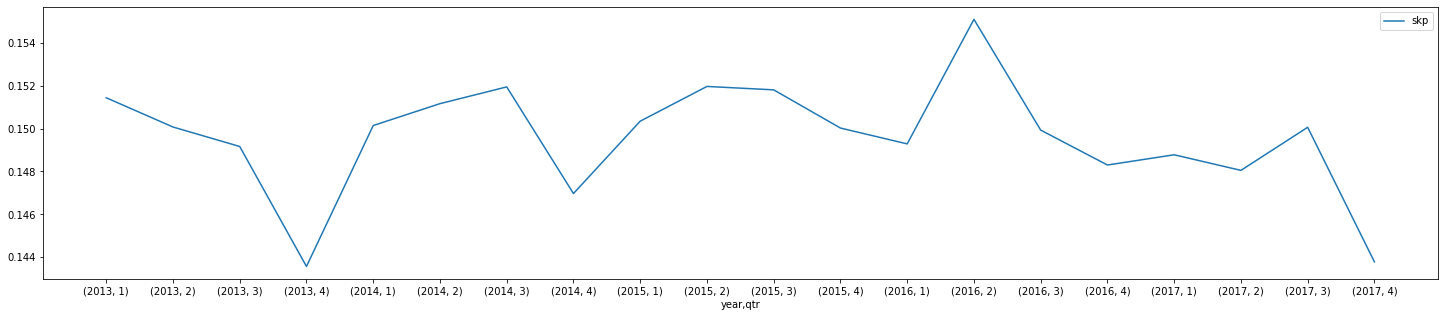

In [40]:
skp_overt_tb.plot.line(figsize=(25,5),xticks=range(0,20))

In [41]:
#for reporting table for size quantile
input2 = input_data.copy()

# vv = ['SP_gen_v2','SP_fin_8','profile_m1_fin','m_net_lm', 'a_net_lm','%uncertainty','net_lm', 'avg_henry', 'avg_h4d', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']] = input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

skp_overt2 = []
for y in [2013,2014,2015,2016,2017]:
  input3 = input2[input2.fyearq == y]
  input3 = input3[vv]
  print('****', y, "****")
  display(input3.describe())
  display(input3.corr())

  m = np.mean(input3.SP_fin_8)
  skp_overt2.append((y,m))

**** 2013 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  5534.000000  5534.000000  5534.000000  5534.000000  5534.000000   
mean      0.166454     0.029811     0.031438     0.148518     0.280699   
std       8.091252     9.800559     9.713666     0.056369     0.178005   
min     -25.197869   -30.908179   -32.165697     0.000043    -0.732143   
25%      -4.031285    -5.094054    -4.542092     0.112014     0.170833   
50%       0.147148    -0.022475    -0.200792     0.144029     0.289501   
75%       4.352250     5.079726     4.462720     0.179498     0.403432   
max      25.160783    32.419872    33.997549     0.997474     1.000000   

              surp           BM         size     leverage         roaq  \
count  5534.000000  5534.000000  5534.000000  5534.000000  5534.000000   
mean      0.001618     0.486301     3.104162     0.752786     0.089669   
std       0.045094     0.373836     0.785226     2.469017     0.189238   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004510     0.228951     2.560643     0.008615     0.068193   
50%       0.000735     0.398301     3.093937     0.326754     0.122262   
75%       0.005012     0.647408     3.605645     0.841743     0.173938   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      5534.000000  
mean          1.730983  
std           0.650140  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.814693  0.474772 -0.089106  0.213012  0.087687   
car_0_7          0.814693  1.000000  0.717531 -0.060080  0.165026  0.090109   
car_1_14         0.474772  0.717531  1.000000 -0.026415  0.053624  0.041290   
SP_fin_8        -0.089106 -0.060080 -0.026415  1.000000 -0.188616 -0.035444   
avg_lm           0.213012  0.165026  0.053624 -0.188616  1.000000  0.060263   
surp             0.087687  0.090109  0.041290 -0.035444  0.060263  1.000000   
BM               0.005690  0.045385  0.087496  0.006036 -0.106521 -0.024579   
size             0.018926 -0.000803 -0.030343  0.028659  0.063765 -0.029915   
leverage         0.018109  0.020409 -0.007914  0.013224  0.006482  0.034973   
roaq             0.074666  0.055272 -0.006353  0.026672  0.034617 -0.057734   
log_num_analyst  0.044100  0.026393  0.006123  0.023208  0.069911 -0.028818   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.005690  0.018926  0.018109  0.074666         0.044100  
car_0_7          0.045385 -0.000803  0.020409  0.055272         0.026393  
car_1_14         0.087496 -0.030343 -0.007914 -0.006353         0.006123  
SP_fin_8         0.006036  0.028659  0.013224  0.026672         0.023208  
avg_lm          -0.106521  0.063765  0.006482  0.034617         0.069911  
surp            -0.024579 -0.029915  0.034973 -0.057734        -0.028818  
BM               1.000000 -0.314937 -0.033086 -0.000294        -0.253253  
size            -0.314937  1.000000  0.076968  0.392179         0.674489  
leverage        -0.033086  0.076968  1.000000  0.070095         0.043916  
roaq            -0.000294  0.392179  0.070095  1.000000         0.236348  
log_num_analyst -0.253253  0.674489  0.043916  0.236348         1.000000

**** 2014 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  5885.000000  5885.000000  5885.000000  5885.000000  5885.000000   
mean     -0.041250    -0.084528    -0.078108     0.150018     0.294037   
std       8.061393     9.829733     9.826280     0.055459     0.182833   
min     -25.197869   -30.908179   -32.165697     0.000011    -0.586206   
25%      -4.173386    -5.139480    -4.516229     0.114051     0.183190   
50%       0.080641     0.107629     0.096898     0.145302     0.304167   
75%       4.397901     5.211036     4.448780     0.181075     0.420238   
max      25.160783    32.419872    33.997549     0.678680     1.000000   

              surp           BM         size     leverage         roaq  \
count  5885.000000  5885.000000  5885.000000  5885.000000  5885.000000   
mean      0.001484     0.447948     3.124833     0.774462     0.070050   
std       0.043013     0.353620     0.800929     2.435623     0.207407   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004785     0.208257     2.581995     0.007185     0.054436   
50%       0.000698     0.369996     3.108651     0.348414     0.116617   
75%       0.005177     0.587939     3.646568     0.903441     0.168014   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      5885.000000  
mean          1.699282  
std           0.656651  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.178054

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.801215  0.485635 -0.065923  0.182847  0.094400   
car_0_7          0.801215  1.000000  0.724791 -0.041170  0.144611  0.065052   
car_1_14         0.485635  0.724791  1.000000 -0.023611  0.081717  0.016101   
SP_fin_8        -0.065923 -0.041170 -0.023611  1.000000 -0.141026 -0.025776   
avg_lm           0.182847  0.144611  0.081717 -0.141026  1.000000  0.036579   
surp             0.094400  0.065052  0.016101 -0.025776  0.036579  1.000000   
BM               0.032826  0.048960  0.057011  0.038765 -0.114162 -0.040529   
size             0.031066  0.035921  0.020655  0.042021  0.063023 -0.036563   
leverage        -0.027514 -0.022910  0.000519  0.013160  0.003245 -0.017625   
roaq             0.088407  0.072816  0.040683  0.032595  0.046057 -0.037785   
log_num_analyst  0.015488  0.028861  0.025862  0.028315  0.058720 -0.012224   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.032826  0.031066 -0.027514  0.088407         0.015488  
car_0_7          0.048960  0.035921 -0.022910  0.072816         0.028861  
car_1_14         0.057011  0.020655  0.000519  0.040683         0.025862  
SP_fin_8         0.038765  0.042021  0.013160  0.032595         0.028315  
avg_lm          -0.114162  0.063023  0.003245  0.046057         0.058720  
surp            -0.040529 -0.036563 -0.017625 -0.037785        -0.012224  
BM               1.000000 -0.294825 -0.030404  0.022645        -0.238555  
size            -0.294825  1.000000  0.109239  0.414086         0.678041  
leverage        -0.030404  0.109239  1.000000  0.077503         0.074484  
roaq             0.022645  0.414086  0.077503  1.000000         0.253151  
log_num_analyst -0.238555  0.678041  0.074484  0.253151         1.000000

**** 2015 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  6200.000000  6200.000000  6200.000000  6200.000000  6200.000000   
mean      0.084390     0.282728     0.509454     0.151039     0.295195   
std       9.437402    11.398971    11.054784     0.053759     0.185502   
min     -25.197869   -30.908179   -32.165697     0.000002    -0.583333   
25%      -4.959670    -5.840373    -4.892014     0.117310     0.180581   
50%       0.235168     0.389872     0.466025     0.146910     0.309524   
75%       5.496037     6.493247     5.899132     0.180088     0.421159   
max      25.160783    32.419872    33.997549     0.485070     0.916666   

              surp           BM         size     leverage         roaq  \
count  6200.000000  6200.000000  6200.000000  6200.000000  6200.000000   
mean     -0.002421     0.480514     3.069650     0.799655     0.056144   
std       0.052348     0.418345     0.830545     2.829925     0.216337   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.006137     0.197571     2.500367     0.008096     0.038774   
50%       0.000353     0.370546     3.072779     0.383958     0.109352   
75%       0.004990     0.631648     3.610581     0.994480     0.164041   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      6200.000000  
mean          1.657519  
std           0.680312  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.044522

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.786946  0.459995 -0.066344  0.170513  0.069065   
car_0_7          0.786946  1.000000  0.709316 -0.057825  0.125917  0.038440   
car_1_14         0.459995  0.709316  1.000000 -0.035190  0.049842 -0.018453   
SP_fin_8        -0.066344 -0.057825 -0.035190  1.000000 -0.143787  0.031813   
avg_lm           0.170513  0.125917  0.049842 -0.143787  1.000000  0.075059   
surp             0.069065  0.038440 -0.018453  0.031813  0.075059  1.000000   
BM               0.015324  0.037235  0.080006  0.025836 -0.158920 -0.127546   
size             0.008560  0.024745  0.000229  0.025969  0.076456 -0.033577   
leverage         0.009050  0.011785  0.027086  0.028112 -0.014933  0.006318   
roaq             0.041478  0.032527  0.002457  0.058507  0.011148 -0.019636   
log_num_analyst  0.016547  0.040550  0.045762 -0.013983  0.057203 -0.077718   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.015324  0.008560  0.009050  0.041478         0.016547  
car_0_7          0.037235  0.024745  0.011785  0.032527         0.040550  
car_1_14         0.080006  0.000229  0.027086  0.002457         0.045762  
SP_fin_8         0.025836  0.025969  0.028112  0.058507        -0.013983  
avg_lm          -0.158920  0.076456 -0.014933  0.011148         0.057203  
surp            -0.127546 -0.033577  0.006318 -0.019636        -0.077718  
BM               1.000000 -0.343553 -0.008883 -0.002357        -0.223125  
size            -0.343553  1.000000  0.106152  0.401862         0.670812  
leverage        -0.008883  0.106152  1.000000  0.080544         0.081136  
roaq            -0.002357  0.401862  0.080544  1.000000         0.227283  
log_num_analyst -0.223125  0.670812  0.081136  0.227283         1.000000

**** 2016 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  6020.000000  6020.000000  6020.000000  6020.000000  6020.000000   
mean      0.194263     0.005644    -0.539089     0.150676     0.310525   
std       8.755824    10.980984    11.043829     0.054720     0.183328   
min     -25.197869   -30.908179   -32.165697     0.000094    -0.999999   
25%      -4.669811    -6.046270    -5.783689     0.116447     0.196212   
50%       0.157763     0.031556    -0.635335     0.145499     0.319704   
75%       5.165713     5.944850     4.802933     0.179115     0.432032   
max      25.160783    32.419872    33.997549     0.612697     1.000000   

              surp           BM         size     leverage         roaq  \
count  6020.000000  6020.000000  6020.000000  6020.000000  6020.000000   
mean      0.003691     0.483630     3.065521     0.769901     0.046790   
std       0.055724     0.417149     0.845947     3.079265     0.227159   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.006335     0.196336     2.489654     0.012910     0.031969   
50%       0.000702     0.376675     3.084718     0.428439     0.104015   
75%       0.005491     0.651055     3.613161     1.059904     0.160944   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      6020.000000  
mean          1.640429  
std           0.686043  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.777271  0.438937 -0.046566  0.166512  0.026909   
car_0_7          0.777271  1.000000  0.719427 -0.029201  0.120039  0.003235   
car_1_14         0.438937  0.719427  1.000000 -0.001066  0.062004 -0.019186   
SP_fin_8        -0.046566 -0.029201 -0.001066  1.000000 -0.126342  0.001838   
avg_lm           0.166512  0.120039  0.062004 -0.126342  1.000000  0.045877   
surp             0.026909  0.003235 -0.019186  0.001838  0.045877  1.000000   
BM               0.037409  0.045549  0.032720  0.032504 -0.128203 -0.045540   
size             0.007850 -0.020458 -0.033920  0.026592  0.052939 -0.073834   
leverage         0.019955  0.015259  0.010588 -0.004424 -0.009949 -0.025378   
roaq             0.028568 -0.011157 -0.007607  0.066877 -0.003834 -0.100377   
log_num_analyst  0.030456  0.005571 -0.007854 -0.026257  0.040071 -0.063731   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.037409  0.007850  0.019955  0.028568         0.030456  
car_0_7          0.045549 -0.020458  0.015259 -0.011157         0.005571  
car_1_14         0.032720 -0.033920  0.010588 -0.007607        -0.007854  
SP_fin_8         0.032504  0.026592 -0.004424  0.066877        -0.026257  
avg_lm          -0.128203  0.052939 -0.009949 -0.003834         0.040071  
surp            -0.045540 -0.073834 -0.025378 -0.100377        -0.063731  
BM               1.000000 -0.314667  0.024776  0.011080        -0.228616  
size            -0.314667  1.000000  0.074859  0.431927         0.686681  
leverage         0.024776  0.074859  1.000000  0.050797         0.059997  
roaq             0.011080  0.431927  0.050797  1.000000         0.218324  
log_num_analyst -0.228616  0.686681  0.059997  0.218324         1.000000

**** 2017 ****


car_-1_1      car_0_7     car_1_14     SP_fin_8       avg_lm  \
count  5032.000000  5032.000000  5032.000000  5032.000000  5032.000000   
mean     -0.037177    -0.139603    -0.269898     0.147611     0.324019   
std       9.000304    10.954116    10.629702     0.053493     0.182935   
min     -25.197869   -30.908179   -32.165697     0.000201    -0.799999   
25%      -4.893893    -6.283557    -5.536679     0.113671     0.209939   
50%      -0.142448    -0.345075    -0.572135     0.143315     0.335377   
75%       4.948027     5.761856     4.831322     0.176773     0.447221   
max      25.160783    32.419872    33.997549     0.597666     0.928571   

              surp           BM         size     leverage         roaq  \
count  5032.000000  5032.000000  5032.000000  5032.000000  5032.000000   
mean      0.007085     0.439767     3.150484     0.819967     0.049637   
std       0.056219     0.384232     0.846851     2.902897     0.235900   
min      -0.225532     0.000000     1.230615   -12.000363    -0.915130   
25%      -0.004884     0.173285     2.601726     0.030550     0.047574   
50%       0.001150     0.344084     3.173271     0.471858     0.107813   
75%       0.008371     0.600180     3.706795     1.069499     0.162051   
max       0.279152     2.164289     5.171595    16.821839     0.396328   

       log_num_analyst  
count      5032.000000  
mean          1.631283  
std           0.692874  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.091042

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.808425  0.498608 -0.053683  0.174893  0.106068   
car_0_7          0.808425  1.000000  0.716741 -0.042243  0.153454  0.096791   
car_1_14         0.498608  0.716741  1.000000 -0.030194  0.100656  0.043039   
SP_fin_8        -0.053683 -0.042243 -0.030194  1.000000 -0.154968 -0.047098   
avg_lm           0.174893  0.153454  0.100656 -0.154968  1.000000  0.038506   
surp             0.106068  0.096791  0.043039 -0.047098  0.038506  1.000000   
BM               0.034846  0.063434  0.072836  0.013051 -0.113451  0.037904   
size            -0.034030 -0.047730 -0.029544  0.012338  0.102368 -0.124280   
leverage         0.017292  0.016788  0.016362  0.015789 -0.025813 -0.000526   
roaq             0.019166  0.023071  0.044398  0.062705  0.037058 -0.132348   
log_num_analyst -0.003509 -0.000458  0.023784 -0.046640  0.089465 -0.082069   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.034846 -0.034030  0.017292  0.019166        -0.003509  
car_0_7          0.063434 -0.047730  0.016788  0.023071        -0.000458  
car_1_14         0.072836 -0.029544  0.016362  0.044398         0.023784  
SP_fin_8         0.013051  0.012338  0.015789  0.062705        -0.046640  
avg_lm          -0.113451  0.102368 -0.025813  0.037058         0.089465  
surp             0.037904 -0.124280 -0.000526 -0.132348        -0.082069  
BM               1.000000 -0.299068  0.009901  0.037337        -0.219184  
size            -0.299068  1.000000  0.110392  0.433628         0.700352  
leverage         0.009901  0.110392  1.000000  0.052868         0.093965  
roaq             0.037337  0.433628  0.052868  1.000000         0.226724  
log_num_analyst -0.219184  0.700352  0.093965  0.226724         1.000000

In [42]:
skp_overt2

[(2013, 0.14851809989270195),
 (2014, 0.15001797797513014),
 (2015, 0.15103869599419442),
 (2016, 0.15067596716449708),
 (2017, 0.14761085179654015)]

In [43]:
skp_overt_tb2 = pd.DataFrame(skp_overt2, columns=['year','skp'])
skp_overt_tb2 = skp_overt_tb2.set_index(['year'])

In [44]:
skp_overt_tb2.head()

skp
year          
2013  0.148518
2014  0.150018
2015  0.151039
2016  0.150676
2017  0.147611

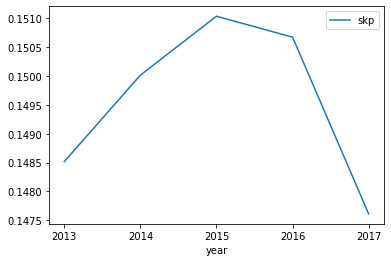

In [45]:
skp_overt_tb2.plot.line(xticks=[2013,2014,2015,2016,2017])

In [46]:
#for reporting table for size quantile
input2 = input_data.copy()

# vv = ['SP_gen_v2','SP_fin_8','profile_m1_fin','m_net_lm', 'a_net_lm','%uncertainty','net_lm', 'avg_henry', 'avg_h4d', 'log_total_wrd_count' ] +['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']

vv = ['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8', 'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst']
input2 = input2.dropna(subset=['car_-1_1',  'car_0_7','car_1_14'] + [ 'SP_fin_8',  'avg_lm'] + ['surp','BM', 'size', 'leverage', 'roaq'] + ['log_num_analyst'])
input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']] = input2[['surp','BM', 'size', 'leverage', 'roaq']+['car_-1_1',  'car_0_7','car_1_14']].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)

for y in [0,1]:
  input3 = input2[input2.tone_qtl == y]
  input3 = input3[vv]
  print('****', y, "****")
  display(input3.describe())
  display(input3.corr())

**** 0 ****


car_-1_1       car_0_7      car_1_14      SP_fin_8        avg_lm  \
count  14349.000000  14349.000000  14349.000000  14349.000000  14349.000000   
mean      -1.109786     -1.065013     -0.557794      0.157593      0.165152   
std        8.817056     10.745561     10.577008      0.057142      0.137150   
min      -25.197869    -30.908179    -32.165697      0.000043     -0.999999   
25%       -5.729741     -6.727737     -5.495969      0.121159      0.094605   
50%       -0.873422     -0.859507     -0.431414      0.152720      0.188484   
75%        3.732683      4.685635      4.565652      0.187937      0.258772   
max       25.160783     32.419872     33.997549      0.997474      0.672413   

               surp            BM          size      leverage          roaq  \
count  14349.000000  14349.000000  14349.000000  14349.000000  14349.000000   
mean      -0.000425      0.506606      3.065874      0.802726      0.058592   
std        0.053233      0.416351      0.807928      2.748699      0.217802   
min       -0.225532      0.000000      1.230615    -12.000363     -0.915130   
25%       -0.007414      0.223380      2.515762      0.022012      0.050164   
50%        0.000000      0.401854      3.075304      0.424334      0.110423   
75%        0.004785      0.675493      3.594268      1.033189      0.161205   
max        0.279152      2.164289      5.171595     16.821839      0.396328   

       log_num_analyst  
count     14349.000000  
mean          1.653272  
std           0.671047  
min           0.000000  
25%           1.098612  
50%           1.791759  
75%           2.197225  
max           3.178054

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.796162  0.453645 -0.054037  0.121815  0.075166   
car_0_7          0.796162  1.000000  0.702740 -0.037385  0.093150  0.049611   
car_1_14         0.453645  0.702740  1.000000 -0.010650  0.043883 -0.010041   
SP_fin_8        -0.054037 -0.037385 -0.010650  1.000000 -0.092260 -0.003410   
avg_lm           0.121815  0.093150  0.043883 -0.092260  1.000000  0.018783   
surp             0.075166  0.049611 -0.010041 -0.003410  0.018783  1.000000   
BM               0.045013  0.060912  0.074277  0.018248 -0.103921 -0.073391   
size             0.023483  0.020209  0.012911  0.025725  0.134685 -0.030769   
leverage         0.015910  0.014103  0.021382  0.014812  0.006648 -0.001806   
roaq             0.045162  0.032055  0.023923  0.049980  0.036441 -0.062900   
log_num_analyst  0.014046  0.017780  0.027536 -0.016957  0.183045 -0.031718   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.045013  0.023483  0.015910  0.045162         0.014046  
car_0_7          0.060912  0.020209  0.014103  0.032055         0.017780  
car_1_14         0.074277  0.012911  0.021382  0.023923         0.027536  
SP_fin_8         0.018248  0.025725  0.014812  0.049980        -0.016957  
avg_lm          -0.103921  0.134685  0.006648  0.036441         0.183045  
surp            -0.073391 -0.030769 -0.001806 -0.062900        -0.031718  
BM               1.000000 -0.317525 -0.002622  0.032946        -0.216684  
size            -0.317525  1.000000  0.100554  0.408264         0.669928  
leverage        -0.002622  0.100554  1.000000  0.069813         0.082412  
roaq             0.032946  0.408264  0.069813  1.000000         0.220093  
log_num_analyst -0.216684  0.669928  0.082412  0.220093         1.000000

**** 1 ****


car_-1_1       car_0_7      car_1_14      SP_fin_8        avg_lm  \
count  14322.000000  14322.000000  14322.000000  14322.000000  14322.000000   
mean       1.264372      1.119523      0.438017      0.141722      0.435977   
std        8.398632     10.385422     10.375736      0.051106      0.107774   
min      -25.197869    -30.908179    -32.165697      0.000002     -0.187500   
25%       -3.322487     -4.618609     -4.621210      0.109354      0.359062   
50%        1.000726      0.991392      0.106596      0.137949      0.423237   
75%        5.883942      6.644956      5.251079      0.170107      0.500000   
max       25.160783     32.419872     33.997549      0.612697      1.000000   

               surp            BM          size      leverage          roaq  \
count  14322.000000  14322.000000  14322.000000  14322.000000  14322.000000   
mean       0.004653      0.430220      3.136109      0.762746      0.066142   
std        0.048107      0.360941      0.835877      2.763210      0.214333   
min       -0.225532      0.000000      1.230615    -12.000363     -0.915130   
25%       -0.003257      0.182887      2.570812      0.003849      0.049007   
50%        0.001234      0.343182      3.134899      0.350027      0.113813   
75%        0.006297      0.571377      3.680415      0.914157      0.170389   
max        0.279152      2.164289      5.171595     16.821839      0.396328   

       log_num_analyst  
count     14322.000000  
mean          1.690920  
std           0.676866  
min           0.000000  
25%           1.386294  
50%           1.791759  
75%           2.197225  
max           3.218876

car_-1_1   car_0_7  car_1_14  SP_fin_8    avg_lm      surp  \
car_-1_1         1.000000  0.790408  0.482133 -0.034064  0.112393  0.058035   
car_0_7          0.790408  1.000000  0.731311 -0.024222  0.095976  0.047285   
car_1_14         0.482133  0.731311  1.000000 -0.021925  0.051361  0.021140   
SP_fin_8        -0.034064 -0.024222 -0.021925  1.000000 -0.024885 -0.009547   
avg_lm           0.112393  0.095976  0.051361 -0.024885  1.000000  0.037520   
surp             0.058035  0.047285  0.021140 -0.009547  0.037520  1.000000   
BM               0.032925  0.055179  0.065512  0.000042 -0.051806 -0.001020   
size            -0.023462 -0.032245 -0.045911  0.041511 -0.031889 -0.095374   
leverage         0.002833  0.005608  0.000955  0.008370 -0.018471 -0.002346   
roaq             0.046756  0.027414  0.003444  0.055735 -0.027852 -0.086494   
log_num_analyst  0.019570  0.017684  0.008842  0.012866 -0.105447 -0.087707   

                       BM      size  leverage      roaq  log_num_analyst  
car_-1_1         0.032925 -0.023462  0.002833  0.046756         0.019570  
car_0_7          0.055179 -0.032245  0.005608  0.027414         0.017684  
car_1_14         0.065512 -0.045911  0.000955  0.003444         0.008842  
SP_fin_8         0.000042  0.041511  0.008370  0.055735         0.012866  
avg_lm          -0.051806 -0.031889 -0.018471 -0.027852        -0.105447  
surp            -0.001020 -0.095374 -0.002346 -0.086494        -0.087707  
BM               1.000000 -0.311315 -0.008906 -0.004814        -0.244043  
size            -0.311315  1.000000  0.090344  0.420367         0.690305  
leverage        -0.008906  0.090344  1.000000  0.060015         0.059173  
roaq            -0.004814  0.420367  0.060015  1.000000         0.247899  
log_num_analyst -0.244043  0.690305  0.059173  0.247899         1.000000

## run for all data

In [ ]:
include_car = ['-1_1','0_7','1_14','1_30','2_60']

In [ ]:
r0, r1, r2, m1 = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_lm'])

repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
# r2_fl = r2_fl.round(2)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res1.xlsx')

['SP_fin_8', 'avg_lm']
SP_fin_8              0
avg_lm                0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8    avg_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.18      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.19     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.42      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.1832      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.1874     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.3115      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.4249      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.1832      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.1874     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.3115     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.4249      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0749
Estimator:                   PanelOLS   R-squared (Between):             -7.4115
No. Observations:               28671   R-squared (Within):               0.0741
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6854
Time:                        20:40:01   Log-likelihood                -1.003e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      268.96
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             154.64
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.4699     1.2813    -5.8299     0.0000     -9.9814     -4.9585
avg_lm              10.132     0.3432     29.524     0.0000      9.4594      10.805
surp                0.6263     0.0857     7.3061     0.0000      0.4583      0.7943
BM                  0.5995     0.1416     4.2327     0.0000      0.3219      0.8771
size               -7.9092     0.6475    -12.214     0.0000     -9.1784     -6.6400
leverage            0.0861     0.0508     1.6970     0.0897     -0.0134      0.1856
roaq                0.5521     0.2346     2.3537     0.0186      0.0923      1.0118
log_num_analyst     0.6200     0.0987     6.2851     0.0000      0.4267      0.8134
const              -1.8499     0.1983    -9.3304     0.0000     -2.2385     -1.4613
===================================================================================

F-test for Poolability: 1.6048
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693d2b750

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0781
Estimator:                   PanelOLS   R-squared (Between):             -9.9743
No. Observations:               28671   R-squared (Within):               0.0769
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9584
Time:                        20:40:02   Log-likelihood                -1.061e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      281.36
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             195.53
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.0374     1.2002    -5.8636     0.0000     -9.3898     -4.6850
avg_lm              10.573     0.4120     25.660     0.0000      9.7652      11.380
surp                0.5625     0.1560     3.6044     0.0003      0.2566      0.8683
BM                  1.3877     0.2251     6.1650     0.0000      0.9465      1.8289
size               -11.222     1.0105    -11.106     0.0000     -13.203     -9.2416
leverage            0.0938     0.0801     1.1714     0.2414     -0.0631      0.2507
roaq                1.0317     0.4316     2.3907     0.0168      0.1858      1.8776
log_num_analyst     0.8963     0.1579     5.6774     0.0000      0.5868      1.2057
const              -2.0970     0.2253    -9.3088     0.0000     -2.5385     -1.6554
===================================================================================

F-test for Poolability: 1.7869
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693c45990

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0593
Estimator:                   PanelOLS   R-squared (Between):             -8.1179
No. Observations:               28671   R-squared (Within):               0.0584
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9753
Time:                        20:40:03   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      209.45
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             102.14
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.3071     1.1737    -3.6697     0.0002     -6.6075     -2.0066
avg_lm              5.6258     0.4912     11.453     0.0000      4.6630      6.5885
surp                0.0651     0.1538     0.4233     0.6721     -0.2364      0.3666
BM                  1.5536     0.2664     5.8312     0.0000      1.0314      2.0758
size               -11.060     1.0812    -10.230     0.0000     -13.179     -8.9409
leverage            0.1332     0.0781     1.7049     0.0882     -0.0199      0.2863
roaq                1.2471     0.5017     2.4856     0.0129      0.2637      2.2305
log_num_analyst     0.6837     0.1391     4.9164     0.0000      0.4111      0.9563
const              -1.1059     0.2546    -4.3437     0.0000     -1.6050     -0.6069
===================================================================================

F-test for Poolability: 1.8472
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693c33450

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0749        0.0781        0.0593        0.0991        0.1284
R-Squared (Within)             0.0741        0.0769        0.0584        0.0957        0.1198
R-Squared (Between)           -7.4115       -9.9743       -8.1179       -16.118       -23.722
R-Squared (Overall)           -0.6854       -0.9584       -0.9753       -1.6068       -2.2098
F-statistic                    268.96        281.36        209.45        365.25        489.47
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.4699       -7.0374       -4.3071       -3.1672        3.4214
                            (-5.8299)     (-5.8636)     (-3.6697)     (-1.6989)      (1.4540)
avg_lm                         10.132        10.573        5.6258        4.7434       -2.7585
                             (29.524)      (25.660)      (11.453)      (7.6514)     (-2.8514)
surp                           0.6263        0.5625        0.0651        0.0037       -0.4068
                             (7.3061)      (3.6044)      (0.4233)      (0.0154)     (-1.6963)
BM                             0.5995        1.3877        1.5536        3.5248        5.2582
                             (4.2327)      (6.1650)      (5.8312)      (9.7456)      (8.6986)
size                          -7.9092       -11.222       -11.060       -19.341       -30.542
                            (-12.214)     (-11.106)     (-10.230)     (-11.379)     (-12.672)
leverage                       0.0861        0.0938        0.1332        0.2033        0.1320
                             (1.6970)      (1.1714)      (1.7049)      (1.9786)      (0.5778)
roaq                           0.5521        1.0317        1.2471        1.8356        2.0331
                             (2.3537)      (2.3907)      (2.4856)      (2.4598)      (2.4012)
log_num_analyst                0.6200        0.8963        0.6837        1.1968        1.3501
                             (6.2851)      (5.6774)      (4.9164)      (6.3101)      (4.5707)
const                         -1.8499       -2.0970       -1.1059       -1.0425       -0.0734
                            (-9.3304)     (-9.3088)     (-4.3437)     (-2.8611)     (-0.1631)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4693ccae10

**************************************************************


In [ ]:
r0, r1, r2, m1 = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_gen_8','avg_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res1-1.xlsx')

['SP_gen_8', 'avg_lm']
SP_gen_8              0
avg_lm                0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_gen_8    avg_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.37      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.09      0.18      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.31      0.19     -0.01      0.20      2.54      0.01      0.05   
50%        0.37      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.42      0.42      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_gen_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.3659      0.3004      0.0021      0.4684      3.1010      0.7828   
std        0.0887      0.1832      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.3105      0.1874     -0.0053      0.2004      2.5439      0.0107   
50%        0.3659      0.3115      0.0007      0.3719      3.1032      0.3870   
75%        0.4208      0.4249      0.0056      0.6245      3.6339      0.9684   
max        1.0000      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_gen_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.3659      0.3004     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0887      0.1832      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.3105      0.1874     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.3659      0.3115     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.4208      0.4249      0.0678      0.3986      0.6478      0.0674   
max        1.0000      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0744
Estimator:                   PanelOLS   R-squared (Between):             -7.4580
No. Observations:               28671   R-squared (Within):               0.0736
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6910
Time:                        20:40:24   Log-likelihood                -1.003e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      267.14
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             160.95
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_gen_8           -4.1054     0.7126    -5.7614     0.0000     -5.5021     -2.7087
avg_lm              10.304     0.3538     29.122     0.0000      9.6104      10.997
surp                0.6247     0.0861     7.2547     0.0000      0.4559      0.7934
BM                  0.5931     0.1410     4.2050     0.0000      0.3166      0.8695
size               -7.9085     0.6496    -12.174     0.0000     -9.1817     -6.6352
leverage            0.0872     0.0504     1.7313     0.0834     -0.0115      0.1860
roaq                0.5594     0.2349     2.3813     0.0173      0.0990      1.0199
log_num_analyst     0.6169     0.0987     6.2473     0.0000      0.4234      0.8105
const              -1.5175     0.2737    -5.5434     0.0000     -2.0541     -0.9809
===================================================================================

F-test for Poolability: 1.6063
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693c10490

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0779
Estimator:                   PanelOLS   R-squared (Between):             -10.027
No. Observations:               28671   R-squared (Within):               0.0767
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9642
Time:                        20:40:24   Log-likelihood                -1.061e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      280.68
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             192.21
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_gen_8           -4.0900     0.8253    -4.9558     0.0000     -5.7077     -2.4724
avg_lm              10.729     0.4160     25.792     0.0000      9.9135      11.544
surp                0.5609     0.1566     3.5812     0.0003      0.2539      0.8678
BM                  1.3813     0.2249     6.1409     0.0000      0.9404      1.8222
size               -11.221     1.0102    -11.108     0.0000     -13.201     -9.2411
leverage            0.0949     0.0799     1.1881     0.2348     -0.0616      0.2514
roaq                1.0390     0.4320     2.4052     0.0162      0.1923      1.8858
log_num_analyst     0.8930     0.1575     5.6700     0.0000      0.5843      1.2017
const              -1.7007     0.3522    -4.8286     0.0000     -2.3911     -1.0104
===================================================================================

F-test for Poolability: 1.7907
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691ae6490

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0591
Estimator:                   PanelOLS   R-squared (Between):             -8.1400
No. Observations:               28671   R-squared (Within):               0.0582
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9783
Time:                        20:40:25   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      208.82
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             108.02
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_gen_8           -2.1417     0.8897    -2.4071     0.0161     -3.8856     -0.3978
avg_lm              5.7307     0.4957     11.562     0.0000      4.7592      6.7023
surp                0.0642     0.1540     0.4170     0.6767     -0.2376      0.3661
BM                  1.5503     0.2668     5.8109     0.0000      1.0274      2.0732
size               -11.060     1.0811    -10.230     0.0000     -13.179     -8.9407
leverage            0.1337     0.0781     1.7117     0.0870     -0.0194      0.2869
roaq                1.2510     0.5030     2.4872     0.0129      0.2651      2.2368
log_num_analyst     0.6822     0.1389     4.9124     0.0000      0.4100      0.9544
const              -0.9985     0.4209    -2.3724     0.0177     -1.8235     -0.1735
===================================================================================

F-test for Poolability: 1.8468
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b18a90

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0744        0.0779        0.0591        0.0990        0.1285
R-Squared (Within)             0.0736        0.0767        0.0582        0.0956        0.1200
R-Squared (Between)           -7.4580       -10.027       -8.1400       -16.129       -23.686
R-Squared (Overall)           -0.6910       -0.9642       -0.9783       -1.6080       -2.2058
F-statistic                    267.14        280.68        208.82        364.90        489.87
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_gen_8                      -4.1054       -4.0900       -2.1417       -1.1284        3.1993
                            (-5.7614)     (-4.9558)     (-2.4071)     (-1.0656)      (2.5931)
avg_lm                         10.304        10.729        5.7307        4.8322       -2.8028
                             (29.122)      (25.792)      (11.562)      (7.7772)     (-2.8853)
surp                           0.6247        0.5609        0.0642        0.0031       -0.4057
                             (7.2547)      (3.5812)      (0.4170)      (0.0130)     (-1.6930)
BM                             0.5931        1.3813        1.5503        3.5232        5.2635
                             (4.2050)      (6.1409)      (5.8109)      (9.7508)      (8.7082)
size                          -7.9085       -11.221       -11.060       -19.341       -30.543
                            (-12.174)     (-11.108)     (-10.230)     (-11.382)     (-12.666)
leverage                       0.0872        0.0949        0.1337        0.2035        0.1311
                             (1.7313)      (1.1881)      (1.7117)      (1.9803)      (0.5734)
roaq                           0.5594        1.0390        1.2510        1.8377        2.0274
                             (2.3813)      (2.4052)      (2.4872)      (2.4613)      (2.3959)
log_num_analyst                0.6169        0.8930        0.6822        1.1963        1.3534
                             (6.2473)      (5.6700)      (4.9124)      (6.3239)      (4.5646)
const                         -1.5175       -1.7007       -0.9985       -1.1304       -0.7185
                            (-5.5434)     (-4.8286)     (-2.3724)     (-2.2480)     (-1.2782)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4691a92ed0

**************************************************************


In [ ]:
r0, r1, r2, m1 = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_1','avg_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
# r2_fl = r2_fl.round(2)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res1_2.xlsx')

['SP_fin_1', 'avg_lm']
SP_fin_1              0
avg_lm                0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_1    avg_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.34      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.12      0.18      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.26      0.19     -0.01      0.20      2.54      0.01      0.05   
50%        0.33      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.40      0.42      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_1      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.3362      0.3004      0.0021      0.4684      3.1010      0.7828   
std        0.1174      0.1832      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.2598      0.1874     -0.0053      0.2004      2.5439      0.0107   
50%        0.3295      0.3115      0.0007      0.3719      3.1032      0.3870   
75%        0.4050      0.4249      0.0056      0.6245      3.6339      0.9684   
max        1.0000      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_1      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.3362      0.3004     -0.0000     -0.0000      0.0000     -0.0000   
std        0.1174      0.1832      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.2598      0.1874     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.3295      0.3115     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.4050      0.4249      0.0678      0.3986      0.6478      0.0674   
max        1.0000      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0746
Estimator:                   PanelOLS   R-squared (Between):             -7.5280
No. Observations:               28671   R-squared (Within):               0.0738
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6977
Time:                        20:40:47   Log-likelihood                -1.003e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      267.91
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             154.25
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_1           -3.3635     0.6079    -5.5327     0.0000     -4.5551     -2.1719
avg_lm              10.233     0.3454     29.628     0.0000      9.5564      10.910
surp                0.6232     0.0858     7.2616     0.0000      0.4550      0.7915
BM                  0.6066     0.1407     4.3129     0.0000      0.3309      0.8823
size               -7.8956     0.6512    -12.125     0.0000     -9.1719     -6.6192
leverage            0.0883     0.0505     1.7479     0.0805     -0.0107      0.1873
roaq                0.5576     0.2344     2.3791     0.0174      0.0982      1.0170
log_num_analyst     0.6197     0.0995     6.2309     0.0000      0.4248      0.8147
const              -1.8674     0.2032    -9.1908     0.0000     -2.2656     -1.4692
===================================================================================

F-test for Poolability: 1.6041
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b41950

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0778
Estimator:                   PanelOLS   R-squared (Between):             -10.069
No. Observations:               28671   R-squared (Within):               0.0766
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9685
Time:                        20:40:48   Log-likelihood                -1.061e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      280.15
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             187.36
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_1           -2.9112     0.6966    -4.1794     0.0000     -4.2765     -1.5459
avg_lm              10.682     0.4124     25.903     0.0000      9.8736      11.490
surp                0.5598     0.1561     3.5870     0.0003      0.2539      0.8656
BM                  1.3940     0.2240     6.2241     0.0000      0.9550      1.8329
size               -11.211     1.0137    -11.059     0.0000     -13.197     -9.2237
leverage            0.0956     0.0795     1.2023     0.2292     -0.0603      0.2515
roaq                1.0365     0.4318     2.4006     0.0164      0.1902      1.8828
log_num_analyst     0.8962     0.1586     5.6509     0.0000      0.5853      1.2070
const              -2.2042     0.2744    -8.0331     0.0000     -2.7420     -1.6664
===================================================================================

F-test for Poolability: 1.7844
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693d21350

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0591
Estimator:                   PanelOLS   R-squared (Between):             -8.1612
No. Observations:               28671   R-squared (Within):               0.0582
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9810
Time:                        20:40:49   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      208.76
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             103.13
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_1           -1.5921     0.6843    -2.3268     0.0200     -2.9333     -0.2509
avg_lm              5.7025     0.4839     11.786     0.0000      4.7542      6.6509
surp                0.0636     0.1537     0.4136     0.6791     -0.2378      0.3650
BM                  1.5570     0.2651     5.8732     0.0000      1.0374      2.0767
size               -11.054     1.0821    -10.216     0.0000     -13.175     -8.9330
leverage            0.1342     0.0781     1.7189     0.0856     -0.0188      0.2872
roaq                1.2497     0.5024     2.4878     0.0129      0.2651      2.2344
log_num_analyst     0.6838     0.1397     4.8935     0.0000      0.4099      0.9577
const              -1.2383     0.2797    -4.4264     0.0000     -1.7866     -0.6900
===================================================================================

F-test for Poolability: 1.8461
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691afded0

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0746        0.0778        0.0591        0.0990        0.1285
R-Squared (Within)             0.0738        0.0766        0.0582        0.0956        0.1200
R-Squared (Between)           -7.5280       -10.069       -8.1612       -16.148       -23.632
R-Squared (Overall)           -0.6977       -0.9685       -0.9810       -1.6099       -2.2007
F-statistic                    267.91        280.15        208.76        364.94        490.04
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_1                      -3.3635       -2.9112       -1.5921       -0.9512        2.7377
                            (-5.5327)     (-4.1794)     (-2.3268)     (-0.9199)      (2.2149)
avg_lm                         10.233        10.682        5.7025        4.8114       -2.7417
                             (29.628)      (25.903)      (11.786)      (7.8500)     (-2.8378)
surp                           0.6232        0.5598        0.0636        0.0027       -0.4045
                             (7.2616)      (3.5870)      (0.4136)      (0.0113)     (-1.6839)
BM                             0.6066        1.3940        1.5570        3.5269        5.2527
                             (4.3129)      (6.2241)      (5.8732)      (9.7589)      (8.6942)
size                          -7.8956       -11.211       -11.054       -19.337       -30.554
                            (-12.125)     (-11.059)     (-10.216)     (-11.377)     (-12.676)
leverage                       0.0883        0.0956        0.1342        0.2038        0.1302
                             (1.7479)      (1.2023)      (1.7189)      (1.9874)      (0.5692)
roaq                           0.5576        1.0365        1.2497        1.8372        2.0287
                             (2.3791)      (2.4006)      (2.4878)      (2.4603)      (2.3962)
log_num_analyst                0.6197        0.8962        0.6838        1.1970        1.3513
                             (6.2309)      (5.6509)      (4.8935)      (6.3054)      (4.5756)
const                         -1.8674       -2.2042       -1.2383       -1.2172       -0.4869
                            (-9.1908)     (-8.0331)     (-4.4264)     (-2.9551)     (-1.0031)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4691a88b90

**************************************************************


In [ ]:
r0, r1, r2, m2 = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','net_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res2.xlsx')

['SP_fin_8', 'net_lm']
SP_fin_8              0
net_lm                0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8    net_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.40      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.24      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.26     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.57      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8      net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4037      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.2388      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.2581     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.4255      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.5714      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8      net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4037     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.2388      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.2581     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.4255     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.5714      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0699
Estimator:                   PanelOLS   R-squared (Between):             -7.5479
No. Observations:               28671   R-squared (Within):               0.0691
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.7033
Time:                        20:41:02   Log-likelihood                -1.004e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      249.58
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             153.88
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.1081     1.3016    -5.4611     0.0000     -9.6593     -4.5569
net_lm              7.2237     0.2691     26.845     0.0000      6.6963      7.7511
surp                0.6299     0.0865     7.2806     0.0000      0.4603      0.7995
BM                  0.5832     0.1448     4.0270     0.0001      0.2993      0.8670
size               -7.9363     0.6512    -12.188     0.0000     -9.2126     -6.6599
leverage            0.0886     0.0515     1.7204     0.0854     -0.0123      0.1896
roaq                0.5522     0.2377     2.3231     0.0202      0.0863      1.0180
log_num_analyst     0.5840     0.0935     6.2487     0.0000      0.4008      0.7671
const              -1.7760     0.2146    -8.2763     0.0000     -2.1966     -1.3554
===================================================================================

F-test for Poolability: 1.6021
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46966945d0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0747
Estimator:                   PanelOLS   R-squared (Between):             -10.116
No. Observations:               28671   R-squared (Within):               0.0736
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9750
Time:                        20:41:02   Log-likelihood                -1.062e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      268.23
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             180.87
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -6.6335     1.1699    -5.6703     0.0000     -8.9266     -4.3405
net_lm              7.5855     0.3224     23.526     0.0000      6.9535      8.2175
surp                0.5657     0.1562     3.6212     0.0003      0.2595      0.8719
BM                  1.3715     0.2260     6.0675     0.0000      0.9285      1.8146
size               -11.252     1.0134    -11.103     0.0000     -13.238     -9.2655
leverage            0.0963     0.0804     1.1990     0.2305     -0.0612      0.2539
roaq                1.0319     0.4316     2.3910     0.0168      0.1860      1.8779
log_num_analyst     0.8590     0.1537     5.5894     0.0000      0.5578      1.1603
const              -2.0431     0.2229    -9.1663     0.0000     -2.4799     -1.6062
===================================================================================

F-test for Poolability: 1.7863
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691aaf6d0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0581
Estimator:                   PanelOLS   R-squared (Between):             -8.1827
No. Observations:               28671   R-squared (Within):               0.0572
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9837
Time:                        20:41:03   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      204.90
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             62.406
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.1336     1.1728    -3.5246     0.0004     -6.4324     -1.8349
net_lm              3.9614     0.3913     10.124     0.0000      3.1945      4.7283
surp                0.0677     0.1531     0.4419     0.6586     -0.2325      0.3678
BM                  1.5437     0.2674     5.7723     0.0000      1.0195      2.0678
size               -11.074     1.0837    -10.218     0.0000     -13.198     -8.9495
leverage            0.1346     0.0785     1.7149     0.0864     -0.0192      0.2884
roaq                1.2470     0.5018     2.4853     0.0130      0.2635      2.2305
log_num_analyst     0.6633     0.1377     4.8184     0.0000      0.3935      0.9331
const              -1.0408     0.2643    -3.9379     0.0001     -1.5589     -0.5228
===================================================================================

F-test for Poolability: 1.8481
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b4ff10

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0699        0.0747        0.0581        0.0985        0.1284
R-Squared (Within)             0.0691        0.0736        0.0572        0.0951        0.1198
R-Squared (Between)           -7.5479       -10.116       -8.1827       -16.176       -23.690
R-Squared (Overall)           -0.7033       -0.9750       -0.9837       -1.6130       -2.2069
F-statistic                    249.58        268.23        204.90        363.11        489.34
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.1081       -6.6335       -4.1336       -3.0489        3.2664
                            (-5.4611)     (-5.6703)     (-3.5246)     (-1.6172)      (1.3788)
net_lm                         7.2237        7.5855        3.9614        3.2896       -2.0688
                             (26.845)      (23.526)      (10.124)      (6.1574)     (-2.5797)
surp                           0.6299        0.5657        0.0677        0.0064       -0.4066
                             (7.2806)      (3.6212)      (0.4419)      (0.0269)     (-1.6986)
BM                             0.5832        1.3715        1.5437        3.5156        5.2609
                             (4.0270)      (6.0675)      (5.7723)      (9.7162)      (8.6991)
size                          -7.9363       -11.252       -11.074       -19.351       -30.532
                            (-12.188)     (-11.103)     (-10.218)     (-11.371)     (-12.654)
leverage                       0.0886        0.0963        0.1346        0.2045        0.1314
                             (1.7204)      (1.1990)      (1.7149)      (1.9939)      (0.5752)
roaq                           0.5522        1.0319        1.2470        1.8354        2.0328
                             (2.3231)      (2.3910)      (2.4853)      (2.4579)      (2.4023)
log_num_analyst                0.5840        0.8590        0.6633        1.1791        1.3590
                             (6.2487)      (5.5894)      (4.8184)      (6.2114)      (4.6155)
const                         -1.7760       -2.0431       -1.0408       -0.9631       -0.0438
                            (-8.2763)     (-9.1663)     (-3.9379)     (-2.4443)     (-0.0894)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4693cca090

**************************************************************


In [ ]:
r0, r1, r2, m = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','m_net_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res3.xlsx')

['SP_fin_8', 'm_net_lm']
SP_fin_8              0
m_net_lm              0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8  m_net_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.26      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.27     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.61      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8    m_net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4263      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.2609      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.2727     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.4545      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.6071      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8    m_net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4263     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.2609      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.2727     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.4545     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.6071      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0551
Estimator:                   PanelOLS   R-squared (Between):             -7.4573
No. Observations:               28671   R-squared (Within):               0.0542
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.7073
Time:                        20:41:19   Log-likelihood                -1.006e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      193.71
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             112.80
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.3708     1.3590    -6.8956     0.0000     -12.034     -6.7072
m_net_lm            4.6056     0.2352     19.584     0.0000      4.1447      5.0666
surp                0.6632     0.0877     7.5624     0.0000      0.4913      0.8351
BM                  0.5119     0.1462     3.5014     0.0005      0.2253      0.7984
size               -7.8757     0.6531    -12.059     0.0000     -9.1558     -6.5955
leverage            0.0864     0.0515     1.6765     0.0937     -0.0146      0.1874
roaq                0.5362     0.2364     2.2684     0.0233      0.0729      0.9995
log_num_analyst     0.5143     0.0978     5.2609     0.0000      0.3227      0.7059
const              -0.4848     0.2068    -2.3441     0.0191     -0.8901     -0.0794
===================================================================================

F-test for Poolability: 1.5654
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693c612d0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0637
Estimator:                   PanelOLS   R-squared (Between):             -10.014
No. Observations:               28671   R-squared (Within):               0.0625
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9744
Time:                        20:41:19   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      225.87
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             148.57
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.0275     1.1891    -7.5916     0.0000     -11.358     -6.6967
m_net_lm            4.7886     0.3010     15.908     0.0000      4.1986      5.3786
surp                0.6012     0.1581     3.8032     0.0001      0.2913      0.9110
BM                  1.2961     0.2292     5.6545     0.0000      0.8468      1.7454
size               -11.187     1.0111    -11.064     0.0000     -13.168     -9.2049
leverage            0.0941     0.0786     1.1976     0.2311     -0.0599      0.2481
roaq                1.0151     0.4342     2.3378     0.0194      0.1640      1.8662
log_num_analyst     0.7859     0.1544     5.0907     0.0000      0.4833      1.0885
const              -0.6641     0.2201    -3.0175     0.0026     -1.0955     -0.2327
===================================================================================

F-test for Poolability: 1.7378
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b41490

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0552
Estimator:                   PanelOLS   R-squared (Between):             -8.1429
No. Observations:               28671   R-squared (Within):               0.0543
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9811
Time:                        20:41:20   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      194.15
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             59.490
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -5.3457     1.1567    -4.6214     0.0000     -7.6130     -3.0785
m_net_lm            2.6018     0.3776     6.8898     0.0000      1.8616      3.3419
surp                0.0852     0.1547     0.5507     0.5819     -0.2180      0.3884
BM                  1.5055     0.2674     5.6308     0.0000      0.9814      2.0295
size               -11.043     1.0833    -10.194     0.0000     -13.166     -8.9196
leverage            0.1332     0.0775     1.7200     0.0854     -0.0186      0.2851
roaq                1.2383     0.5022     2.4660     0.0137      0.2541      2.2225
log_num_analyst     0.6250     0.1385     4.5131     0.0000      0.3535      0.8964
const              -0.3694     0.2641    -1.3988     0.1619     -0.8871      0.1482
===================================================================================

F-test for Poolability: 1.8310
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691af3e10

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0551        0.0637        0.0552        0.0974        0.1281
R-Squared (Within)             0.0542        0.0625        0.0543        0.0940        0.1196
R-Squared (Between)           -7.4573       -10.014       -8.1429       -16.139       -23.714
R-Squared (Overall)           -0.7073       -0.9744       -0.9811       -1.6102       -2.2092
F-statistic                    193.71        225.87        194.15        358.67        487.96
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -9.3708       -9.0275       -5.3457       -4.0686        4.0183
                            (-6.8956)     (-7.5916)     (-4.6214)     (-2.1695)      (1.6831)
m_net_lm                       4.6056        4.7886        2.6018        2.1259       -1.0436
                             (19.584)      (15.908)      (6.8898)      (4.3340)     (-1.5845)
surp                           0.6632        0.6012        0.0852        0.0213       -0.4189
                             (7.5624)      (3.8032)      (0.5507)      (0.0890)     (-1.7397)
BM                             0.5119        1.2961        1.5055        3.4835        5.2845
                             (3.5014)      (5.6545)      (5.6308)      (9.6364)      (8.6906)
size                          -7.8757       -11.187       -11.043       -19.324       -30.558
                            (-12.059)     (-11.064)     (-10.194)     (-11.363)     (-12.638)
leverage                       0.0864        0.0941        0.1332        0.2034        0.1316
                             (1.6765)      (1.1976)      (1.7200)      (1.9891)      (0.5758)
roaq                           0.5362        1.0151        1.2383        1.8281        2.0375
                             (2.2684)      (2.3378)      (2.4660)      (2.4463)      (2.4027)
log_num_analyst                0.5143        0.7859        0.6250        1.1473        1.3787
                             (5.2609)      (5.0907)      (4.5131)      (6.1033)      (4.7188)
const                         -0.4848       -0.6641       -0.3694       -0.3888       -0.5466
                            (-2.3441)     (-3.0175)     (-1.3988)     (-0.9946)     (-1.1811)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4691b83890

**************************************************************


In [ ]:
#the manager tone is based on QA and presentation
r0, r1, r2, m = run_reg(input_data, 30, include_car, \
                        features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','a_net_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res4.xlsx')

['SP_fin_8', 'a_net_lm']
SP_fin_8              0
a_net_lm              0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8  a_net_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.19      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.05     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.29      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8    a_net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.1746      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.1920      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.0526     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.1667      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.2930      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8    a_net_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.1746     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.1920      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.0526     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.1667     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.2930      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0731
Estimator:                   PanelOLS   R-squared (Between):             -7.2445
No. Observations:               28671   R-squared (Within):               0.0721
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6710
Time:                        20:55:47   Log-likelihood                -1.004e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      261.96
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             133.09
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -8.1064     1.2750    -6.3578     0.0000     -10.605     -5.6072
a_net_lm            8.8034     0.3258     27.025     0.0000      8.1649      9.4419
surp                0.6530     0.0840     7.7756     0.0000      0.4884      0.8175
BM                  0.6012     0.1411     4.2622     0.0000      0.3247      0.8777
size               -7.7650     0.6278    -12.369     0.0000     -8.9954     -6.5345
leverage            0.0956     0.0485     1.9728     0.0485      0.0006      0.1906
roaq                0.5610     0.2401     2.3366     0.0195      0.0904      1.0317
log_num_analyst     0.7044     0.0977     7.2088     0.0000      0.5128      0.8959
const              -0.2474     0.1882    -1.3143     0.1888     -0.6163      0.1215
===================================================================================

F-test for Poolability: 1.5369
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4695e49550

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0769
Estimator:                   PanelOLS   R-squared (Between):             -9.8006
No. Observations:               28671   R-squared (Within):               0.0756
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9436
Time:                        20:55:48   Log-likelihood                -1.062e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      276.80
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             145.57
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.6921     1.2124    -6.3446     0.0000     -10.068     -5.3157
a_net_lm            9.2140     0.3694     24.940     0.0000      8.4899      9.9382
surp                0.5901     0.1558     3.7883     0.0002      0.2848      0.8954
BM                  1.3900     0.2268     6.1286     0.0000      0.9454      1.8345
size               -11.072     0.9894    -11.190     0.0000     -13.011     -9.1324
leverage            0.1037     0.0771     1.3445     0.1788     -0.0475      0.2548
roaq                1.0412     0.4413     2.3591     0.0183      0.1761      1.9062
log_num_analyst     0.9848     0.1598     6.1645     0.0000      0.6717      1.2980
const              -0.4310     0.1903    -2.2645     0.0236     -0.8041     -0.0579
===================================================================================

F-test for Poolability: 1.7261
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b16790

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0587
Estimator:                   PanelOLS   R-squared (Between):             -8.0527
No. Observations:               28671   R-squared (Within):               0.0577
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9685
Time:                        20:55:49   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      207.28
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             79.625
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.6847     1.1537    -4.0606     0.0000     -6.9460     -2.4234
a_net_lm            4.8169     0.3495     13.782     0.0000      4.1319      5.5020
surp                0.0804     0.1556     0.5165     0.6055     -0.2246      0.3854
BM                  1.5534     0.2653     5.8558     0.0000      1.0334      2.0733
size               -10.980     1.0697    -10.264     0.0000     -13.076     -8.8831
leverage            0.1384     0.0772     1.7935     0.0729     -0.0129      0.2897
roaq                1.2519     0.5051     2.4783     0.0132      0.2618      2.2419
log_num_analyst     0.7291     0.1374     5.3067     0.0000      0.4598      0.9983
const              -0.2001     0.1797    -1.1136     0.2655     -0.5523      0.1521
===================================================================================

F-test for Poolability: 1.8286
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b168d0

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0731        0.0769        0.0587        0.0990        0.1285
R-Squared (Within)             0.0721        0.0756        0.0577        0.0955        0.1199
R-Squared (Between)           -7.2445       -9.8006       -8.0527       -16.069       -23.743
R-Squared (Overall)           -0.6710       -0.9436       -0.9685       -1.6024       -2.2117
F-statistic                    261.96        276.80        207.28        364.91        489.95
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -8.1064       -7.6921       -4.6847       -3.4487        3.4801
                            (-6.3578)     (-6.3446)     (-4.0606)     (-1.9108)      (1.4960)
a_net_lm                       8.8034        9.2140        4.8169        4.1698       -2.7328
                             (27.025)      (24.940)      (13.782)      (8.6335)     (-3.4880)
surp                           0.6530        0.5901        0.0804        0.0158       -0.4119
                             (7.7756)      (3.7883)      (0.5165)      (0.0661)     (-1.7000)
BM                             0.6012        1.3900        1.5534        3.5264        5.2523
                             (4.2622)      (6.1286)      (5.8558)      (9.7705)      (8.6489)
size                          -7.7650       -11.072       -10.980       -19.273       -30.580
                            (-12.369)     (-11.190)     (-10.264)     (-11.399)     (-12.676)
leverage                       0.0956        0.1037        0.1384        0.2077        0.1294
                             (1.9728)      (1.3445)      (1.7935)      (2.0334)      (0.5670)
roaq                           0.5610        1.0412        1.2519        1.8399        2.0296
                             (2.3366)      (2.3591)      (2.4783)      (2.4593)      (2.3945)
log_num_analyst                0.7044        0.9848        0.7291        1.2373        1.3201
                             (7.2088)      (6.1645)      (5.3067)      (6.6082)      (4.5093)
const                         -0.2474       -0.4310       -0.2001       -0.3032       -0.4339
                            (-1.3143)     (-2.2645)     (-1.1136)     (-1.1180)     (-1.2543)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4695de2dd0

**************************************************************


In [ ]:
#the manager tone is based on QA and presentation
#add the analyst tone
r0, r1, r2, m = run_reg(input_data, 30, include_car, \
                        features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_henry'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res5.xlsx')

['SP_fin_8', 'avg_henry']
SP_fin_8              0
avg_henry             0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8  avg_henry      surp        BM      size  leverage      roaq  \
count  28671.00   28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15       0.49      0.00      0.48      3.10      0.53      0.06   
std        0.05       0.15      0.19      0.50      0.83     66.29      0.25   
min        0.00      -0.67     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11       0.40     -0.01      0.20      2.54      0.01      0.05   
50%        0.15       0.50      0.00      0.37      3.10      0.39      0.11   
75%        0.18       0.59      0.01      0.62      3.63      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8   avg_henry        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4904      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.1457      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -0.6667     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.4043     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.4994      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.5871      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8   avg_henry        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.4904     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.1457      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -0.6667     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.4043     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.4994     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.5871      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0577
Estimator:                   PanelOLS   R-squared (Between):             -7.5826
No. Observations:               28671   R-squared (Within):               0.0567
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.7204
Time:                        20:58:44   Log-likelihood                -1.006e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      203.27
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             163.12
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.0109     1.3293    -6.7787     0.0000     -11.616     -6.4054
avg_henry           9.1101     0.3914     23.274     0.0000      8.3429      9.8773
surp                0.6624     0.0909     7.2909     0.0000      0.4843      0.8405
BM                  0.6152     0.1401     4.3905     0.0000      0.3405      0.8898
size               -7.9821     0.6599    -12.095     0.0000     -9.2756     -6.6886
leverage            0.0894     0.0507     1.7630     0.0779     -0.0100      0.1889
roaq                0.5087     0.2420     2.1026     0.0355      0.0345      0.9830
log_num_analyst     0.5568     0.0960     5.8023     0.0000      0.3687      0.7449
const              -3.0430     0.2206    -13.792     0.0000     -3.4755     -2.6105
===================================================================================

F-test for Poolability: 1.5671
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691a5d910

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0659
Estimator:                   PanelOLS   R-squared (Between):             -10.136
No. Observations:               28671   R-squared (Within):               0.0646
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9881
Time:                        20:58:45   Log-likelihood                -1.063e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      234.34
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             146.86
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -8.6185     1.1611    -7.4230     0.0000     -10.894     -6.3427
avg_henry           9.6235     0.5163     18.641     0.0000      8.6116      10.635
surp                0.5995     0.1605     3.7362     0.0002      0.2850      0.9140
BM                  1.4061     0.2260     6.2224     0.0000      0.9632      1.8490
size               -11.301     1.0181    -11.101     0.0000     -13.297     -9.3059
leverage            0.0972     0.0762     1.2754     0.2022     -0.0522      0.2465
roaq                0.9862     0.4440     2.2210     0.0264      0.1159      1.8565
log_num_analyst     0.8307     0.1544     5.3803     0.0000      0.5281      1.1334
const              -3.4034     0.2833    -12.015     0.0000     -3.9586     -2.8482
===================================================================================

F-test for Poolability: 1.7479
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46919ea790

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0558
Estimator:                   PanelOLS   R-squared (Between):             -8.1967
No. Observations:               28671   R-squared (Within):               0.0550
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9888
Time:                        20:58:46   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      196.36
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             81.423
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -5.1376     1.0835    -4.7416     0.0000     -7.2613     -3.0138
avg_henry           5.1676     0.4414     11.706     0.0000      4.3023      6.0328
surp                0.0846     0.1560     0.5423     0.5876     -0.2212      0.3904
BM                  1.5642     0.2648     5.9081     0.0000      1.0452      2.0831
size               -11.104     1.0889    -10.197     0.0000     -13.238     -8.9693
leverage            0.1349     0.0775     1.7422     0.0815     -0.0169      0.2867
roaq                1.2227     0.5054     2.4192     0.0156      0.2321      2.2134
log_num_analyst     0.6491     0.1381     4.7005     0.0000      0.3784      0.9197
const              -1.8257     0.2266    -8.0580     0.0000     -2.2698     -1.3816
===================================================================================

F-test for Poolability: 1.8344
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691aa1f10

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0577        0.0659        0.0558        0.0984        0.1281
R-Squared (Within)             0.0567        0.0646        0.0550        0.0951        0.1195
R-Squared (Between)           -7.5826       -10.136       -8.1967       -16.213       -23.686
R-Squared (Overall)           -0.7204       -0.9881       -0.9888       -1.6181       -2.2062
F-statistic                    203.27        234.34        196.36        362.48        488.20
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -9.0109       -8.6185       -5.1376       -3.6571        3.8951
                            (-6.7787)     (-7.4230)     (-4.7416)     (-2.0142)      (1.6955)
avg_henry                      9.1101        9.6235        5.1676        5.2710       -2.2451
                             (23.274)      (18.641)      (11.706)      (8.2769)     (-2.0667)
surp                           0.6624        0.5995        0.0846        0.0154       -0.4178
                             (7.2909)      (3.7362)      (0.5423)      (0.0643)     (-1.7323)
BM                             0.6152        1.4061        1.5642        3.5495        5.2580
                             (4.3905)      (6.2224)      (5.9081)      (9.8012)      (8.6890)
size                          -7.9821       -11.301       -11.104       -19.402       -30.528
                            (-12.095)     (-11.101)     (-10.197)     (-11.369)     (-12.697)
leverage                       0.0894        0.0972        0.1349        0.2042        0.1310
                             (1.7630)      (1.2754)      (1.7422)      (2.0033)      (0.5728)
roaq                           0.5087        0.9862        1.2227        1.8125        2.0442
                             (2.1026)      (2.2210)      (2.4192)      (2.4143)      (2.4087)
log_num_analyst                0.5568        0.8307        0.6491        1.1713        1.3683
                             (5.8023)      (5.3803)      (4.7005)      (6.2511)      (4.6474)
const                         -3.0430       -3.4034       -1.8257       -2.1291        0.1280
                            (-13.792)     (-12.015)     (-8.0580)     (-5.3105)      (0.2315)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4691a408d0

**************************************************************


In [ ]:
#the manager tone is based on QA and presentation
#add the analyst tone
#add uncertainty
r0, r1, r2, m = run_reg(input_data, 30, include_car, \
                        features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_h4d'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res6.xlsx')

['SP_fin_8', 'avg_h4d']
SP_fin_8              0
avg_h4d               0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8   avg_h4d      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.37      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.11      0.19      0.50      0.83     66.29      0.25   
min        0.00     -0.37     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.30     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.37      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.44      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28671.00  28671.0  
mean              1.67      1.0  
std               0.67      0.0  
min               0.00      1.0  
25%               1.39      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_fin_8     avg_h4d        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3702      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.1056      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -0.3750     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.3033     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.3703      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.4366      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_num_analyst    const  
count  28671.0000       28671.0000  28671.0  
mean       0.0624           1.6711      1.0  
std        0.2161           0.6725      0.0  
min       -0.9151           0.0000      1.0  
25%        0.0496           1.3863      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1659           2.1972      1.0  
max        0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8     avg_h4d        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3702     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.1056      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -0.3750     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.3033     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.3703     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.4366      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28671.0000       28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000          -0.0000      1.0      0.0762      0.0262   
std        1.0000           1.0000      0.0      8.6919     10.6233   
min       -4.5233          -2.4851      1.0    -25.1979    -30.9082   
25%       -0.0590          -0.4236      1.0     -4.5358     -5.6518   
50%        0.2300           0.1794      1.0      0.1132      0.0428   
75%        0.4793           0.7823      1.0      4.8769      5.7274   
max        1.5454           1.7281      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0512
Estimator:                   PanelOLS   R-squared (Between):             -7.3584
No. Observations:               28671   R-squared (Within):               0.0501
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6999
Time:                        20:59:06   Log-likelihood                -1.007e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      179.42
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             94.857
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -10.104     1.3869    -7.2856     0.0000     -12.823     -7.3860
avg_h4d             9.7436     0.5315     18.333     0.0000      8.7019      10.785
surp                0.6850     0.0881     7.7784     0.0000      0.5124      0.8576
BM                  0.5188     0.1489     3.4851     0.0005      0.2270      0.8106
size               -7.6991     0.6362    -12.102     0.0000     -8.9461     -6.4522
leverage            0.0802     0.0501     1.5983     0.1100     -0.0181      0.1784
roaq                0.5212     0.2419     2.1546     0.0312      0.0471      0.9953
log_num_analyst     0.5905     0.0971     6.0790     0.0000      0.4001      0.7809
const              -2.0191     0.2735    -7.3831     0.0000     -2.5551     -1.4831
===================================================================================

F-test for Poolability: 1.5380
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691b81bd0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0619
Estimator:                   PanelOLS   R-squared (Between):             -9.8919
No. Observations:               28671   R-squared (Within):               0.0605
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9635
Time:                        20:59:07   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      219.13
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             74.438
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.7216     1.1936    -8.1448     0.0000     -12.061     -7.3821
avg_h4d             10.797     0.8117     13.301     0.0000      9.2058      12.388
surp                0.6221     0.1595     3.9012     0.0001      0.3096      0.9347
BM                  1.3075     0.2303     5.6773     0.0000      0.8561      1.7588
size               -11.001     0.9919    -11.091     0.0000     -12.945     -9.0568
leverage            0.0866     0.0767     1.1292     0.2588     -0.0637      0.2369
roaq                0.9987     0.4411     2.2643     0.0236      0.1342      1.8632
log_num_analyst     0.8700     0.1546     5.6262     0.0000      0.5669      1.1730
const              -2.5163     0.3267    -7.7033     0.0000     -3.1566     -1.8760
===================================================================================

F-test for Poolability: 1.7092
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693dafed0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0545
Estimator:                   PanelOLS   R-squared (Between):             -8.0892
No. Observations:               28671   R-squared (Within):               0.0535
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9748
Time:                        20:59:08   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      191.46
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             37.741
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -5.7446     1.0966    -5.2388     0.0000     -7.8939     -3.5953
avg_h4d             5.6547     0.7893     7.1644     0.0000      4.1077      7.2017
surp                0.0971     0.1567     0.6196     0.5355     -0.2101      0.4043
BM                  1.5103     0.2638     5.7262     0.0000      0.9933      2.0273
size               -10.943     1.0725    -10.203     0.0000     -13.045     -8.8404
leverage            0.1295     0.0771     1.6801     0.0930     -0.0216      0.2805
roaq                1.2296     0.5040     2.4400     0.0147      0.2419      2.2174
log_num_analyst     0.6691     0.1379     4.8506     0.0000      0.3987      0.9395
const              -1.2942     0.3007    -4.3039     0.0000     -1.8836     -0.7048
===================================================================================

F-test for Poolability: 1.8185
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691ac5fd0

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0512        0.0619        0.0545        0.0971        0.1282
R-Squared (Within)             0.0501        0.0605        0.0535        0.0936        0.1196
R-Squared (Between)           -7.3584       -9.8919       -8.0892       -16.096       -23.733
R-Squared (Overall)           -0.6999       -0.9635       -0.9748       -1.6057       -2.2115
F-statistic                    179.42        219.13        191.46        357.44        488.36
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -10.104       -9.7216       -5.7446       -4.4080        4.0687
                            (-7.2856)     (-8.1448)     (-5.2388)     (-2.4715)      (1.7437)
avg_h4d                        9.7436        10.797        5.6547        4.4888       -3.3325
                             (18.333)      (13.301)      (7.1644)      (3.5778)     (-1.8684)
surp                           0.6850        0.6221        0.0971        0.0313       -0.4211
                             (7.7784)      (3.9012)      (0.6196)      (0.1298)     (-1.7259)
BM                             0.5188        1.3075        1.5103        3.4866        5.2760
                             (3.4851)      (5.6773)      (5.7262)      (9.7109)      (8.6536)
size                          -7.6991       -11.001       -10.943       -19.243       -30.601
                            (-12.102)     (-11.091)     (-10.203)     (-11.371)     (-12.664)
leverage                       0.0802        0.0866        0.1295        0.2006        0.1347
                             (1.5983)      (1.1292)      (1.6801)      (1.9402)      (0.5890)
roaq                           0.5212        0.9987        1.2296        1.8212        2.0424
                             (2.1546)      (2.2643)      (2.4400)      (2.4348)      (2.4057)
log_num_analyst                0.5905        0.8700        0.6691        1.1824        1.3532
                             (6.0790)      (5.6262)      (4.8506)      (6.2524)      (4.6765)
const                         -2.0191       -2.5163       -1.2942       -1.0937        0.2348
                            (-7.3831)     (-7.7033)     (-4.3039)     (-2.2177)      (0.3509)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4693c330d0

**************************************************************


In [ ]:
#the manager tone is based on QA and presentation
#add analyst profile 
r0, r1, r2, m = run_reg(input_data, 30, include_car, \
                        features_cols =['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_lm','%uncertainty'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res7.xlsx')

['SP_fin_8', 'avg_lm', '%uncertainty']
SP_fin_8              0
avg_lm                0
%uncertainty          0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8    avg_lm  %uncertainty      surp        BM      size  \
count  28671.00  28671.00      28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.30          0.02      0.00      0.48      3.10   
std        0.05      0.18          0.01      0.19      0.50      0.83   
min        0.00     -1.00          0.00     -6.13      0.00      0.41   
25%        0.11      0.19          0.01     -0.01      0.20      2.54   
50%        0.15      0.31          0.01      0.00      0.37      3.10   
75%        0.18      0.42          0.02      0.01      0.62      3.63   
max        1.00      1.00          0.10     15.04     15.78      5.90   

       leverage      roaq  log_num_analyst    const  
count  28671.00  28671.00         28671.00  28671.0  
mean       0.53      0.06             1.67      1.0  
std       66.29      0.25             0.67      0.0  
min    -7270.32     -5.74             0.00      1.0  
25%        0.01      0.05             1.39      1.0  
50%        0.39      0.11             1.79      1.0  
75%        0.97      0.17             2.20      1.0  
max     4787.98      1.50             3.22      1.0

after winsorize


SP_fin_8      avg_lm  %uncertainty        surp          BM  \
count  28671.0000  28671.0000    28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004        0.0151      0.0021      0.4684   
std        0.0548      0.1832        0.0057      0.0508      0.3915   
min        0.0000     -1.0000        0.0000     -0.2255      0.0000   
25%        0.1148      0.1874        0.0115     -0.0053      0.2004   
50%        0.1451      0.3115        0.0148      0.0007      0.3719   
75%        0.1795      0.4249        0.0182      0.0056      0.6245   
max        0.9975      1.0000        0.1014      0.2792      2.1643   

             size    leverage        roaq  log_num_analyst    const  
count  28671.0000  28671.0000  28671.0000       28671.0000  28671.0  
mean       3.1010      0.7828      0.0624           1.6711      1.0  
std        0.8227      2.7560      0.2161           0.6725      0.0  
min        1.2306    -12.0004     -0.9151           0.0000      1.0  
25%        2.5439      0.0107      0.0496           1.3863      1.0  
50%        3.1032      0.3870      0.1121           1.7918      1.0  
75%        3.6339      0.9684      0.1659           2.1972      1.0  
max        5.1716     16.8218      0.3963           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8      avg_lm  %uncertainty        surp          BM  \
count  28671.0000  28671.0000    28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004        0.0151     -0.0000     -0.0000   
std        0.0548      0.1832        0.0057      1.0000      1.0000   
min        0.0000     -1.0000        0.0000     -4.4813     -1.1965   
25%        0.1148      0.1874        0.0115     -0.1457     -0.6848   
50%        0.1451      0.3115        0.0148     -0.0273     -0.2465   
75%        0.1795      0.4249        0.0182      0.0678      0.3986   
max        0.9975      1.0000        0.1014      5.4537      4.3315   

             size    leverage        roaq  log_num_analyst    const  \
count  28671.0000  28671.0000  28671.0000       28671.0000  28671.0   
mean       0.0000     -0.0000     -0.0000          -0.0000      1.0   
std        1.0000      1.0000      1.0000           1.0000      0.0   
min       -2.2733     -4.6384     -4.5233          -2.4851      1.0   
25%       -0.6770     -0.2802     -0.0590          -0.4236      1.0   
50%        0.0027     -0.1436      0.2300           0.1794      1.0   
75%        0.6478      0.0674      0.4793           0.7823      1.0   
max        2.5168      5.8198      1.5454           1.7281      1.0   

         car_-1_1     car_0_7    car_1_14  
count  28671.0000  28671.0000  28671.0000  
mean       0.0762      0.0262     -0.0604  
std        8.6919     10.6233     10.4886  
min      -25.1979    -30.9082    -32.1657  
25%       -4.5358     -5.6518     -5.0565  
50%        0.1132      0.0428     -0.1405  
75%        4.8769      5.7274      4.8951  
max       25.1608     32.4199     33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0749
Estimator:                   PanelOLS   R-squared (Between):             -7.4103
No. Observations:               28671   R-squared (Within):               0.0741
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.6853
Time:                        20:59:19   Log-likelihood                -1.003e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      239.10
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(9,26576)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             159.53
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,26576)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.4539     1.2785    -5.8301     0.0000     -9.9599     -4.9479
avg_lm              10.132     0.3431     29.530     0.0000      9.4596      10.805
%uncertainty       -5.0730     11.862    -0.4277     0.6689     -28.324      18.178
surp                0.6262     0.0858     7.2975     0.0000      0.4580      0.7943
BM                  0.5997     0.1417     4.2317     0.0000      0.3219      0.8774
size               -7.9055     0.6455    -12.248     0.0000     -9.1706     -6.6404
leverage            0.0862     0.0507     1.6986     0.0894     -0.0133      0.1857
roaq                0.5523     0.2346     2.3547     0.0185      0.0926      1.0120
log_num_analyst     0.6196     0.0986     6.2831     0.0000      0.4263      0.8129
const              -1.7758     0.2560    -6.9367     0.0000     -2.2776     -1.2740
===================================================================================

F-test for Poolability: 1.6048
P-value: 0.0000
Distribution: F(2085,26576)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4693d95c10

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0781
Estimator:                   PanelOLS   R-squared (Between):             -9.9752
No. Observations:               28671   R-squared (Within):               0.0769
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9585
Time:                        20:59:20   Log-likelihood                -1.061e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      250.14
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(9,26576)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             202.18
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,26576)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.0608     1.1929    -5.9189     0.0000     -9.3989     -4.7226
avg_lm              10.573     0.4123     25.644     0.0000      9.7646      11.381
%uncertainty        7.3987     12.980     0.5700     0.5687     -18.042      32.840
surp                0.5626     0.1561     3.6052     0.0003      0.2567      0.8685
BM                  1.3874     0.2252     6.1603     0.0000      0.9460      1.8289
size               -11.227     1.0082    -11.136     0.0000     -13.204     -9.2513
leverage            0.0937     0.0801     1.1703     0.2419     -0.0632      0.2506
roaq                1.0314     0.4314     2.3906     0.0168      0.1858      1.8771
log_num_analyst     0.8969     0.1577     5.6888     0.0000      0.5878      1.2059
const              -2.2050     0.2973    -7.4178     0.0000     -2.7877     -1.6224
===================================================================================

F-test for Poolability: 1.7865
P-value: 0.0000
Distribution: F(2085,26576)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691a5d610

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0593
Estimator:                   PanelOLS   R-squared (Between):             -8.1185
No. Observations:               28671   R-squared (Within):               0.0584
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.9754
Time:                        20:59:21   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      186.31
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(9,26576)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             95.313
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,26576)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.3468     1.1667    -3.7257     0.0002     -6.6336     -2.0600
avg_lm              5.6256     0.4912     11.453     0.0000      4.6629      6.5884
%uncertainty        12.599     10.967     1.1487     0.2507     -8.8979      34.095
surp                0.0654     0.1537     0.4257     0.6704     -0.2358      0.3666
BM                  1.5531     0.2664     5.8306     0.0000      1.0310      2.0752
size               -11.069     1.0782    -10.266     0.0000     -13.182     -8.9558
leverage            0.1330     0.0780     1.7061     0.0880     -0.0198      0.2859
roaq                1.2466     0.5017     2.4846     0.0130      0.2632      2.2299
log_num_analyst     0.6847     0.1390     4.9272     0.0000      0.4124      0.9571
const              -1.2900     0.3280    -3.9326     0.0001     -1.9329     -0.6470
===================================================================================

F-test for Poolability: 1.8466
P-value: 0.0000
Distribution: F(2085,26576)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691a39690

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0749        0.0781        0.0593        0.0991        0.1285
R-Squared (Within)             0.0741        0.0769        0.0584        0.0957        0.1199
R-Squared (Between)           -7.4103       -9.9752       -8.1185       -16.119       -23.725
R-Squared (Overall)           -0.6853       -0.9585       -0.9754       -1.6069       -2.2101
F-statistic                    239.10        250.14        186.31        324.66        435.31
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.4539       -7.0608       -4.3468       -3.1792        3.3296
                            (-5.8301)     (-5.9189)     (-3.7257)     (-1.7155)      (1.4157)
avg_lm                         10.132        10.573        5.6256        4.7433       -2.7588
                             (29.530)      (25.644)      (11.453)      (7.6532)     (-2.8562)
%uncertainty                  -5.0730        7.3987        12.599        3.7854        29.119
                            (-0.4277)      (0.5700)      (1.1487)      (0.2551)      (1.3032)
surp                           0.6262        0.5626        0.0654        0.0037       -0.4061
                             (7.2975)      (3.6052)      (0.4257)      (0.0157)     (-1.6928)
BM                             0.5997        1.3874        1.5531        3.5247        5.2572
                             (4.2317)      (6.1603)      (5.8306)      (9.7476)      (8.7151)
size                          -7.9055       -11.227       -11.069       -19.343       -30.563
                            (-12.248)     (-11.136)     (-10.266)     (-11.398)     (-12.670)
leverage                       0.0862        0.0937        0.1330        0.2032        0.1317
                             (1.6986)      (1.1703)      (1.7061)      (1.9778)      (0.5768)
roaq                           0.5523        1.0314        1.2466        1.8354        2.0318
                             (2.3547)      (2.3906)      (2.4846)      (2.4594)      (2.3985)
log_num_analyst                0.6196        0.8969        0.6847        1.1971        1.3525
                             (6.2831)      (5.6888)      (4.9272)      (6.3202)      (4.5840)
const                         -1.7758       -2.2050       -1.2900       -1.0978       -0.4987
                            (-6.9367)     (-7.4178)     (-3.9326)     (-2.3235)     (-0.7528)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4695e5ad90

**************************************************************


In [ ]:
input_data[['profile_m3_fin','profile_m3_fin_sht','profile_m1_fin','profile_m1',]].describe().round(2)

profile_m3_fin  profile_m3_fin_sht  profile_m1_fin  profile_m1
count        26614.00            28929.00        31186.00    31186.00
mean             0.15                0.15            0.15        0.33
std              0.03                0.04            0.04        0.06
min              0.01                0.00            0.00        0.01
25%              0.13                0.13            0.13        0.29
50%              0.15                0.15            0.15        0.33
75%              0.17                0.17            0.17        0.36
max              0.42                0.55            1.00        1.00

In [ ]:
#the manager tone is based on QA and presentation
#add analyst profile 
r0, r1, r2, m = run_reg(input_data, 30, include_car, \
                        features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_lm','profile_m1_fin'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res8.xlsx')

['SP_fin_8', 'avg_lm', 'profile_m1_fin']
SP_fin_8              0
avg_lm                0
profile_m1_fin     2162
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
car_0_7               0
car_1_14              0
car_1_30              0
car_2_60              0
dtype: int64
(26899, 111)
num_gvk 2060
before


SP_fin_8    avg_lm  profile_m1_fin      surp        BM      size  \
count  26899.00  26899.00        26899.00  26899.00  26899.00  26899.00   
mean       0.15      0.30            0.15      0.00      0.48      3.11   
std        0.05      0.18            0.03      0.19      0.50      0.83   
min        0.00     -1.00            0.00     -6.13      0.00      0.41   
25%        0.11      0.19            0.13     -0.01      0.20      2.56   
50%        0.15      0.31            0.15      0.00      0.37      3.11   
75%        0.18      0.43            0.17      0.01      0.62      3.64   
max        0.68      1.00            1.00     15.04     15.78      5.90   

       leverage      roaq  log_num_analyst    const  
count  26899.00  26899.00         26899.00  26899.0  
mean       0.32      0.06             1.68      1.0  
std       59.89      0.24             0.67      0.0  
min    -7270.32     -5.74             0.00      1.0  
25%        0.01      0.05             1.39      1.0  
50%        0.39      0.11             1.79      1.0  
75%        0.98      0.17             2.20      1.0  
max     2183.59      1.50             3.22      1.0

after winsorize


SP_fin_8      avg_lm  profile_m1_fin        surp          BM  \
count  26899.0000  26899.0000      26899.0000  26899.0000  26899.0000   
mean       0.1496      0.3016          0.1481      0.0020      0.4672   
std        0.0543      0.1826          0.0344      0.0511      0.3912   
min        0.0000     -1.0000          0.0001     -0.2305      0.0000   
25%        0.1149      0.1888          0.1274     -0.0052      0.1999   
50%        0.1451      0.3125          0.1467      0.0007      0.3710   
75%        0.1793      0.4256          0.1664      0.0056      0.6216   
max        0.6787      1.0000          0.9975      0.2773      2.1647   

             size    leverage        roaq  log_num_analyst    const  
count  26899.0000  26899.0000  26899.0000       26899.0000  26899.0  
mean       3.1110      0.7873      0.0640           1.6741      1.0  
std        0.8228      2.7251      0.2123           0.6719      0.0  
min        1.2356    -11.8248     -0.8960           0.0000      1.0  
25%        2.5552      0.0117      0.0507           1.3863      1.0  
50%        3.1146      0.3941      0.1121           1.7918      1.0  
75%        3.6421      0.9782      0.1659           2.1972      1.0  
max        5.1791     16.5497      0.3944           2.8332      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  26899.0000  26899.0000  26899.0000  26899.0000  26899.0000
mean       0.0766      0.0175     -0.0759     -0.1138     -0.3893
std        8.7247     10.6514     10.4509     14.2195     19.4639
min      -25.2692    -30.9723    -32.0775    -43.4583    -59.7697
25%       -4.5623     -5.7001     -5.0569     -7.0946    -10.0634
50%        0.1192      0.0605     -0.1296     -0.2425     -0.4328
75%        4.9088      5.7433      4.8803      6.5976      9.0208
max       25.1701     32.4531     33.9568     47.3773     63.9477

after z-normal


SP_fin_8      avg_lm  profile_m1_fin        surp          BM  \
count  26899.0000  26899.0000      26899.0000  26899.0000  26899.0000   
mean       0.1496      0.3016          0.1481     -0.0000     -0.0000   
std        0.0543      0.1826          0.0344      1.0000      1.0000   
min        0.0000     -1.0000          0.0001     -4.5465     -1.1941   
25%        0.1149      0.1888          0.1274     -0.1418     -0.6832   
50%        0.1451      0.3125          0.1467     -0.0247     -0.2459   
75%        0.1793      0.4256          0.1664      0.0702      0.3949   
max        0.6787      1.0000          0.9975      5.3842      4.3391   

             size    leverage        roaq  log_num_analyst    const  \
count  26899.0000  26899.0000  26899.0000       26899.0000  26899.0   
mean       0.0000     -0.0000      0.0000          -0.0000      1.0   
std        1.0000      1.0000      1.0000           1.0000      0.0   
min       -2.2793     -4.6281     -4.5220          -2.4916      1.0   
25%       -0.6755     -0.2846     -0.0628          -0.4283      1.0   
50%        0.0044     -0.1443      0.2265           0.1752      1.0   
75%        0.6456      0.0700      0.4797           0.7787      1.0   
max        2.5137      5.7842      1.5561           1.7253      1.0   

         car_-1_1     car_0_7    car_1_14  
count  26899.0000  26899.0000  26899.0000  
mean       0.0766      0.0175     -0.0759  
std        8.7247     10.6514     10.4509  
min      -25.2692    -30.9723    -32.0775  
25%       -4.5623     -5.7001     -5.0569  
50%        0.1192      0.0605     -0.1296  
75%        4.9088      5.7433      4.8803  
max       25.1701     32.4531     33.9568

(26899, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0758
Estimator:                   PanelOLS   R-squared (Between):             -7.4641
No. Observations:               26899   R-squared (Within):               0.0748
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.7493
Time:                        21:12:45   Log-likelihood                -9.418e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      225.98
Entities:                        2060   P-value                           0.0000
Avg Obs:                       13.058   Distribution:                 F(9,24811)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             176.03
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,24811)
Avg Obs:                       1345.0                                           
Min Obs:                       146.00                                           
Max Obs:                       1537.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.4081     1.3116    -5.6481     0.0000     -9.9789     -4.8372
avg_lm              10.244     0.3754     27.292     0.0000      9.5087      10.980
profile_m1_fin      6.3915     2.7696     2.3077     0.0210      0.9629      11.820
surp                0.6261     0.0908     6.8983     0.0000      0.4482      0.8040
BM                  0.6064     0.1678     3.6143     0.0003      0.2775      0.9352
size               -8.2813     0.6233    -13.285     0.0000     -9.5031     -7.0595
leverage            0.0879     0.0586     1.4999     0.1337     -0.0270      0.2028
roaq                0.5876     0.2407     2.4411     0.0147      0.1158      1.0595
log_num_analyst     0.6199     0.0987     6.2839     0.0000      0.4266      0.8133
const              -2.8513     0.4417    -6.4547     0.0000     -3.7172     -1.9855
===================================================================================

F-test for Poolability: 1.5746
P-value: 0.0000
Distribution: F(2078,24811)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46919eae50

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0780
Estimator:                   PanelOLS   R-squared (Between):             -9.6314
No. Observations:               26899   R-squared (Within):               0.0768
Date:                Sun, Oct 02 2022   R-squared (Overall):             -1.0323
Time:                        21:12:46   Log-likelihood                -9.957e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      233.13
Entities:                        2060   P-value                           0.0000
Avg Obs:                       13.058   Distribution:                 F(9,24811)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             156.43
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,24811)
Avg Obs:                       1345.0                                           
Min Obs:                       146.00                                           
Max Obs:                       1537.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.1598     1.2478    -5.7380     0.0000     -9.6055     -4.7141
avg_lm              10.577     0.4353     24.298     0.0000      9.7239      11.430
profile_m1_fin      7.0319     3.4878     2.0162     0.0438      0.1956      13.868
surp                0.5510     0.1607     3.4288     0.0006      0.2360      0.8659
BM                  1.4191     0.2549     5.5674     0.0000      0.9195      1.9187
size               -11.538     1.1160    -10.339     0.0000     -13.725     -9.3507
leverage            0.1042     0.0879     1.1852     0.2359     -0.0681      0.2766
roaq                0.9790     0.4450     2.2001     0.0278      0.1068      1.8513
log_num_analyst     0.8341     0.1567     5.3234     0.0000      0.5270      1.1412
const              -3.1427     0.5196    -6.0481     0.0000     -4.1612     -2.1242
===================================================================================

F-test for Poolability: 1.7543
P-value: 0.0000
Distribution: F(2078,24811)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4695e57490

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0593
Estimator:                   PanelOLS   R-squared (Between):             -7.8198
No. Observations:               26899   R-squared (Within):               0.0583
Date:                Sun, Oct 02 2022   R-squared (Overall):             -1.0250
Time:                        21:12:47   Log-likelihood                -9.923e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      173.73
Entities:                        2060   P-value                           0.0000
Avg Obs:                       13.058   Distribution:                 F(9,24811)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             84.814
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,24811)
Avg Obs:                       1345.0                                           
Min Obs:                       146.00                                           
Max Obs:                       1537.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.4268     1.1907    -3.7178     0.0002     -6.7607     -2.0929
avg_lm              5.6041     0.5261     10.652     0.0000      4.5729      6.6354
profile_m1_fin      6.0268     2.6629     2.2632     0.0236      0.8073      11.246
surp                0.0175     0.1607     0.1089     0.9133     -0.2974      0.3325
BM                  1.6212     0.2824     5.7419     0.0000      1.0678      2.1747
size               -11.164     1.1782    -9.4751     0.0000     -13.473     -8.8543
leverage            0.1613     0.0866     1.8619     0.0626     -0.0085      0.3310
roaq                1.2170     0.5372     2.2654     0.0235      0.1640      2.2699
log_num_analyst     0.6240     0.1406     4.4392     0.0000      0.3485      0.8995
const              -1.9964     0.4711    -4.2379     0.0000     -2.9198     -1.0731
===================================================================================

F-test for Poolability: 1.8058
P-value: 0.0000
Distribution: F(2078,24811)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691a1e490

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                26899         26899         26899         26899         26899
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0758        0.0780        0.0593        0.1015        0.1320
R-Squared (Within)             0.0748        0.0768        0.0583        0.0984        0.1244
R-Squared (Between)           -7.4641       -9.6314       -7.8198       -15.078       -23.323
R-Squared (Overall)           -0.7493       -1.0323       -1.0250       -1.7444       -2.4802
F-statistic                    225.98        233.13        173.73        311.51        419.36
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.4081       -7.1598       -4.4268       -2.9180        3.9302
                            (-5.6481)     (-5.7380)     (-3.7178)     (-1.5158)      (1.6691)
avg_lm                         10.244        10.577        5.6041        4.7449       -2.4793
                             (27.292)      (24.298)      (10.652)      (6.8539)     (-2.3475)
profile_m1_fin                 6.3915        7.0319        6.0268        10.456        11.599
                             (2.3077)      (2.0162)      (2.2632)      (2.8503)      (1.8413)
surp                           0.6261        0.5510        0.0175       -0.0444       -0.4458
                             (6.8983)      (3.4288)      (0.1089)     (-0.1752)     (-1.8231)
BM                             0.6064        1.4191        1.6212        3.6372        5.1910
                             (3.6143)      (5.5674)      (5.7419)      (9.4453)      (7.9567)
size                          -8.2813       -11.538       -11.164       -19.814       -31.998
                            (-13.285)     (-10.339)     (-9.4751)     (-10.009)     (-11.332)
leverage                       0.0879        0.1042        0.1613        0.2546        0.2526
                             (1.4999)      (1.1852)      (1.8619)      (2.3829)      (1.1490)
roaq                           0.5876        0.9790        1.2170        1.8006        1.9987
                             (2.4411)      (2.2001)      (2.2654)      (2.3162)      (2.3913)
log_num_analyst                0.6199        0.8341        0.6240        1.1245        1.3376
                             (6.2839)      (5.3234)      (4.4392)      (5.3779)      (4.4142)
const                         -2.8513       -3.1427       -1.9964       -2.6572       -1.9480
                            (-6.4547)     (-6.0481)     (-4.2379)     (-4.9642)     (-2.0682)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f4691ae5610

**************************************************************


In [ ]:
r0, r1, r2, m1 = run_reg(input_data, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_total_wrd_count'],\
                        lang_cols = ['SP_fin_8','avg_lm'])


repr(r2.summary.as_csv())
string = r2.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
# r2_fl = r2_fl.round(2)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res9.xlsx')


['SP_fin_8', 'avg_lm']
SP_fin_8                  0
avg_lm                    0
surp                     86
BM                     4190
size                   4190
leverage                285
roaq                    321
log_total_wrd_count       0
const                     0
car_-1_1                  0
car_0_7                   0
car_1_14                  0
car_1_30                  0
car_2_60                  0
dtype: int64
(28671, 111)
num_gvk 2067
before


SP_fin_8    avg_lm      surp        BM      size  leverage      roaq  \
count  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00  28671.00   
mean       0.15      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.05      0.18      0.19      0.50      0.83     66.29      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.11      0.19     -0.01      0.20      2.54      0.01      0.05   
50%        0.15      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.18      0.42      0.01      0.62      3.63      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_total_wrd_count    const  
count             28671.00  28671.0  
mean                  8.72      1.0  
std                   0.41      0.0  
min                   6.28      1.0  
25%                   8.48      1.0  
50%                   8.80      1.0  
75%                   9.03      1.0  
max                  10.45      1.0

after winsorize


SP_fin_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004      0.0021      0.4684      3.1010      0.7828   
std        0.0548      0.1832      0.0508      0.3915      0.8227      2.7560   
min        0.0000     -1.0000     -0.2255      0.0000      1.2306    -12.0004   
25%        0.1148      0.1874     -0.0053      0.2004      2.5439      0.0107   
50%        0.1451      0.3115      0.0007      0.3719      3.1032      0.3870   
75%        0.1795      0.4249      0.0056      0.6245      3.6339      0.9684   
max        0.9975      1.0000      0.2792      2.1643      5.1716     16.8218   

             roaq  log_total_wrd_count    const  
count  28671.0000           28671.0000  28671.0  
mean       0.0624               8.7258      1.0  
std        0.2161               0.3988      0.0  
min       -0.9151               7.5380      1.0  
25%        0.0496               8.4834      1.0  
50%        0.1121               8.7965      1.0  
75%        0.1659               9.0340      1.0  
max        0.3963               9.4178      1.0

car_-1_1     car_0_7    car_1_14    car_1_30    car_2_60
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000
mean       0.0762      0.0262     -0.0604     -0.0914     -0.3901
std        8.6919     10.6233     10.4886     14.2980     19.5505
min      -25.1979    -30.9082    -32.1657    -43.5679    -59.8227
25%       -4.5358     -5.6518     -5.0565     -7.1427    -10.1401
50%        0.1132      0.0428     -0.1405     -0.2587     -0.4607
75%        4.8769      5.7274      4.8951      6.6422      9.0576
max       25.1608     32.4199     33.9975     47.6857     64.3508

after z-normal


SP_fin_8      avg_lm        surp          BM        size    leverage  \
count  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000  28671.0000   
mean       0.1497      0.3004     -0.0000     -0.0000      0.0000     -0.0000   
std        0.0548      0.1832      1.0000      1.0000      1.0000      1.0000   
min        0.0000     -1.0000     -4.4813     -1.1965     -2.2733     -4.6384   
25%        0.1148      0.1874     -0.1457     -0.6848     -0.6770     -0.2802   
50%        0.1451      0.3115     -0.0273     -0.2465      0.0027     -0.1436   
75%        0.1795      0.4249      0.0678      0.3986      0.6478      0.0674   
max        0.9975      1.0000      5.4537      4.3315      2.5168      5.8198   

             roaq  log_total_wrd_count    const    car_-1_1     car_0_7  \
count  28671.0000           28671.0000  28671.0  28671.0000  28671.0000   
mean      -0.0000               0.0000      1.0      0.0762      0.0262   
std        1.0000               1.0000      0.0      8.6919     10.6233   
min       -4.5233              -2.9787      1.0    -25.1979    -30.9082   
25%       -0.0590              -0.6079      1.0     -4.5358     -5.6518   
50%        0.2300               0.1771      1.0      0.1132      0.0428   
75%        0.4793               0.7726      1.0      4.8769      5.7274   
max        1.5454               1.7352      1.0     25.1608     32.4199   

         car_1_14  
count  28671.0000  
mean      -0.0604  
std       10.4886  
min      -32.1657  
25%       -5.0565  
50%       -0.1405  
75%        4.8951  
max       33.9975

(28671, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0736
Estimator:                   PanelOLS   R-squared (Between):             -7.5977
No. Observations:               28671   R-squared (Within):               0.0728
Date:                Mon, Oct 03 2022   R-squared (Overall):             -0.7038
Time:                        03:11:28   Log-likelihood                -1.004e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      264.04
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             129.54
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
SP_fin_8               -7.4962     1.2759    -5.8753     0.0000     -9.9971     -4.9954
avg_lm                  10.072     0.3415     29.494     0.0000      9.4028      10.742
surp                    0.6187     0.0854     7.2430     0.0000      0.4513      0.7861
BM                      0.6176     0.1418     4.3549     0.0000      0.3396      0.8956
size                   -7.5792     0.6548    -11.575     0.0000     -8.8627     -6.2958
leverage                0.0858     0.0506     1.6970     0.0897     -0.0133      0.1850
roaq                    0.5459     0.2332     2.3415     0.0192      0.0889      1.0029
log_total_wrd_count     0.0118     0.1084     0.1085     0.9136     -0.2007      0.2242
const                  -1.8280     0.1991    -9.1795     0.0000     -2.2183     -1.4376
=======================================================================================

F-test for Poolability: 1.5933
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46917a4d90

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0765
Estimator:                   PanelOLS   R-squared (Between):             -10.197
No. Observations:               28671   R-squared (Within):               0.0755
Date:                Mon, Oct 03 2022   R-squared (Overall):             -0.9817
Time:                        03:11:28   Log-likelihood                -1.062e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      275.19
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             174.16
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
SP_fin_8               -7.2083     1.2199    -5.9089     0.0000     -9.5994     -4.8172
avg_lm                  10.521     0.4203     25.032     0.0000      9.6971      11.345
surp                    0.5579     0.1573     3.5466     0.0004      0.2496      0.8662
BM                      1.4091     0.2258     6.2391     0.0000      0.9664      1.8517
size                   -10.866     1.0278    -10.572     0.0000     -12.881     -8.8518
leverage                0.0928     0.0795     1.1665     0.2434     -0.0631      0.2487
roaq                    1.0247     0.4278     2.3953     0.0166      0.1862      1.8632
log_total_wrd_count     0.2582     0.1168     2.2101     0.0271      0.0292      0.4871
const                  -2.0558     0.2317    -8.8723     0.0000     -2.5100     -1.6016
=======================================================================================

F-test for Poolability: 1.7769
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f4691759a90

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0590
Estimator:                   PanelOLS   R-squared (Between):             -8.2332
No. Observations:               28671   R-squared (Within):               0.0581
Date:                Mon, Oct 03 2022   R-squared (Overall):             -0.9902
Time:                        03:11:29   Log-likelihood                 -1.06e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      208.16
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.871   Distribution:                 F(8,26577)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             95.444
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26577)
Avg Obs:                       1433.5                                           
Min Obs:                       1186.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
SP_fin_8               -4.6075     1.1844    -3.8902     0.0001     -6.9290     -2.2861
avg_lm                  5.6306     0.5016     11.226     0.0000      4.6475      6.6137
surp                    0.0698     0.1557     0.4479     0.6542     -0.2355      0.3750
BM                      1.5637     0.2667     5.8628     0.0000      1.0409      2.0865
size                   -10.944     1.0819    -10.116     0.0000     -13.064     -8.8233
leverage                0.1317     0.0782     1.6849     0.0920     -0.0215      0.2850
roaq                    1.2440     0.4985     2.4958     0.0126      0.2670      2.2211
log_total_wrd_count     0.5057     0.1181     4.2805     0.0000      0.2741      0.7372
const                  -1.0624     0.2587    -4.1070     0.0000     -1.5694     -0.5554
=======================================================================================

F-test for Poolability: 1.8588
P-value: 0.0000
Distribution: F(2085,26577)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46915f4f50

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                28671         28671         28671         28671         28671
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0736        0.0765        0.0590        0.0985        0.1285
R-Squared (Within)             0.0728        0.0755        0.0581        0.0955        0.1204
R-Squared (Between)           -7.5977       -10.197       -8.2332       -16.341       -23.912
R-Squared (Overall)           -0.7038       -0.9817       -0.9902       -1.6309       -2.2292
F-statistic                    264.04        275.19        208.16        362.94        489.78
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.4962       -7.2083       -4.6075       -3.6912        2.6891
                            (-5.8753)     (-5.9089)     (-3.8902)     (-1.9969)      (1.1315)
avg_lm                         10.072        10.521        5.6306        4.7513       -2.7127
                             (29.494)      (25.032)      (11.226)      (7.4872)     (-2.7663)
surp                           0.6187        0.5579        0.0698        0.0117       -0.3910
                             (7.2430)      (3.5466)      (0.4479)      (0.0486)     (-1.6146)
BM                             0.6176        1.4091        1.5637        3.5426        5.2732
                             (4.3549)      (6.2391)      (5.8628)      (9.7838)      (8.7845)
size                          -7.5792       -10.866       -10.944       -19.135       -30.439
                            (-11.575)     (-10.572)     (-10.116)     (-11.342)     (-12.700)
leverage                       0.0858        0.0928        0.1317        0.2007        0.1286
                             (1.6970)      (1.1665)      (1.6849)      (1.9508)      (0.5592)
roaq                           0.5459        1.0247        1.2440        1.8302        2.0289
                             (2.3415)      (2.3953)      (2.4958)      (2.4578)      (2.3987)
log_total_wrd_count            0.0118        0.2582        0.5057        0.8815        1.2508
                             (0.1085)      (2.2101)      (4.2805)      (4.9854)      (5.4259)
const                         -1.8280       -2.0558       -1.0624       -0.9665        0.0224
                            (-9.1795)     (-8.8723)     (-4.1070)     (-2.6505)      (0.0496)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f46915af890

**************************************************************


In [ ]:
# r0, r1, r2, m = run_reg(input_data, 30, include_car, \
#                         features_cols = ['surp','BM','size','leverage','roaq','log_sentence','log_num_analyst'],\
#                         lang_cols = ['SP_1','m_netqa_henry'])


# repr(r2.summary.as_csv())
# string = r2.summary.as_csv()
# r2_fl=pd.DataFrame([cell.split(",") for cell in string.strip().split('\n')])
# r2_fl.to_excel('/content/drive/MyDrive/temp/result/res11.xlsx')

## run for sub data

In [ ]:
for q in [1,2,3]:
  print('===',q,'===')
  input_data_sub = input_data[input_data.size_qtl==q]
  r0, r1, r2, m1 = run_reg(input_data_sub, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                          lang_cols = ['SP_fin_8','avg_lm'])


=== 1 ===
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                37
BM                   0
size                 0
leverage            80
roaq               128
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(9485, 112)
num_gvk 997
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   9485.00  9485.00  9485.00  9485.00  9485.00   9485.00  9485.00   
mean       0.15     0.29     0.01     0.66     2.19     -0.82    -0.06   
std        0.07     0.21     0.31     0.72     0.43     96.08     0.34   
min        0.00    -1.00    -6.13     0.00     0.41  -7270.32    -5.74   
25%        0.11     0.16    -0.01     0.26     1.91      0.00    -0.12   
50%        0.14     0.30     0.00     0.51     2.30      0.13     0.05   
75%        0.18     0.43     0.01     0.85     2.54      0.61     0.11   
max        1.00     1.00    15.04    15.78     2.75   1951.88     1.15   

       log_num_analyst   const  
count          9485.00  9485.0  
mean              1.13     1.0  
std               0.59     0.0  
min               0.00     1.0  
25%               0.69     1.0  
50%               1.10     1.0  
75%               1.61     1.0  
max               2.94     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9485.0000  9485.0000  9485.0000  9485.0000  9485.0000  9485.0000   
mean      0.1480     0.2883     0.0055     0.6365     2.1923     0.4247   
std       0.0653     0.2061     0.1090     0.5566     0.4266     2.0804   
min       0.0000    -1.0000    -0.5062     0.0000     0.9929   -11.0840   
25%       0.1057     0.1647    -0.0130     0.2633     1.9108     0.0000   
50%       0.1416     0.2986     0.0000     0.5135     2.3020     0.1287   
75%       0.1815     0.4282     0.0143     0.8523     2.5391     0.6083   
max       0.9975     1.0000     0.5530     3.2816     2.7407    11.0508   

            roaq  log_num_analyst   const  
count  9485.0000        9485.0000  9485.0  
mean     -0.0591           1.1277     1.0  
std       0.2967           0.5852     0.0  
min      -1.2378           0.0000     1.0  
25%      -0.1211           0.6931     1.0  
50%       0.0522           1.0986     1.0  
75%       0.1147           1.6094     1.0  
max       0.3346           2.1972     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  9485.0000  9485.0000  9485.0000  9485.0000  9485.0000
mean      0.0129     0.0928     0.1611     0.9869     1.8074
std      10.6688    13.9192    14.4751    20.0047    27.3235
min     -29.6426   -36.3629   -39.6200   -54.7354   -75.8181
25%      -5.8463    -7.8523    -7.9838   -10.0153   -13.1125
50%      -0.1062    -0.2488    -0.2495     0.1688     1.2934
75%       5.7817     7.5152     7.5560    11.1402    15.7980
max      31.3953    42.5925    45.3461    66.8902    91.3399

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9485.0000  9485.0000  9485.0000  9485.0000  9485.0000  9485.0000   
mean      0.1480     0.2883     0.0000     0.0000     0.0000     0.0000   
std       0.0653     0.2061     1.0001     1.0001     1.0001     1.0001   
min       0.0000    -1.0000    -4.6943    -1.1435    -2.8113    -5.5321   
25%       0.1057     0.1647    -0.1691    -0.6706    -0.6597    -0.2042   
50%       0.1416     0.2986    -0.0503    -0.2210     0.2573    -0.1423   
75%       0.1815     0.4282     0.0811     0.3877     0.8130     0.0882   
max       0.9975     1.0000     5.0225     4.7523     1.2856     5.1079   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  9485.0000        9485.0000  9485.0  9485.0000  9485.0000  9485.0000  
mean      0.0000           0.0000     1.0     0.0129     0.0928     0.1611  
std       1.0001           1.0001     0.0    10.6688    13.9192    14.4751  
min      -3.9729          -1.9272     1.0   -29.6426   -36.3629   -39.6200  
25%      -0.2090          -0.7426     1.0    -5.8463    -7.8523    -7.9838  
50%       0.3750          -0.0497     1.0    -0.1062    -0.2488    -0.2495  
75%       0.5857           0.8232     1.0     5.7817     7.5152     7.5560  
max       1.3268           1.8277     1.0    31.3953    42.5925    45.3461

(9485, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0560
Estimator:                   PanelOLS   R-squared (Between):             -0.7066
No. Observations:                9485   R-squared (Within):               0.0542
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.0971
Time:                        15:34:12   Log-likelihood                  -3.5e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      62.763
Entities:                         997   P-value                           0.0000
Avg Obs:                       9.5135   Distribution:                  F(8,8461)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             54.772
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8461)
Avg Obs:                       474.25                                           
Min Obs:                       342.00                                           
Max Obs:                       572.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.4645     1.5664    -2.8502     0.0044     -7.5350     -1.3940
avg_lm              8.8870     0.5185     17.139     0.0000      7.8706      9.9034
surp                0.6918     0.1953     3.5425     0.0004      0.3090      1.0745
BM                  0.9511     0.2997     3.1739     0.0015      0.3637      1.5385
size               -3.7815     0.4393    -8.6080     0.0000     -4.6427     -2.9204
leverage            0.0966     0.1556     0.6205     0.5349     -0.2085      0.4016
roaq                0.7306     0.4736     1.5425     0.1230     -0.1979      1.6590
log_num_analyst     0.5707     0.1276     4.4738     0.0000      0.3206      0.8207
const              -1.8890     0.2466    -7.6606     0.0000     -2.3724     -1.4056
===================================================================================

F-test for Poolability: 1.3811
P-value: 0.0000
Distribution: F(1015,8461)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63adf20b10

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0674
Estimator:                   PanelOLS   R-squared (Between):             -1.2237
No. Observations:                9485   R-squared (Within):               0.0658
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.1716
Time:                        15:34:12   Log-likelihood                -3.749e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      76.481
Entities:                         997   P-value                           0.0000
Avg Obs:                       9.5135   Distribution:                  F(8,8461)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             65.088
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8461)
Avg Obs:                       474.25                                           
Min Obs:                       342.00                                           
Max Obs:                       572.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.6821     1.7634    -2.6552     0.0079     -8.1387     -1.2255
avg_lm              10.765     0.6916     15.566     0.0000      9.4096      12.121
surp                0.6910     0.2692     2.5664     0.0103      0.1632      1.2187
BM                  2.1101     0.3823     5.5190     0.0000      1.3606      2.8596
size               -5.9243     0.6922    -8.5585     0.0000     -7.2812     -4.5674
leverage            0.2240     0.3062     0.7316     0.4644     -0.3762      0.8242
roaq                1.3095     0.6112     2.1425     0.0322      0.1114      2.5076
log_num_analyst     1.0568     0.2226     4.7470     0.0000      0.6204      1.4933
const              -2.3185     0.3665    -6.3268     0.0000     -3.0369     -1.6002
===================================================================================

F-test for Poolability: 1.5333
P-value: 0.0000
Distribution: F(1015,8461)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae0d3cd0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0630
Estimator:                   PanelOLS   R-squared (Between):             -1.1527
No. Observations:                9485   R-squared (Within):               0.0623
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.2047
Time:                        15:34:13   Log-likelihood                -3.784e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      71.154
Entities:                         997   P-value                           0.0000
Avg Obs:                       9.5135   Distribution:                  F(8,8461)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             36.039
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8461)
Avg Obs:                       474.25                                           
Min Obs:                       342.00                                           
Max Obs:                       572.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -4.8889     2.1295    -2.2957     0.0217     -9.0633     -0.7145
avg_lm              7.9697     0.9663     8.2479     0.0000      6.0756      9.8638
surp                0.0747     0.2125     0.3514     0.7253     -0.3419      0.4912
BM                  2.0840     0.5316     3.9204     0.0001      1.0420      3.1261
size               -7.0165     0.8865    -7.9145     0.0000     -8.7544     -5.2787
leverage            0.3112     0.2913     1.0681     0.2855     -0.2599      0.8823
roaq                1.3623     0.7027     1.9386     0.0526     -0.0152      2.7398
log_num_analyst     0.9079     0.1989     4.5649     0.0000      0.5181      1.2978
const              -1.4136     0.4741    -2.9814     0.0029     -2.3430     -0.4842
===================================================================================

F-test for Poolability: 1.6978
P-value: 0.0000
Distribution: F(1015,8461)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae33c110

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 9485          9485          9485          9485          9485
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0560        0.0674        0.0630        0.1025        0.1347
R-Squared (Within)             0.0542        0.0658        0.0623        0.1022        0.1332
R-Squared (Between)           -0.7066       -1.2237       -1.1527       -2.0464       -2.8482
R-Squared (Overall)           -0.0971       -0.1716       -0.2047       -0.3555       -0.4968
F-statistic                    62.763        76.481        71.154        120.77        164.65
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -4.4645       -4.6821       -4.8889       -4.0670        1.6718
                            (-2.8502)     (-2.6552)     (-2.2957)     (-1.1821)      (0.3794)
avg_lm                         8.8870        10.765        7.9697        7.1417       -0.9299
                             (17.139)      (15.566)      (8.2479)      (5.8392)     (-0.6150)
surp                           0.6918        0.6910        0.0747        0.0881       -0.4734
                             (3.5425)      (2.5664)      (0.3514)      (0.3070)     (-1.2745)
BM                             0.9511        2.1101        2.0840        4.6840        6.3457
                             (3.1739)      (5.5190)      (3.9204)      (6.9799)      (6.8140)
size                          -3.7815       -5.9243       -7.0165       -12.732       -21.211
                            (-8.6080)     (-8.5585)     (-7.9145)     (-10.412)     (-12.804)
leverage                       0.0966        0.2240        0.3112        0.4100        0.3697
                             (0.6205)      (0.7316)      (1.0681)      (1.3074)      (0.6199)
roaq                           0.7306        1.3095        1.3623        2.0289        1.1183
                             (1.5425)      (2.1425)      (1.9386)      (2.1013)      (0.7923)
log_num_analyst                0.5707        1.0568        0.9079        1.5923        1.7451
                             (4.4738)      (4.7470)      (4.5649)      (5.9026)      (4.8171)
const                         -1.8890       -2.3185       -1.4136       -0.4706        1.8282
                            (-7.6606)     (-6.3268)     (-2.9814)     (-0.6827)      (2.2019)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63adfafd50

**************************************************************
=== 2 ===
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                 9
BM                   0
size                 0
leverage           122
roaq                50
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(9544, 112)
num_gvk 1033
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   9544.00  9544.00  9544.00  9544.00  9544.00   9544.00  9544.00   
mean       0.15     0.30     0.00     0.45     3.10      0.75     0.09   
std        0.05     0.18     0.10     0.37     0.19     34.93     0.18   
min        0.00    -0.80    -1.57     0.00     2.75  -1532.06    -2.01   
25%        0.12     0.19    -0.00     0.21     2.93      0.01     0.07   
50%        0.14     0.31     0.00     0.38     3.10      0.36     0.12   
75%        0.18     0.42     0.00     0.59     3.26      0.95     0.17   
max        0.68     0.93     5.51     5.74     3.44   2183.59     1.50   

       log_num_analyst   const  
count          9544.00  9544.0  
mean              1.69     1.0  
std               0.53     0.0  
min               0.00     1.0  
25%               1.39     1.0  
50%               1.79     1.0  
75%               2.08     1.0  
max               3.09     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9544.0000  9544.0000  9544.0000  9544.0000  9544.0000  9544.0000   
mean      0.1493     0.2982    -0.0006     0.4384     3.0967     0.8093   
std       0.0520     0.1783     0.0308     0.3238     0.1948     2.9134   
min       0.0001    -0.8000    -0.1615     0.0000     2.7556   -11.1582   
25%       0.1153     0.1877    -0.0049     0.2062     2.9337     0.0051   
50%       0.1444     0.3083     0.0005     0.3780     3.0988     0.3642   
75%       0.1784     0.4213     0.0047     0.5881     3.2640     0.9491   
max       0.6787     0.9286     0.1390     1.6777     3.4296    18.3323   

            roaq  log_num_analyst   const  
count  9544.0000        9544.0000  9544.0  
mean      0.0928           1.6855     1.0  
std       0.1656           0.5275     0.0  
min      -0.6083           0.0000     1.0  
25%       0.0720           1.3863     1.0  
50%       0.1181           1.7918     1.0  
75%       0.1699           2.0794     1.0  
max       0.4263           2.7081     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  9544.0000  9544.0000  9544.0000  9544.0000  9544.0000
mean      0.2430     0.2636    -0.0314    -0.2760    -1.2118
std       9.0263    10.3381     9.7746    13.0072    17.9639
min     -25.5642   -29.7188   -30.4101   -39.9054   -56.0291
25%      -5.0250    -5.7497    -5.2055    -7.2282   -10.9527
50%       0.2988     0.4648     0.0200    -0.0742    -0.7064
75%       5.7869     6.4744     5.2328     6.9179     8.9011
max      23.3374    27.7839    28.0151    37.9901    49.9084

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9544.0000  9544.0000  9544.0000  9544.0000  9544.0000  9544.0000   
mean      0.1493     0.2982     0.0000     0.0000     0.0000     0.0000   
std       0.0520     0.1783     1.0001     1.0001     1.0001     1.0001   
min       0.0001    -0.8000    -5.2283    -1.3539    -1.7511    -4.1080   
25%       0.1153     0.1877    -0.1392    -0.7172    -0.8369    -0.2761   
50%       0.1444     0.3083     0.0354    -0.1865     0.0110    -0.1528   
75%       0.1784     0.4213     0.1718     0.4624     0.8593     0.0480   
max       0.6787     0.9286     4.5377     3.8275     1.7091     6.0150   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  9544.0000        9544.0000  9544.0  9544.0000  9544.0000  9544.0000  
mean     -0.0000           0.0000     1.0     0.2430     0.2636    -0.0314  
std       1.0001           1.0001     0.0     9.0263    10.3381     9.7746  
min      -4.2338          -3.1951     1.0   -25.5642   -29.7188   -30.4101  
25%      -0.1251          -0.5671     1.0    -5.0250    -5.7497    -5.2055  
50%       0.1533           0.2015     1.0     0.2988     0.4648     0.0200  
75%       0.4659           0.7469     1.0     5.7869     6.4744     5.2328  
max       2.0141           1.9385     1.0    23.3374    27.7839    28.0151

(9544, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0848
Estimator:                   PanelOLS   R-squared (Between):             -0.6239
No. Observations:                9544   R-squared (Within):               0.0846
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.0274
Time:                        15:34:14   Log-likelihood                -3.347e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      98.308
Entities:                        1033   P-value                           0.0000
Avg Obs:                       9.2391   Distribution:                  F(8,8484)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             189.32
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8484)
Avg Obs:                       477.20                                           
Min Obs:                       390.00                                           
Max Obs:                       524.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.6364     2.1166    -4.5528     0.0000     -13.786     -5.4874
avg_lm              12.720     0.6679     19.045     0.0000      11.411      14.030
surp                0.6312     0.1334     4.7317     0.0000      0.3697      0.8927
BM                  0.3303     0.2710     1.2192     0.2228     -0.2008      0.8615
size               -2.8191     0.2513    -11.217     0.0000     -3.3118     -2.3264
leverage            0.2327     0.0981     2.3720     0.0177      0.0404      0.4250
roaq                0.5008     0.3529     1.4191     0.1559     -0.1910      1.1926
log_num_analyst     0.1335     0.1751     0.7624     0.4458     -0.2097      0.4766
const              -2.1118     0.3696    -5.7146     0.0000     -2.8362     -1.3874
===================================================================================

F-test for Poolability: 1.4870
P-value: 0.0000
Distribution: F(1051,8484)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63adee0690

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0752
Estimator:                   PanelOLS   R-squared (Between):             -0.7891
No. Observations:                9544   R-squared (Within):               0.0734
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.0806
Time:                        15:34:14   Log-likelihood                -3.481e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      86.217
Entities:                        1033   P-value                           0.0000
Avg Obs:                       9.2391   Distribution:                  F(8,8484)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             106.53
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8484)
Avg Obs:                       477.20                                           
Min Obs:                       390.00                                           
Max Obs:                       524.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -8.0240     2.2503    -3.5658     0.0004     -12.435     -3.6129
avg_lm              11.939     0.7081     16.861     0.0000      10.551      13.327
surp                0.5070     0.1500     3.3794     0.0007      0.2129      0.8011
BM                  1.1738     0.3730     3.1471     0.0017      0.4427      1.9049
size               -3.5143     0.3198    -10.990     0.0000     -4.1411     -2.8875
leverage            0.1371     0.1475     0.9293     0.3528     -0.1521      0.4262
roaq                0.9139     0.6114     1.4947     0.1350     -0.2847      2.1125
log_num_analyst     0.1082     0.1684     0.6429     0.5203     -0.2218      0.4383
const              -2.0990     0.3574    -5.8723     0.0000     -2.7996     -1.3983
===================================================================================

F-test for Poolability: 1.6248
P-value: 0.0000
Distribution: F(1051,8484)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae1ad290

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0552
Estimator:                   PanelOLS   R-squared (Between):             -0.7185
No. Observations:                9544   R-squared (Within):               0.0521
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.1300
Time:                        15:34:15   Log-likelihood                -3.431e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      62.017
Entities:                        1033   P-value                           0.0000
Avg Obs:                       9.2391   Distribution:                  F(8,8484)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             39.880
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8484)
Avg Obs:                       477.20                                           
Min Obs:                       390.00                                           
Max Obs:                       524.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -3.4484     2.0872    -1.6521     0.0985     -7.5398      0.6431
avg_lm              5.3203     0.6837     7.7819     0.0000      3.9802      6.6605
surp               -0.0004     0.1668    -0.0026     0.9979     -0.3275      0.3266
BM                  1.4290     0.4830     2.9587     0.0031      0.4822      2.3758
size               -3.4670     0.3057    -11.342     0.0000     -4.0662     -2.8677
leverage            0.1829     0.1597     1.1453     0.2521     -0.1301      0.4959
roaq                1.4037     0.5669     2.4761     0.0133      0.2925      2.5150
log_num_analyst     0.0268     0.1243     0.2159     0.8291     -0.2169      0.2706
const              -1.1032     0.3119    -3.5377     0.0004     -1.7145     -0.4919
===================================================================================

F-test for Poolability: 1.7856
P-value: 0.0000
Distribution: F(1051,8484)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae04ab50

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 9544          9544          9544          9544          9544
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0848        0.0752        0.0552        0.0889        0.1058
R-Squared (Within)             0.0846        0.0734        0.0521        0.0791        0.0852
R-Squared (Between)           -0.6239       -0.7891       -0.7185       -1.1720       -1.0971
R-Squared (Overall)           -0.0274       -0.0806       -0.1300       -0.2196       -0.2388
F-statistic                    98.308        86.217        62.017        103.51        125.49
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -9.6364       -8.0240       -3.4484       -1.2009        5.6958
                            (-4.5528)     (-3.5658)     (-1.6521)     (-0.4093)      (1.4802)
avg_lm                         12.720        11.939        5.3203        3.5233       -4.8191
                             (19.045)      (16.861)      (7.7819)      (3.4713)     (-3.6823)
surp                           0.6312        0.5070       -0.0004       -0.1517       -0.3449
                             (4.7317)      (3.3794)     (-0.0026)     (-0.5937)     (-1.1832)
BM                             0.3303        1.1738        1.4290        2.9576        5.3693
                             (1.2192)      (3.1471)      (2.9587)      (4.7361)      (5.7873)
size                          -2.8191       -3.5143       -3.4670       -5.9547       -8.2333
                            (-11.217)     (-10.990)     (-11.342)     (-12.352)     (-9.3167)
leverage                       0.2327        0.1371        0.1829        0.1365       -0.0790
                             (2.3720)      (0.9293)      (1.1453)      (0.7017)     (-0.2929)
roaq                           0.5008        0.9139        1.4037        2.4901        3.5302
                             (1.4191)      (1.4947)      (2.4761)      (3.9074)      (3.7188)
log_num_analyst                0.1335        0.1082        0.0268        0.2378        0.4877
                             (0.7624)      (0.6429)      (0.2159)      (1.0490)      (1.0001)
const                         -2.1118       -2.0990       -1.1032       -1.1474       -0.6250
                            (-5.7146)     (-5.8723)     (-3.5377)     (-2.5816)     (-1.0075)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ae001a90

**************************************************************
=== 3 ===
['SP_fin_8', 'avg_lm']
SP_fin_8            0
avg_lm              0
surp                5
BM                  0
size                0
leverage           30
roaq               44
log_num_analyst     0
const               0
car_-1_1            0
car_0_7             0
car_1_14            0
car_1_30            0
car_2_60            0
dtype: int64
(9642, 112)
num_gvk 810
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   9642.00  9642.00  9642.00  9642.00  9642.00   9642.00  9642.00   
mean       0.15     0.31     0.00     0.35     4.00      1.63     0.15   
std        0.05     0.16     0.03     0.26     0.47     52.70     0.11   
min        0.00    -0.60    -1.00     0.00     3.44   -808.44    -1.07   
25%        0.12     0.21    -0.00     0.17     3.63      0.28     0.10   
50%        0.15     0.32     0.00     0.29     3.88      0.65     0.14   
75%        0.18     0.43     0.00     0.46     4.26      1.25     0.19   
max        0.42     0.81     0.88     2.49     5.90   4787.98     0.75   

       log_num_analyst   const  
count          9642.00  9642.0  
mean              2.19     1.0  
std               0.42     0.0  
min               0.00     1.0  
25%               1.95     1.0  
50%               2.20     1.0  
75%               2.48     1.0  
max               3.22     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9642.0000  9642.0000  9642.0000  9642.0000  9642.0000  9642.0000   
mean      0.1517     0.3145     0.0010     0.3447     3.9988     1.1414   
std       0.0453     0.1619     0.0171     0.2536     0.4616     3.3645   
min       0.0002    -0.6014    -0.0754     0.0000     3.4425   -13.5639   
25%       0.1217     0.2087    -0.0019     0.1656     3.6286     0.2788   
50%       0.1482     0.3237     0.0010     0.2916     3.8847     0.6543   
75%       0.1788     0.4257     0.0035     0.4562     4.2623     1.2515   
max       0.4232     0.8146     0.0883     1.2407     5.3909    21.9399   

            roaq  log_num_analyst   const  
count  9642.0000        9642.0000  9642.0  
mean      0.1501           2.1938     1.0  
std       0.0980           0.4053     0.0  
min      -0.2427           0.6931     1.0  
25%       0.1034           1.9459     1.0  
50%       0.1449           2.1972     1.0  
75%       0.1950           2.4849     1.0  
max       0.4154           2.9444     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  9642.0000  9642.0000  9642.0000  9642.0000  9642.0000
mean     -0.0125    -0.2213    -0.2584    -0.8788    -1.5541
std       6.0969     6.9887     6.2735     8.6089    11.8813
min     -18.7221   -20.9021   -20.4727   -28.7885   -37.8636
25%      -3.3900    -4.2094    -3.4817    -5.3502    -8.0524
50%       0.1218    -0.0196    -0.2150    -0.5805    -1.1521
75%       3.6175     4.0544     3.1704     4.0739     5.4290
max      15.9266    18.2257    17.8937    22.1369    31.0332

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  9642.0000  9642.0000  9642.0000  9642.0000  9642.0000  9642.0000   
mean      0.1517     0.3145     0.0000     0.0000     0.0000    -0.0000   
std       0.0453     0.1619     1.0001     1.0001     1.0001     1.0001   
min       0.0002    -0.6014    -4.4623    -1.3592    -1.2053    -4.3709   
25%       0.1217     0.2087    -0.1685    -0.7062    -0.8021    -0.2564   
50%       0.1482     0.3237     0.0003    -0.2092    -0.2472    -0.1448   
75%       0.1788     0.4257     0.1454     0.4398     0.5709     0.0327   
max       0.4232     0.8146     5.1046     3.5329     3.0163     6.1821   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  9642.0000        9642.0000  9642.0  9642.0000  9642.0000  9642.0000  
mean      0.0000          -0.0000     1.0    -0.0125    -0.2213    -0.2584  
std       1.0001           1.0001     0.0     6.0969     6.9887     6.2735  
min      -4.0088          -3.7029     1.0   -18.7221   -20.9021   -20.4727  
25%      -0.4775          -0.6118     1.0    -3.3900    -4.2094    -3.4817  
50%      -0.0530           0.0083     1.0     0.1218    -0.0196    -0.2150  
75%       0.4578           0.7182     1.0     3.6175     4.0544     3.1704  
max       2.7071           1.8521     1.0    15.9266    18.2257    17.8937

(9642, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0892
Estimator:                   PanelOLS   R-squared (Between):             -2.2938
No. Observations:                9642   R-squared (Within):               0.0888
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.5705
Time:                        15:34:16   Log-likelihood                -3.005e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      107.76
Entities:                         810   P-value                           0.0000
Avg Obs:                       11.904   Distribution:                  F(8,8805)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             55.396
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8805)
Avg Obs:                       482.10                                           
Min Obs:                       423.00                                           
Max Obs:                       529.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.7161     1.6271    -5.9713     0.0000     -12.906     -6.5265
avg_lm              9.6249     0.5561     17.307     0.0000      8.5347      10.715
surp                0.4164     0.0864     4.8198     0.0000      0.2470      0.5857
BM                  0.6165     0.1831     3.3676     0.0008      0.2576      0.9754
size               -4.9716     0.4699    -10.580     0.0000     -5.8927     -4.0505
leverage            0.0456     0.0556     0.8199     0.4123     -0.0634      0.1545
roaq                0.4145     0.1960     2.1151     0.0345      0.0303      0.7986
log_num_analyst     0.5172     0.1237     4.1817     0.0000      0.2748      0.7597
const              -1.5658     0.3163    -4.9497     0.0000     -2.1859     -0.9457
===================================================================================

F-test for Poolability: 1.9652
P-value: 0.0000
Distribution: F(828,8805)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae05a790

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0830
Estimator:                   PanelOLS   R-squared (Between):             -2.8598
No. Observations:                9642   R-squared (Within):               0.0807
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.7666
Time:                        15:34:16   Log-likelihood                -3.142e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      99.579
Entities:                         810   P-value                           0.0000
Avg Obs:                       11.904   Distribution:                  F(8,8805)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             53.531
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8805)
Avg Obs:                       482.10                                           
Min Obs:                       423.00                                           
Max Obs:                       529.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.6206     1.9937    -4.8254     0.0000     -13.529     -5.7124
avg_lm              9.2826     0.6297     14.741     0.0000      8.0482      10.517
surp                0.3866     0.1190     3.2489     0.0012      0.1533      0.6199
BM                  1.0481     0.2593     4.0422     0.0001      0.5398      1.5564
size               -6.4522     0.6887    -9.3688     0.0000     -7.8022     -5.1022
leverage            0.0611     0.0667     0.9172     0.3591     -0.0695      0.1918
roaq                0.8665     0.4254     2.0366     0.0417      0.0325      1.7004
log_num_analyst     0.5746     0.1227     4.6831     0.0000      0.3341      0.8152
const              -1.6813     0.3945    -4.2615     0.0000     -2.4547     -0.9079
===================================================================================

F-test for Poolability: 2.0634
P-value: 0.0000
Distribution: F(828,8805)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63adecf850

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0408
Estimator:                   PanelOLS   R-squared (Between):             -2.1280
No. Observations:                9642   R-squared (Within):               0.0368
Date:                Sat, Oct 08 2022   R-squared (Overall):             -0.6320
Time:                        15:34:16   Log-likelihood                -3.055e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      46.766
Entities:                         810   P-value                           0.0000
Avg Obs:                       11.904   Distribution:                  F(8,8805)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             15.865
                                        P-value                           0.0000
Time periods:                      20   Distribution:                  F(8,8805)
Avg Obs:                       482.10                                           
Min Obs:                       423.00                                           
Max Obs:                       529.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -3.6546     1.7789    -2.0543     0.0400     -7.1417     -0.1674
avg_lm              2.4535     0.5113     4.7987     0.0000      1.4513      3.4558
surp                0.0365     0.1285     0.2839     0.7765     -0.2153      0.2883
BM                  0.8885     0.2822     3.1489     0.0016      0.3354      1.4416
size               -5.2186     0.7273    -7.1756     0.0000     -6.6442     -3.7930
leverage            0.0524     0.0664     0.7897     0.4297     -0.0777      0.1825
roaq                0.8118     0.4224     1.9217     0.0547     -0.0163      1.6398
log_num_analyst     0.3640     0.1196     3.0441     0.0023      0.1296      0.5985
const              -0.4756     0.3294    -1.4441     0.1487     -1.1212      0.1700
===================================================================================

F-test for Poolability: 1.9291
P-value: 0.0000
Distribution: F(828,8805)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ade1a610

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 9642          9642          9642          9642          9642
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0892        0.0830        0.0408        0.0749        0.1083
R-Squared (Within)             0.0888        0.0807        0.0368        0.0563        0.0725
R-Squared (Between)           -2.2938       -2.8598       -2.1280       -3.6419       -4.6571
R-Squared (Overall)           -0.5705       -0.7666       -0.6320       -1.1640       -1.5805
F-statistic                    107.76        99.579        46.766        89.145        133.64
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -9.7161       -9.6206       -3.6546       -4.2842        0.5358
                            (-5.9713)     (-4.8254)     (-2.0543)     (-1.9657)      (0.2051)
avg_lm                         9.6249        9.2826        2.4535        2.0784       -3.2643
                             (17.307)      (14.741)      (4.7987)      (2.8709)     (-2.5693)
surp                           0.4164        0.3866        0.0365        0.0165       -0.3494
                             (4.8198)      (3.2489)      (0.2839)      (0.0783)     (-1.2374)
BM                             0.6165        1.0481        0.8885        2.1583        3.9721
                             (3.3676)      (4.0422)      (3.1489)      (5.0138)      (6.6603)
size                          -4.9716       -6.4522       -5.2186       -9.3827       -14.491
                            (-10.580)     (-9.3688)     (-7.1756)     (-7.6630)     (-8.7221)
leverage                       0.0456        0.0611        0.0524        0.1947        0.3834
                             (0.8199)      (0.9172)      (0.7897)      (1.7470)      (2.5506)
roaq                           0.4145        0.8665        0.8118        1.3623        1.9445
                             (2.1151)      (2.0366)      (1.9217)      (2.0204)      (2.2376)
log_num_analyst                0.5172        0.5746        0.3640        0.4492        0.3592
                             (4.1817)      (4.6831)      (3.0441)      (2.3458)      (1.6025)
const                         -1.5658       -1.6813       -0.4756       -0.8825       -0.6086
                            (-4.9497)     (-4.2615)     (-1.4441)     (-2.3863)     (-1.0098)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ade615d0

**************************************************************


In [ ]:
for y in [2013,2014,2015,2016,2017]:
  input_data1_sub_1 = input_data[input_data.fyearq == y]
  # for q in [1,2,3,4]:
    # input_data1_sub_2 = input_data1_sub_1[input_data1_sub_1.fqtr == q]
  print('===',y , '====')
  r0, r1, r2, m1 = run_reg(input_data1_sub_1, 30, include_car,  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],\
                        lang_cols = ['SP_fin_8','avg_lm'])

=== 2013 ====
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                 5
BM                 772
size               772
leverage            80
roaq                63
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(5534, 112)
num_gvk 1657
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   5534.00  5534.00  5534.00  5534.00  5534.00   5534.00  5534.00   
mean       0.15     0.28     0.00     0.50     3.10      0.92     0.09   
std        0.06     0.18     0.07     0.54     0.79    122.89     0.20   
min        0.00    -0.73    -1.18     0.00     0.67  -7270.32    -1.96   
25%        0.11     0.17    -0.00     0.23     2.56      0.01     0.07   
50%        0.14     0.29     0.00     0.40     3.09      0.33     0.12   
75%        0.18     0.40     0.01     0.65     3.61      0.84     0.17   
max        1.00     1.00     1.29    15.78     5.70   4787.98     1.38   

       log_num_analyst   const  
count          5534.00  5534.0  
mean              1.73     1.0  
std               0.65     0.0  
min               0.00     1.0  
25%               1.39     1.0  
50%               1.79     1.0  
75%               2.20     1.0  
max               3.22     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5534.0000  5534.0000  5534.0000  5534.0000  5534.0000  5534.0000   
mean      0.1485     0.2807     0.0017     0.4844     3.1038     0.7911   
std       0.0564     0.1780     0.0401     0.3657     0.7809     2.1840   
min       0.0000    -0.7321    -0.1619     0.0000     1.3071    -5.5711   
25%       0.1120     0.1708    -0.0045     0.2290     2.5606     0.0086   
50%       0.1440     0.2895     0.0007     0.3983     3.0939     0.3268   
75%       0.1795     0.4034     0.0050     0.6474     3.6056     0.8417   
max       0.9975     1.0000     0.2215     1.9581     5.0401    15.4848   

            roaq  log_num_analyst   const  
count  5534.0000        5534.0000  5534.0  
mean      0.0907           1.7297     1.0  
std       0.1842           0.6478     0.0  
min      -0.7820           0.0000     1.0  
25%       0.0682           1.3863     1.0  
50%       0.1223           1.7918     1.0  
75%       0.1739           2.1972     1.0  
max       0.3998           2.8332     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  5534.0000  5534.0000  5534.0000  5534.0000  5534.0000
mean      0.1812     0.0397     0.0440    -0.1225    -0.3238
std       8.0147     9.6427     9.5542    13.2146    18.3014
min     -22.7257   -26.9836   -28.2852   -40.8448   -55.4807
25%      -4.0313    -5.0941    -4.5421    -6.7271    -9.8165
50%       0.1471    -0.0225    -0.2008    -0.3285    -0.5726
75%       4.3522     5.0797     4.4627     6.0690     8.6495
max      24.6159    30.0378    31.8537    44.4227    62.2746

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5534.0000  5534.0000  5534.0000  5534.0000  5534.0000  5534.0000   
mean      0.1485     0.2807     0.0000    -0.0000    -0.0000     0.0000   
std       0.0564     0.1780     1.0001     1.0001     1.0001     1.0001   
min       0.0000    -0.7321    -4.0844    -1.3247    -2.3009    -2.9133   
25%       0.1120     0.1708    -0.1540    -0.6985    -0.6955    -0.3583   
50%       0.1440     0.2895    -0.0230    -0.2354    -0.0126    -0.2127   
75%       0.1795     0.4034     0.0837     0.4458     0.6427     0.0232   
max       0.9975     1.0000     5.4877     4.0302     2.4797     6.7284   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  5534.0000        5534.0000  5534.0  5534.0000  5534.0000  5534.0000  
mean     -0.0000          -0.0000     1.0     0.1812     0.0397     0.0440  
std       1.0001           1.0001     0.0     8.0147     9.6427     9.5542  
min      -4.7376          -2.6703     1.0   -22.7257   -26.9836   -28.2852  
25%      -0.1223          -0.5302     1.0    -4.0313    -5.0941    -4.5421  
50%       0.1712           0.0958     1.0     0.1471    -0.0225    -0.2008  
75%       0.4517           0.7217     1.0     4.3522     5.0797     4.4627  
max       1.6776           1.7035     1.0    24.6159    30.0378    31.8537

(5534, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.1283
Estimator:                   PanelOLS   R-squared (Between):             -19.011
No. Observations:                5534   R-squared (Within):               0.1130
Date:                Sat, Oct 08 2022   R-squared (Overall):             -6.4986
Time:                        16:38:17   Log-likelihood                -1.796e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      71.134
Entities:                        1657   P-value                           0.0000
Avg Obs:                       3.3398   Distribution:                  F(8,3866)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             41.359
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3866)
Avg Obs:                       1383.5                                           
Min Obs:                       1326.0                                           
Max Obs:                       1406.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -10.193     2.9434    -3.4630     0.0005     -15.964     -4.4221
avg_lm              9.2864     1.2933     7.1806     0.0000      6.7509      11.822
surp                0.5353     0.1598     3.3498     0.0008      0.2220      0.8486
BM                  2.1653     0.8743     2.4765     0.0133      0.4511      3.8794
size               -20.692     5.9783    -3.4611     0.0005     -32.413     -8.9707
leverage           -0.1389     0.1989    -0.6981     0.4851     -0.5289      0.2511
roaq                1.6495     0.9239     1.7853     0.0743     -0.1620      3.4609
log_num_analyst     0.5793     0.2786     2.0795     0.0376      0.0331      1.1254
const              -0.9116     0.7157    -1.2738     0.2028     -2.3147      0.4915
===================================================================================

F-test for Poolability: 1.3037
P-value: 0.0000
Distribution: F(1659,3866)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad289610

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.1650
Estimator:                   PanelOLS   R-squared (Between):             -32.217
No. Observations:                5534   R-squared (Within):               0.1414
Date:                Sat, Oct 08 2022   R-squared (Overall):             -10.496
Time:                        16:38:17   Log-likelihood                -1.897e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      95.505
Entities:                        1657   P-value                           0.0000
Avg Obs:                       3.3398   Distribution:                  F(8,3866)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             55.976
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3866)
Avg Obs:                       1383.5                                           
Min Obs:                       1326.0                                           
Max Obs:                       1406.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.9457     4.0308    -1.9712     0.0488     -15.848     -0.0429
avg_lm              10.093     1.0540     9.5760     0.0000      8.0265      12.159
surp                0.6053     0.2477     2.4441     0.0146      0.1197      1.0908
BM                  3.4563     0.9252     3.7359     0.0002      1.6425      5.2702
size               -31.506     6.6335    -4.7495     0.0000     -44.511     -18.500
leverage           -0.0082     0.2682    -0.0306     0.9756     -0.5340      0.5176
roaq                3.0536     1.5860     1.9253     0.0543     -0.0560      6.1631
log_num_analyst     0.3130     0.3069     1.0200     0.3078     -0.2887      0.9148
const              -1.6133     0.8138    -1.9825     0.0475     -3.2088     -0.0179
===================================================================================

F-test for Poolability: 1.3980
P-value: 0.0000
Distribution: F(1659,3866)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad646e90

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.1684
Estimator:                   PanelOLS   R-squared (Between):             -42.791
No. Observations:                5534   R-squared (Within):               0.1461
Date:                Sat, Oct 08 2022   R-squared (Overall):             -13.928
Time:                        16:38:17   Log-likelihood                -1.891e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      97.861
Entities:                        1657   P-value                           0.0000
Avg Obs:                       3.3398   Distribution:                  F(8,3866)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             20.215
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3866)
Avg Obs:                       1383.5                                           
Min Obs:                       1326.0                                           
Max Obs:                       1406.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -5.0003     4.7040    -1.0630     0.2879     -14.223      4.2223
avg_lm              4.6695     0.9375     4.9807     0.0000      2.8314      6.5076
surp                0.1115     0.2983     0.3740     0.7085     -0.4732      0.6963
BM                  3.2258     1.1496     2.8059     0.0050      0.9718      5.4797
size               -35.840     7.6426    -4.6895     0.0000     -50.824     -20.856
leverage            0.1121     0.1920     0.5841     0.5592     -0.2643      0.4886
roaq                2.3959     1.3262     1.8066     0.0709     -0.2042      4.9961
log_num_analyst     0.0517     0.4085     0.1267     0.8992     -0.7492      0.8527
const              -0.5240     0.8485    -0.6176     0.5369     -2.1876      1.1396
===================================================================================

F-test for Poolability: 1.5220
P-value: 0.0000
Distribution: F(1659,3866)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad1eac90

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 5534          5534          5534          5534          5534
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.1283        0.1650        0.1684        0.2363        0.2650
R-Squared (Within)             0.1130        0.1414        0.1461        0.1915        0.1827
R-Squared (Between)           -19.011       -32.217       -42.791       -64.350       -67.220
R-Squared (Overall)           -6.4986       -10.496       -13.928       -20.865       -23.026
F-statistic                    71.134        95.505        97.861        149.52        174.20
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -10.193       -7.9457       -5.0003       -6.0345        5.8175
                            (-3.4630)     (-1.9712)     (-1.0630)     (-0.8183)      (0.8069)
avg_lm                         9.2864        10.093        4.6695        3.8202       -6.7587
                             (7.1806)      (9.5760)      (4.9807)      (2.8412)     (-4.9801)
surp                           0.5353        0.6053        0.1115        0.0346       -0.0499
                             (3.3498)      (2.4441)      (0.3740)      (0.1419)     (-0.1472)
BM                             2.1653        3.4563        3.2258        5.7843        9.1084
                             (2.4765)      (3.7359)      (2.8059)      (3.8235)      (6.1788)
size                          -20.692       -31.506       -35.840       -60.002       -86.130
                            (-3.4611)     (-4.7495)     (-4.6895)     (-5.8966)     (-10.438)
leverage                      -0.1389       -0.0082        0.1121        0.3635       -0.1444
                            (-0.6981)     (-0.0306)      (0.5841)      (0.7827)     (-0.1379)
roaq                           1.6495        3.0536        2.3959        2.6017        1.0171
                             (1.7853)      (1.9253)      (1.8066)      (1.8608)      (0.4293)
log_num_analyst                0.5793        0.3130        0.0517       -0.4100       -1.4213
                             (2.0795)      (1.0200)      (0.1267)     (-0.8074)     (-2.7293)
const                         -0.9116       -1.6133       -0.5240       -0.2987        0.7093
                            (-1.2738)     (-1.9825)     (-0.6176)     (-0.2244)      (0.6538)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ad1dd3d0

**************************************************************
=== 2014 ====
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                16
BM                 883
size               883
leverage            70
roaq                78
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(5885, 112)
num_gvk 1844
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   5885.00  5885.00  5885.00  5885.00  5885.00   5885.00  5885.00   
mean       0.15     0.29     0.00     0.46     3.13      0.60     0.07   
std        0.06     0.18     0.08     0.44     0.81     70.19     0.23   
min        0.00    -0.59    -2.06     0.00     0.76  -4754.57    -2.07   
25%        0.11     0.18    -0.00     0.21     2.58      0.01     0.05   
50%        0.15     0.30     0.00     0.37     3.11      0.35     0.12   
75%        0.18     0.42     0.01     0.59     3.65      0.90     0.17   
max        0.68     1.00     1.94    10.51     5.77   2183.59     1.43   

       log_num_analyst   const  
count          5885.00  5885.0  
mean              1.70     1.0  
std               0.66     0.0  
min               0.00     1.0  
25%               1.39     1.0  
50%               1.79     1.0  
75%               2.20     1.0  
max               3.18     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5885.0000  5885.0000  5885.0000  5885.0000  5885.0000  5885.0000   
mean      0.1500     0.2940     0.0014     0.4455     3.1255     0.7897   
std       0.0555     0.1828     0.0371     0.3427     0.7984     2.0706   
min       0.0000    -0.5862    -0.1625     0.0000     1.3426    -6.2308   
25%       0.1141     0.1832    -0.0048     0.2083     2.5820     0.0072   
50%       0.1453     0.3042     0.0007     0.3700     3.1087     0.3484   
75%       0.1811     0.4202     0.0052     0.5879     3.6466     0.9034   
max       0.6787     1.0000     0.2048     1.8786     5.1483    13.6334   

            roaq  log_num_analyst   const  
count  5885.0000        5885.0000  5885.0  
mean      0.0709           1.6982     1.0  
std       0.2031           0.6547     0.0  
min      -0.8081           0.0000     1.0  
25%       0.0544           1.3863     1.0  
50%       0.1166           1.7918     1.0  
75%       0.1680           2.1972     1.0  
max       0.3909           2.8332     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  5885.0000  5885.0000  5885.0000  5885.0000  5885.0000
mean     -0.0559    -0.1076    -0.1019    -0.3179    -0.7974
std       7.9646     9.7055     9.6867    13.3822    18.3150
min     -24.2436   -30.0062   -31.1384   -42.7579   -58.0380
25%      -4.1734    -5.1395    -4.5162    -6.8616   -10.0450
50%       0.0806     0.1076     0.0969    -0.1432    -0.3707
75%       4.3979     5.2110     4.4488     6.1666     8.7861
max      21.8827    28.3611    29.6870    43.8674    56.7380

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5885.0000  5885.0000  5885.0000  5885.0000  5885.0000  5885.0000   
mean      0.1500     0.2940    -0.0000     0.0000    -0.0000    -0.0000   
std       0.0555     0.1828     1.0001     1.0001     1.0001     1.0001   
min       0.0000    -0.5862    -4.4227    -1.3002    -2.2332    -3.3908   
25%       0.1141     0.1832    -0.1676    -0.6924    -0.6807    -0.3779   
50%       0.1453     0.3042    -0.0197    -0.2204    -0.0210    -0.2131   
75%       0.1811     0.4202     0.1012     0.4156     0.6527     0.0549   
max       0.6787     1.0000     5.4886     4.1820     2.5338     6.2035   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  5885.0000        5885.0000  5885.0  5885.0000  5885.0000  5885.0000  
mean      0.0000           0.0000     1.0    -0.0559    -0.1076    -0.1019  
std       1.0001           1.0001     0.0     7.9646     9.7055     9.6867  
min      -4.3287          -2.5942     1.0   -24.2436   -30.0062   -31.1384  
25%      -0.0812          -0.4765     1.0    -4.1734    -5.1395    -4.5162  
50%       0.2250           0.1429     1.0     0.0806     0.1076     0.0969  
75%       0.4781           0.7623     1.0     4.3979     5.2110     4.4488  
max       1.5758           1.7338     1.0    21.8827    28.3611    29.6870

(5885, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.1120
Estimator:                   PanelOLS   R-squared (Between):             -17.526
No. Observations:                5885   R-squared (Within):               0.1124
Date:                Sat, Oct 08 2022   R-squared (Overall):             -6.4533
Time:                        16:38:18   Log-likelihood                -1.907e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      63.532
Entities:                        1844   P-value                           0.0000
Avg Obs:                       3.1914   Distribution:                  F(8,4030)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             38.099
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4030)
Avg Obs:                       1471.2                                           
Min Obs:                       1344.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -8.6425     1.7679    -4.8885     0.0000     -12.109     -5.1763
avg_lm              9.3965     0.6888     13.642     0.0000      8.0461      10.747
surp                0.6238     0.1894     3.2943     0.0010      0.2526      0.9951
BM                  0.4948     0.9811     0.5043     0.6141     -1.4288      2.4183
size               -20.391     3.7325    -5.4631     0.0000     -27.709     -13.073
leverage           -0.3659     0.3146    -1.1632     0.2448     -0.9827      0.2508
roaq                0.7051     1.3868     0.5084     0.6112     -2.0138      3.4239
log_num_analyst     0.2555     0.2995     0.8531     0.3937     -0.3316      0.8426
const              -1.5223     0.3207    -4.7472     0.0000     -2.1510     -0.8936
===================================================================================

F-test for Poolability: 1.2396
P-value: 0.0000
Distribution: F(1846,4030)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad3325d0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.1427
Estimator:                   PanelOLS   R-squared (Between):             -26.005
No. Observations:                5885   R-squared (Within):               0.1443
Date:                Sat, Oct 08 2022   R-squared (Overall):             -9.9914
Time:                        16:38:18   Log-likelihood                -2.014e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      83.865
Entities:                        1844   P-value                           0.0000
Avg Obs:                       3.1914   Distribution:                  F(8,4030)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             41.071
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4030)
Avg Obs:                       1471.2                                           
Min Obs:                       1344.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.4194     3.1544    -2.3521     0.0187     -13.604     -1.2350
avg_lm              10.207     0.8318     12.271     0.0000      8.5764      11.838
surp                0.5336     0.2418     2.2071     0.0274      0.0596      1.0075
BM                  0.8359     1.3075     0.6393     0.5226     -1.7275      3.3994
size               -31.199     5.2262    -5.9698     0.0000     -41.446     -20.953
leverage           -0.4905     0.3138    -1.5630     0.1181     -1.1057      0.1247
roaq                1.5528     1.4407     1.0778     0.2812     -1.2718      4.3774
log_num_analyst     0.6599     0.2838     2.3247     0.0201      0.1034      1.2163
const              -1.9959     0.5396    -3.6992     0.0002     -3.0537     -0.9381
===================================================================================

F-test for Poolability: 1.4183
P-value: 0.0000
Distribution: F(1846,4030)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad5a7290

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.1142
Estimator:                   PanelOLS   R-squared (Between):             -21.763
No. Observations:                5885   R-squared (Within):               0.1146
Date:                Sat, Oct 08 2022   R-squared (Overall):             -9.0695
Time:                        16:38:19   Log-likelihood                -2.019e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      64.919
Entities:                        1844   P-value                           0.0000
Avg Obs:                       3.1914   Distribution:                  F(8,4030)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             23.548
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4030)
Avg Obs:                       1471.2                                           
Min Obs:                       1344.0                                           
Max Obs:                       1559.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -5.1523     3.2518    -1.5844     0.1132     -11.528      1.2230
avg_lm              7.2110     0.8714     8.2755     0.0000      5.5027      8.9194
surp                0.2804     0.2135     1.3134     0.1891     -0.1382      0.6990
BM                  0.5998     1.7110     0.3505     0.7260     -2.7547      3.9542
size               -29.421     4.7172    -6.2369     0.0000     -38.669     -20.172
leverage            0.2140     0.2645     0.8093     0.4184     -0.3045      0.7326
roaq                0.9044     1.7051     0.5304     0.5959     -2.4386      4.2473
log_num_analyst     0.2767     0.3266     0.8471     0.3970     -0.3637      0.9171
const              -1.4493     0.5507    -2.6318     0.0085     -2.5289     -0.3697
===================================================================================

F-test for Poolability: 1.4260
P-value: 0.0000
Distribution: F(1846,4030)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ae023150

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 5885          5885          5885          5885          5885
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.1120        0.1427        0.1142        0.2401        0.2639
R-Squared (Within)             0.1124        0.1443        0.1146        0.2374        0.2652
R-Squared (Between)           -17.526       -26.005       -21.763       -43.107       -52.564
R-Squared (Overall)           -6.4533       -9.9914       -9.0695       -18.122       -21.364
F-statistic                    63.532        83.865        64.919        159.16        180.59
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -8.6425       -7.4194       -5.1523       -8.0345        3.8421
                            (-4.8885)     (-2.3521)     (-1.5844)     (-2.2835)      (0.9795)
avg_lm                         9.3965        10.207        7.2110        5.6934       -1.1815
                             (13.642)      (12.271)      (8.2755)      (4.1228)     (-0.5216)
surp                           0.6238        0.5336        0.2804        0.1185       -0.9419
                             (3.2943)      (2.2071)      (1.3134)      (0.3559)     (-2.6314)
BM                             0.4948        0.8359        0.5998        3.6263        4.2474
                             (0.5043)      (0.6393)      (0.3505)      (2.3287)      (2.6422)
size                          -20.391       -31.199       -29.421       -57.701       -86.611
                            (-5.4631)     (-5.9698)     (-6.2369)     (-5.3412)     (-7.3217)
leverage                      -0.3659       -0.4905        0.2140        0.1313        0.0054
                            (-1.1632)     (-1.5630)      (0.8093)      (0.2945)      (0.0084)
roaq                           0.7051        1.5528        0.9044        3.0531        4.5207
                             (0.5084)      (1.0778)      (0.5304)      (1.4941)      (1.8805)
log_num_analyst                0.2555        0.6599        0.2767        0.4897        0.9119
                             (0.8531)      (2.3247)      (0.8471)      (0.9753)      (1.0947)
const                         -1.5223       -1.9959       -1.4493       -0.7867       -1.0264
                            (-4.7472)     (-3.6992)     (-2.6318)     (-1.0367)     (-1.1317)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ad1eeb90

**************************************************************
=== 2015 ====
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                19
BM                 954
size               954
leverage            50
roaq                69
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(6200, 112)
num_gvk 1866
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   6200.00  6200.00  6200.00  6200.00  6200.00   6200.00  6200.00   
mean       0.15     0.30    -0.01     0.50     3.07      0.14     0.05   
std        0.05     0.19     0.21     0.54     0.84     34.81     0.24   
min        0.00    -0.58    -6.13     0.00     0.43  -1864.05    -3.37   
25%        0.12     0.18    -0.01     0.20     2.50      0.01     0.04   
50%        0.15     0.31     0.00     0.37     3.07      0.38     0.11   
75%        0.18     0.42     0.00     0.63     3.61      0.99     0.16   
max        0.49     0.92     5.01     9.56     5.86    527.11     1.50   

       log_num_analyst   const  
count          6200.00  6200.0  
mean              1.66     1.0  
std               0.68     0.0  
min               0.00     1.0  
25%               1.10     1.0  
50%               1.79     1.0  
75%               2.20     1.0  
max               3.04     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  6200.0000  6200.0000  6200.0000  6200.0000  6200.0000  6200.0000   
mean      0.1510     0.2952    -0.0065     0.4850     3.0695     0.7786   
std       0.0538     0.1855     0.0692     0.4379     0.8303     3.0335   
min       0.0000    -0.5833    -0.4867     0.0000     1.2285   -14.8101   
25%       0.1173     0.1806    -0.0061     0.1976     2.5004     0.0081   
50%       0.1469     0.3095     0.0004     0.3705     3.0728     0.3840   
75%       0.1801     0.4212     0.0050     0.6316     3.6106     0.9945   
max       0.4851     0.9167     0.2079     2.5304     5.1601    17.7707   

            roaq  log_num_analyst   const  
count  6200.0000        6200.0000  6200.0  
mean      0.0564           1.6566     1.0  
std       0.2162           0.6785     0.0  
min      -0.9071           0.0000     1.0  
25%       0.0388           1.0986     1.0  
50%       0.1094           1.7918     1.0  
75%       0.1640           2.1972     1.0  
max       0.4096           2.8332     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  6200.0000  6200.0000  6200.0000  6200.0000  6200.0000
mean      0.0614     0.2760     0.5623     0.9037     0.1109
std       9.6503    11.5626    11.2155    14.9935    21.4694
min     -29.0368   -33.5354   -32.0253   -41.8189   -62.1659
25%      -4.9597    -5.8404    -4.8920    -6.8583   -10.5530
50%       0.2352     0.3899     0.4660     0.3638    -0.3229
75%       5.4960     6.4932     5.8991     7.7379     9.7697
max      27.4893    34.6359    38.5906    51.5613    72.9849

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  6200.0000  6200.0000  6200.0000  6200.0000  6200.0000  6200.0000   
mean      0.1510     0.2952    -0.0000    -0.0000    -0.0000     0.0000   
std       0.0538     0.1855     1.0001     1.0001     1.0001     1.0001   
min       0.0000    -0.5833    -6.9427    -1.1077    -2.2175    -5.1392   
25%       0.1173     0.1806     0.0050    -0.6565    -0.6855    -0.2540   
50%       0.1469     0.3095     0.0988    -0.2615     0.0039    -0.1301   
75%       0.1801     0.4212     0.1659     0.3349     0.6517     0.0712   
max       0.4851     0.9167     3.0987     4.6712     2.5180     5.6020   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  6200.0000        6200.0000  6200.0  6200.0000  6200.0000  6200.0000  
mean      0.0000           0.0000     1.0     0.0614     0.2760     0.5623  
std       1.0001           1.0001     0.0     9.6503    11.5626    11.2155  
min      -4.4564          -2.4415     1.0   -29.0368   -33.5354   -32.0253  
25%      -0.0814          -0.8223     1.0    -4.9597    -5.8404    -4.8920  
50%       0.2451           0.1993     1.0     0.2352     0.3899     0.4660  
75%       0.4981           0.7969     1.0     5.4960     6.4932     5.8991  
max       1.6338           1.7342     1.0    27.4893    34.6359    38.5906

(6200, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0947
Estimator:                   PanelOLS   R-squared (Between):             -14.218
No. Observations:                6200   R-squared (Within):               0.0801
Date:                Sat, Oct 08 2022   R-squared (Overall):             -5.0837
Time:                        16:38:19   Log-likelihood                -2.137e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      56.494
Entities:                        1866   P-value                           0.0000
Avg Obs:                       3.3226   Distribution:                  F(8,4323)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             24.795
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4323)
Avg Obs:                       1550.0                                           
Min Obs:                       1536.0                                           
Max Obs:                       1558.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -10.124     4.4403    -2.2800     0.0227     -18.829     -1.4187
avg_lm              9.0709     1.0344     8.7688     0.0000      7.0428      11.099
surp                0.7430     0.2149     3.4565     0.0006      0.3216      1.1644
BM                  0.4967     0.7915     0.6275     0.5303     -1.0550      2.0483
size               -22.947     4.4396    -5.1688     0.0000     -31.651     -14.243
leverage            0.2502     0.1660     1.5078     0.1317     -0.0751      0.5756
roaq                2.3702     1.0708     2.2134     0.0269      0.2708      4.4696
log_num_analyst     0.4839     0.3047     1.5881     0.1123     -0.1135      1.0812
const              -1.0871     0.8656    -1.2559     0.2092     -2.7842      0.6100
===================================================================================

F-test for Poolability: 1.2736
P-value: 0.0000
Distribution: F(1868,4323)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad3f9990

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.1416
Estimator:                   PanelOLS   R-squared (Between):             -28.173
No. Observations:                6200   R-squared (Within):               0.1248
Date:                Sat, Oct 08 2022   R-squared (Overall):             -10.269
Time:                        16:38:20   Log-likelihood                -2.239e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      89.151
Entities:                        1866   P-value                           0.0000
Avg Obs:                       3.3226   Distribution:                  F(8,4323)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             49.399
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4323)
Avg Obs:                       1550.0                                           
Min Obs:                       1536.0                                           
Max Obs:                       1558.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -9.0477     4.3407    -2.0844     0.0372     -17.558     -0.5377
avg_lm              9.7969     1.2618     7.7644     0.0000      7.3232      12.271
surp                0.9108     0.3482     2.6156     0.0089      0.2281      1.5935
BM                  0.1771     0.9065     0.1953     0.8452     -1.6001      1.9542
size               -38.244     4.9546    -7.7190     0.0000     -47.958     -28.531
leverage            0.4405     0.3192     1.3799     0.1677     -0.1853      1.0662
roaq                1.8636     1.4654     1.2717     0.2035     -1.0093      4.7364
log_num_analyst     0.8749     0.4886     1.7907     0.0734     -0.0830      1.8328
const              -1.2495     0.8310    -1.5035     0.1328     -2.8787      0.3798
===================================================================================

F-test for Poolability: 1.4450
P-value: 0.0000
Distribution: F(1868,4323)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad5a0890

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.1572
Estimator:                   PanelOLS   R-squared (Between):             -32.502
No. Observations:                6200   R-squared (Within):               0.1434
Date:                Sat, Oct 08 2022   R-squared (Overall):             -12.385
Time:                        16:38:20   Log-likelihood                -2.215e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      100.76
Entities:                        1866   P-value                           0.0000
Avg Obs:                       3.3226   Distribution:                  F(8,4323)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             79.824
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4323)
Avg Obs:                       1550.0                                           
Min Obs:                       1536.0                                           
Max Obs:                       1558.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -6.1219     2.7691    -2.2108     0.0271     -11.551     -0.6930
avg_lm              5.3601     1.1470     4.6731     0.0000      3.1113      7.6088
surp                0.2583     0.4175     0.6188     0.5361     -0.5601      1.0768
BM                  0.4030     0.8568     0.4704     0.6381     -1.2767      2.0827
size               -40.858     4.8404    -8.4410     0.0000     -50.348     -31.368
leverage            0.3465     0.3217     1.0772     0.2814     -0.2841      0.9772
roaq                1.7860     2.0739     0.8612     0.3892     -2.2799      5.8519
log_num_analyst     0.9983     0.3168     3.1507     0.0016      0.3771      1.6195
const              -0.0953     0.6228    -0.1531     0.8783     -1.3163      1.1256
===================================================================================

F-test for Poolability: 1.5443
P-value: 0.0000
Distribution: F(1868,4323)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad5a00d0

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 6200          6200          6200          6200          6200
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0947        0.1416        0.1572        0.2301        0.2322
R-Squared (Within)             0.0801        0.1248        0.1434        0.2101        0.2191
R-Squared (Between)           -14.218       -28.173       -32.502       -51.972       -58.375
R-Squared (Overall)           -5.0837       -10.269       -12.385       -18.307       -18.425
F-statistic                    56.494        89.151        100.76        161.53        163.42
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -10.124       -9.0477       -6.1219       -7.8564        0.3546
                            (-2.2800)     (-2.0844)     (-2.2108)     (-2.7484)      (0.0609)
avg_lm                         9.0709        9.7969        5.3601        4.7313       -5.5223
                             (8.7688)      (7.7644)      (4.6731)      (3.1521)     (-3.1701)
surp                           0.7430        0.9108        0.2583        0.4481       -0.2185
                             (3.4565)      (2.6156)      (0.6188)      (0.6576)     (-0.3248)
BM                             0.4967        0.1771        0.4030        2.0438        4.3912
                             (0.6275)      (0.1953)      (0.4704)      (1.2382)      (1.5723)
size                          -22.947       -38.244       -40.858       -65.943       -92.671
                            (-5.1688)     (-7.7190)     (-8.4410)     (-7.8569)     (-10.118)
leverage                       0.2502        0.4405        0.3465        0.3465        0.7181
                             (1.5078)      (1.3799)      (1.0772)      (0.7009)      (0.8119)
roaq                           2.3702        1.8636        1.7860        1.5731       -0.5613
                             (2.2134)      (1.2717)      (0.8612)      (0.4025)     (-0.2235)
log_num_analyst                0.4839        0.8749        0.9983        1.1510        0.5587
                             (1.5881)      (1.7907)      (3.1507)      (3.1988)      (1.0533)
const                         -1.0871       -1.2495       -0.0953        0.6936        1.6875
                            (-1.2559)     (-1.5035)     (-0.1531)      (1.1815)      (1.6872)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ad21dbd0

**************************************************************
=== 2016 ====
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                18
BM                 918
size               918
leverage            52
roaq                67
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(6020, 112)
num_gvk 1816
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   6020.00  6020.00  6020.00  6020.00  6020.00   6020.00  6020.00   
mean       0.15     0.31     0.01     0.50     3.06      0.07     0.04   
std        0.05     0.18     0.19     0.53     0.86     27.96     0.28   
min        0.00    -1.00    -1.97     0.00     0.41  -1326.79    -5.74   
25%        0.12     0.20    -0.01     0.20     2.49      0.01     0.03   
50%        0.15     0.32     0.00     0.38     3.08      0.43     0.10   
75%        0.18     0.43     0.01     0.65     3.61      1.06     0.16   
max        0.61     1.00     7.43    12.66     5.78    364.96     0.97   

       log_num_analyst   const  
count          6020.00  6020.0  
mean              1.64     1.0  
std               0.69     0.0  
min               0.00     1.0  
25%               1.10     1.0  
50%               1.79     1.0  
75%               2.20     1.0  
max               3.22     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  6020.0000  6020.0000  6020.0000  6020.0000  6020.0000  6020.0000   
mean      0.1507     0.3105     0.0054     0.4851     3.0646     0.7162   
std       0.0547     0.1833     0.0630     0.4234     0.8486     3.5342   
min       0.0001    -1.0000    -0.2007     0.0000     1.1394   -17.9278   
25%       0.1164     0.1962    -0.0063     0.1963     2.4897     0.0129   
50%       0.1455     0.3197     0.0007     0.3767     3.0847     0.4284   
75%       0.1791     0.4320     0.0055     0.6511     3.6132     1.0599   
max       0.6127     1.0000     0.4007     2.3030     5.1837    18.7143   

            roaq  log_num_analyst   const  
count  6020.0000        6020.0000  6020.0  
mean      0.0458           1.6397     1.0  
std       0.2308           0.6846     0.0  
min      -0.9952           0.0000     1.0  
25%       0.0320           1.0986     1.0  
50%       0.1040           1.7918     1.0  
75%       0.1609           2.1972     1.0  
max       0.3823           2.8332     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  6020.0000  6020.0000  6020.0000  6020.0000  6020.0000
mean      0.1994     0.0035    -0.5670    -0.8603    -1.1760
std       8.7142    11.0278    11.2477    15.3111    19.8432
min     -24.1245   -31.7847   -35.9529   -50.3303   -62.2426
25%      -4.6698    -6.0463    -5.7837    -8.1512   -10.7820
50%       0.1578     0.0316    -0.6353    -0.8776    -1.2069
75%       5.1657     5.9448     4.8029     6.6704     8.6156
max      24.6657    33.1026    35.7979    46.7249    61.7081

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  6020.0000  6020.0000  6020.0000  6020.0000  6020.0000  6020.0000   
mean      0.1507     0.3105    -0.0000     0.0000     0.0000     0.0000   
std       0.0547     0.1833     1.0001     1.0001     1.0001     1.0001   
min       0.0001    -1.0000    -3.2717    -1.1459    -2.2689    -5.2757   
25%       0.1164     0.1962    -0.1862    -0.6822    -0.6776    -0.1990   
50%       0.1455     0.3197    -0.0744    -0.2562     0.0237    -0.0814   
75%       0.1791     0.4320     0.0016     0.3919     0.6465     0.0973   
max       0.6127     1.0000     6.2762     4.2941     2.4975     5.0929   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  6020.0000        6020.0000  6020.0  6020.0000  6020.0000  6020.0000  
mean     -0.0000           0.0000     1.0     0.1994     0.0035    -0.5670  
std       1.0001           1.0001     0.0     8.7142    11.0278    11.2477  
min      -4.5118          -2.3952     1.0   -24.1245   -31.7847   -35.9529  
25%      -0.0599          -0.7904     1.0    -4.6698    -6.0463    -5.7837  
50%       0.2523           0.2222     1.0     0.1578     0.0316    -0.6353  
75%       0.4991           0.8145     1.0     5.1657     5.9448     4.8029  
max       1.4582           1.7435     1.0    24.6657    33.1026    35.7979

(6020, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.1196
Estimator:                   PanelOLS   R-squared (Between):             -18.606
No. Observations:                6020   R-squared (Within):               0.1135
Date:                Sat, Oct 08 2022   R-squared (Overall):             -6.3002
Time:                        16:38:21   Log-likelihood                -2.013e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      71.223
Entities:                        1816   P-value                           0.0000
Avg Obs:                       3.3150   Distribution:                  F(8,4193)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             24.092
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4193)
Avg Obs:                       1505.0                                           
Min Obs:                       1476.0                                           
Max Obs:                       1525.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -7.7776     1.9429    -4.0031     0.0001     -11.587     -3.9685
avg_lm              10.154     0.9422     10.777     0.0000      8.3070      12.002
surp                0.0687     0.2003     0.3430     0.7316     -0.3240      0.4614
BM                  2.2912     0.6427     3.5647     0.0004      1.0310      3.5513
size               -21.632     5.0113    -4.3166     0.0000     -31.457     -11.807
leverage            0.3049     0.1756     1.7365     0.0825     -0.0393      0.6491
roaq               -0.0508     0.4772    -0.1064     0.9153     -0.9863      0.8847
log_num_analyst     0.6912     0.2710     2.5502     0.0108      0.1598      1.2226
const              -1.7819     0.4140    -4.3041     0.0000     -2.5935     -0.9702
===================================================================================

F-test for Poolability: 1.2881
P-value: 0.0000
Distribution: F(1818,4193)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad5d5d50

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.1524
Estimator:                   PanelOLS   R-squared (Between):             -24.358
No. Observations:                6020   R-squared (Within):               0.1436
Date:                Sat, Oct 08 2022   R-squared (Overall):             -8.9396
Time:                        16:38:21   Log-likelihood                -2.141e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      94.246
Entities:                        1816   P-value                           0.0000
Avg Obs:                       3.3150   Distribution:                  F(8,4193)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             28.178
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4193)
Avg Obs:                       1505.0                                           
Min Obs:                       1476.0                                           
Max Obs:                       1525.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -8.2811     2.5942    -3.1922     0.0014     -13.367     -3.1951
avg_lm              10.886     1.2948     8.4072     0.0000      8.3472      13.424
surp               -0.1918     0.4353    -0.4406     0.6595     -1.0451      0.6616
BM                  3.7612     1.3238     2.8413     0.0045      1.1660      6.3565
size               -33.188     5.1705    -6.4187     0.0000     -43.325     -23.051
leverage            0.3926     0.2639     1.4880     0.1368     -0.1247      0.9099
roaq                1.3719     1.2789     1.0727     0.2835     -1.1354      3.8792
log_num_analyst     0.8574     0.3156     2.7169     0.0066      0.2387      1.4762
const              -2.1290     0.6102    -3.4891     0.0005     -3.3253     -0.9327
===================================================================================

F-test for Poolability: 1.5204
P-value: 0.0000
Distribution: F(1818,4193)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad4511d0

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.1378
Estimator:                   PanelOLS   R-squared (Between):             -23.521
No. Observations:                6020   R-squared (Within):               0.1258
Date:                Sat, Oct 08 2022   R-squared (Overall):             -9.6497
Time:                        16:38:21   Log-likelihood                 -2.15e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      83.756
Entities:                        1816   P-value                           0.0000
Avg Obs:                       3.3150   Distribution:                  F(8,4193)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             20.985
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,4193)
Avg Obs:                       1505.0                                           
Min Obs:                       1476.0                                           
Max Obs:                       1525.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -1.7197     2.4172    -0.7114     0.4769     -6.4587      3.0193
avg_lm              5.1712     1.4330     3.6086     0.0003      2.3617      7.9807
surp               -0.4048     0.5748    -0.7043     0.4813     -1.5317      0.7220
BM                  3.1741     1.5416     2.0590     0.0396      0.1518      6.1965
size               -35.736     6.6208    -5.3975     0.0000     -48.716     -22.755
leverage            0.4745     0.3347     1.4179     0.1563     -0.1816      1.1307
roaq                2.8767     1.6617     1.7312     0.0835     -0.3811      6.1345
log_num_analyst     0.4210     0.3319     1.2682     0.2048     -0.2298      1.0718
const              -1.9136     0.6304    -3.0358     0.0024     -3.1495     -0.6778
===================================================================================

F-test for Poolability: 1.5978
P-value: 0.0000
Distribution: F(1818,4193)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad593910

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 6020          6020          6020          6020          6020
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.1196        0.1524        0.1378        0.2172        0.2045
R-Squared (Within)             0.1135        0.1436        0.1258        0.1985        0.1830
R-Squared (Between)           -18.606       -24.358       -23.521       -46.168       -44.822
R-Squared (Overall)           -6.3002       -8.9396       -9.6497       -17.706       -18.218
F-statistic                    71.223        94.246        83.756        145.46        134.75
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -7.7776       -8.2811       -1.7197       -1.4933       -2.9307
                            (-4.0031)     (-3.1922)     (-0.7114)     (-0.3679)     (-0.4900)
avg_lm                         10.154        10.886        5.1712        4.5904       -1.7983
                             (10.777)      (8.4072)      (3.6086)      (2.1625)     (-0.7350)
surp                           0.0687       -0.1918       -0.4048       -0.4965        0.1215
                             (0.3430)     (-0.4406)     (-0.7043)     (-0.6982)      (0.1399)
BM                             2.2912        3.7612        3.1741        4.0646        3.8403
                             (3.5647)      (2.8413)      (2.0590)      (2.0533)      (1.3781)
size                          -21.632       -33.188       -35.736       -67.160       -87.437
                            (-4.3166)     (-6.4187)     (-5.3975)     (-5.0859)     (-7.4463)
leverage                       0.3049        0.3926        0.4745        0.5164        0.1217
                             (1.7365)      (1.4880)      (1.4179)      (1.8125)      (0.2234)
roaq                          -0.0508        1.3719        2.8767        6.4393        6.3841
                            (-0.1064)      (1.0727)      (1.7312)      (2.5811)      (2.1158)
log_num_analyst                0.6912        0.8574        0.4210        0.6193       -0.0038
                             (2.5502)      (2.7169)      (1.2682)      (0.9737)     (-0.0038)
const                         -1.7819       -2.1290       -1.9136       -2.0607       -0.1760
                            (-4.3041)     (-3.4891)     (-3.0358)     (-2.2317)     (-0.1331)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ade43d90

**************************************************************
=== 2017 ====
['SP_fin_8', 'avg_lm']
SP_fin_8             0
avg_lm               0
surp                28
BM                 663
size               663
leverage            33
roaq                44
log_num_analyst      0
const                0
car_-1_1             0
car_0_7              0
car_1_14             0
car_1_30             0
car_2_60             0
dtype: int64
(5032, 112)
num_gvk 1598
before


SP_fin_8   avg_lm     surp       BM     size  leverage     roaq  \
count   5032.00  5032.00  5032.00  5032.00  5032.00   5032.00  5032.00   
mean       0.15     0.32     0.01     0.45     3.15      1.02     0.04   
std        0.05     0.18     0.31     0.45     0.86     15.61     0.27   
min        0.00    -0.80    -3.97     0.00     0.59   -787.93    -2.43   
25%        0.11     0.21    -0.00     0.17     2.60      0.03     0.05   
50%        0.14     0.34     0.00     0.34     3.17      0.47     0.11   
75%        0.18     0.45     0.01     0.60     3.71      1.07     0.16   
max        0.60     0.93    15.04     7.97     5.90    364.05     1.15   

       log_num_analyst   const  
count          5032.00  5032.0  
mean              1.63     1.0  
std               0.69     0.0  
min               0.00     1.0  
25%               1.10     1.0  
50%               1.79     1.0  
75%               2.20     1.0  
max               3.09     1.0

after winsorize


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5032.0000  5032.0000  5032.0000  5032.0000  5032.0000  5032.0000   
mean      0.1476     0.3240     0.0082     0.4375     3.1507     0.8597   
std       0.0535     0.1829     0.0597     0.3748     0.8511     3.1239   
min       0.0002    -0.8000    -0.1954     0.0000     1.1584   -11.8782   
25%       0.1137     0.2099    -0.0049     0.1733     2.6017     0.0305   
50%       0.1433     0.3354     0.0012     0.3441     3.1733     0.4719   
75%       0.1768     0.4472     0.0084     0.6002     3.7068     1.0695   
max       0.5977     0.9286     0.3471     1.8769     5.2509    20.3135   

            roaq  log_num_analyst   const  
count  5032.0000        5032.0000  5032.0  
mean      0.0479           1.6307     1.0  
std       0.2433           0.6917     0.0  
min      -1.0503           0.0000     1.0  
25%       0.0476           1.0986     1.0  
50%       0.1078           1.7918     1.0  
75%       0.1621           2.1972     1.0  
max       0.3963           2.8332     1.0

car_-1_1    car_0_7   car_1_14   car_1_30   car_2_60
count  5032.0000  5032.0000  5032.0000  5032.0000  5032.0000
mean     -0.0068    -0.1091    -0.2511    -0.1220     0.4407
std       9.0865    11.0503    10.6985    14.4610    19.6580
min     -25.1507   -30.9491   -32.2733   -42.2351   -56.9259
25%      -4.8939    -6.2836    -5.5367    -7.2921    -9.2531
50%      -0.1424    -0.3451    -0.5721    -0.4697     0.2079
75%       4.9480     5.7619     4.8313     6.6239     9.6396
max      27.7374    35.0702    35.8774    50.9055    71.1168

after z-normal


SP_fin_8     avg_lm       surp         BM       size   leverage  \
count  5032.0000  5032.0000  5032.0000  5032.0000  5032.0000  5032.0000   
mean      0.1476     0.3240     0.0000    -0.0000     0.0000    -0.0000   
std       0.0535     0.1829     1.0001     1.0001     1.0001     1.0001   
min       0.0002    -0.8000    -3.4125    -1.1675    -2.3409    -4.0780   
25%       0.1137     0.2099    -0.2196    -0.7051    -0.6450    -0.2654   
50%       0.1433     0.3354    -0.1185    -0.2493     0.0265    -0.1242   
75%       0.1768     0.4472     0.0026     0.4342     0.6535     0.0672   
max       0.5977     0.9286     5.6795     3.8414     2.4679     6.2280   

            roaq  log_num_analyst   const   car_-1_1    car_0_7   car_1_14  
count  5032.0000        5032.0000  5032.0  5032.0000  5032.0000  5032.0000  
mean     -0.0000           0.0000     1.0    -0.0068    -0.1091    -0.2511  
std       1.0001           1.0001     0.0     9.0865    11.0503    10.6985  
min      -4.5133          -2.3576     1.0   -25.1507   -30.9491   -32.2733  
25%      -0.0013          -0.7692     1.0    -4.8939    -6.2836    -5.5367  
50%       0.2462           0.2329     1.0    -0.1424    -0.3451    -0.5721  
75%       0.4691           0.8191     1.0     4.9480     5.7619     4.8313  
max       1.4320           1.7386     1.0    27.7374    35.0702    35.8774

(5032, 112)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.1230
Estimator:                   PanelOLS   R-squared (Between):             -16.445
No. Observations:                5032   R-squared (Within):               0.1166
Date:                Sat, Oct 08 2022   R-squared (Overall):             -6.3622
Time:                        16:38:22   Log-likelihood                -1.687e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      60.032
Entities:                        1598   P-value                           0.0000
Avg Obs:                       3.1489   Distribution:                  F(8,3423)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             34.889
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3423)
Avg Obs:                       1258.0                                           
Min Obs:                       1186.0                                           
Max Obs:                       1295.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -3.7136     3.4364    -1.0807     0.2799     -10.451      3.0239
avg_lm              9.0967     1.0037     9.0631     0.0000      7.1287      11.065
surp                0.4957     0.2219     2.2336     0.0256      0.0606      0.9308
BM                  2.2276     0.9963     2.2359     0.0254      0.2742      4.1810
size               -23.306     5.9686    -3.9047     0.0001     -35.008     -11.603
leverage            0.0879     0.2492     0.3526     0.7244     -0.4007      0.5764
roaq                0.0484     1.0249     0.0472     0.9623     -1.9611      2.0579
log_num_analyst     0.8437     0.3309     2.5494     0.0108      0.1948      1.4925
const              -2.4061     0.5684    -4.2329     0.0000     -3.5206     -1.2916
===================================================================================

F-test for Poolability: 1.3777
P-value: 0.0000
Distribution: F(1600,3423)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad644250

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.1536
Estimator:                   PanelOLS   R-squared (Between):             -19.326
No. Observations:                5032   R-squared (Within):               0.1464
Date:                Sat, Oct 08 2022   R-squared (Overall):             -7.8166
Time:                        16:38:23   Log-likelihood                 -1.78e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      77.674
Entities:                        1598   P-value                           0.0000
Avg Obs:                       3.1489   Distribution:                  F(8,3423)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             28.069
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3423)
Avg Obs:                       1258.0                                           
Min Obs:                       1186.0                                           
Max Obs:                       1295.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8            0.0462     3.5504     0.0130     0.9896     -6.9150      7.0074
avg_lm              10.681     1.3698     7.7974     0.0000      7.9954      13.367
surp                0.7880     0.2529     3.1153     0.0019      0.2921      1.2839
BM                  3.6019     1.2024     2.9956     0.0028      1.2444      5.9594
size               -31.971     7.3779    -4.3333     0.0000     -46.436     -17.505
leverage            0.0798     0.2907     0.2746     0.7836     -0.4901      0.6497
roaq                1.0300     1.7614     0.5848     0.5587     -2.4234      4.4834
log_num_analyst     1.6051     0.5537     2.8986     0.0038      0.5194      2.6908
const              -3.5768     0.5421    -6.5983     0.0000     -4.6397     -2.5140
===================================================================================

F-test for Poolability: 1.4680
P-value: 0.0000
Distribution: F(1600,3423)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad332d50

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.1420
Estimator:                   PanelOLS   R-squared (Between):             -19.626
No. Observations:                5032   R-squared (Within):               0.1370
Date:                Sat, Oct 08 2022   R-squared (Overall):             -8.2120
Time:                        16:38:23   Log-likelihood                 -1.76e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      70.804
Entities:                        1598   P-value                           0.0000
Avg Obs:                       3.1489   Distribution:                  F(8,3423)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             29.272
                                        P-value                           0.0000
Time periods:                       4   Distribution:                  F(8,3423)
Avg Obs:                       1258.0                                           
Min Obs:                       1186.0                                           
Max Obs:                       1295.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_fin_8           -0.3605     3.4152    -0.1056     0.9159     -7.0567      6.3356
avg_lm              7.2053     0.8749     8.2358     0.0000      5.4900      8.9207
surp                0.2604     0.3000     0.8680     0.3855     -0.3278      0.8485
BM                  3.4968     1.2834     2.7247     0.0065      0.9805      6.0131
size               -31.445     5.3390    -5.8898     0.0000     -41.913     -20.978
leverage            0.2367     0.2097     1.1292     0.2589     -0.1743      0.6478
roaq                2.5137     2.1016     1.1961     0.2317     -1.6068      6.6342
log_num_analyst     0.6173     0.3696     1.6701     0.0950     -0.1074      1.3419
const              -2.5326     0.6222    -4.0705     0.0000     -3.7525     -1.3127
===================================================================================

F-test for Poolability: 1.5832
P-value: 0.0000
Distribution: F(1600,3423)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f63ad4faa10

Model Comparison                                      
=============================================================================================
                             car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
---------------------------------------------------------------------------------------------
Dep. Variable                car_-1_1       car_0_7      car_1_14      car_1_30      car_2_60
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 5032          5032          5032          5032          5032
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.1230        0.1536        0.1420        0.2497        0.2717
R-Squared (Within)             0.1166        0.1464        0.1370        0.2402        0.2600
R-Squared (Between)           -16.445       -19.326       -19.626       -45.401       -53.802
R-Squared (Overall)           -6.3622       -7.8166       -8.2120       -17.682       -21.609
F-statistic                    60.032        77.674        70.804        142.37        159.65
P-value (F-stat)               0.0000        0.0000        0.0000        0.0000        0.0000
=====================     ===========   ===========   ===========   ===========   ===========
SP_fin_8                      -3.7136        0.0462       -0.3605        4.7149        11.243
                            (-1.0807)      (0.0130)     (-0.1056)      (1.1012)      (2.0343)
avg_lm                         9.0967        10.681        7.2053        5.9218       -0.9053
                             (9.0631)      (7.7974)      (8.2358)      (4.7980)     (-0.4230)
surp                           0.4957        0.7880        0.2604        0.1193       -0.0563
                             (2.2336)      (3.1153)      (0.8680)      (0.2530)     (-0.1217)
BM                             2.2276        3.6019        3.4968        5.3687        6.5554
                             (2.2359)      (2.9956)      (2.7247)      (2.9915)      (2.5492)
size                          -23.306       -31.971       -31.445       -62.737       -93.450
                            (-3.9047)     (-4.3333)     (-5.8898)     (-6.5425)     (-8.5811)
leverage                       0.0879        0.0798        0.2367        0.0320       -0.4022
                             (0.3526)      (0.2746)      (1.1292)      (0.1177)     (-1.1619)
roaq                           0.0484        1.0300        2.5137        6.2890        6.2803
                             (0.0472)      (0.5848)      (1.1961)      (3.6948)      (2.0524)
log_num_analyst                0.8437        1.6051        0.6173        0.4192        0.3071
                             (2.5494)      (2.8986)      (1.6701)      (0.9581)      (0.4478)
const                         -2.4061       -3.5768       -2.5326       -2.7367       -0.9255
                            (-4.2329)     (-6.5983)     (-4.0705)     (-3.3842)     (-0.9108)
======================= ============= ============= ============= ============= =============
Effects                        Entity        Entity        Entity        Entity        Entity
                                 Time          Time          Time          Time          Time
---------------------------------------------------------------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f63ad5abf50

**************************************************************


#validation

In [ ]:
def run_reg_val(t2, gap, include_car, features_cols = ['bm_w','size','surp','leverage_w','roa_w'], lang_cols = ['net_tone']):
  #  
  # lang_cols = ['net_tone']
  print(lang_cols)
  use_cols = lang_cols+ features_cols+['const']
  target_cols = [include_car]
  
  

  data = t2[(t2.fyearq>=2013)&(t2.fyearq<=2017)]
  
  print(data[use_cols+target_cols].isnull().sum())

  data = data[data.gap <= gap]
  data = data.dropna(subset=use_cols)
  print(data.shape)
  print('num_gvk',len(set(data.gvkey)))

  print("before")
  display(data[use_cols].describe().round(2))
  data[ features_cols + target_cols] = data[ features_cols +target_cols].apply(lambda x: stats.mstats.winsorize(x, limits=0.01), axis=0)
  cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'tr:hover',
    'props': [('background-color', '#ffffb3')]}
  cor = data[use_cols+target_cols].corr()
  print("after winsorize")
  display(cor.style.bar(align='mid', color=['#d65f5f', '#5fba7d'],axis=None, vmin=-1, vmax=1).set_table_styles([cell_hover]))
  display(data[use_cols].describe().round(2))
  display(data[target_cols].describe().round(2))
  for c in features_cols:
    data[c] = zscore(data[c])

  #print(data[features_cols+lang_cols].describe())
  print("after z-normal")
  display(data[use_cols].describe().round(2))

  
  #data = data[data.gap <=4]
  print(data.shape)
  div_type = ''
  seeds = 124
  to_save = True
  # data = data.drop_duplicates(subset=['gvkey', 'fyq']).set_index(['gvkey', 'fyq'])
  # data = data.drop_duplicates(subset=['gvkey', time_effect_on]).set_index(['gvkey', time_effect_on])
  time_effect_on = 'fyearqrt'

  data = data.set_index(['gvkey', time_effect_on])

  model_res = {}
  model = panel_reg(data,time_effect_on,  target=target_cols, selected_cols=use_cols, to_save=False)
  display(model)
  model_res[include_car] = model
  r2 = compare(model_res,stars=True)

      #model_name.append(model +str(t))


  print("**************************************************************")
  return model, r2

In [ ]:
m,r = run_reg_val(input_data, 30, 'SP_fin_8', features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst','profile_m1_fin'], \
                  lang_cols = ['avg_lm','%uncertainty'])

['avg_lm', '%uncertainty']
avg_lm                0
%uncertainty          0
surp                 86
BM                 4190
size               4190
leverage            285
roaq                321
log_num_analyst       0
profile_m1_fin     2162
const                 0
SP_fin_8              0
dtype: int64
(26899, 111)
num_gvk 2060
before


avg_lm  %uncertainty      surp        BM      size  leverage  \
count  26899.00      26899.00  26899.00  26899.00  26899.00  26899.00   
mean       0.30          0.02      0.00      0.48      3.11      0.32   
std        0.18          0.01      0.19      0.50      0.83     59.89   
min       -1.00          0.00     -6.13      0.00      0.41  -7270.32   
25%        0.19          0.01     -0.01      0.20      2.56      0.01   
50%        0.31          0.01      0.00      0.37      3.11      0.39   
75%        0.43          0.02      0.01      0.62      3.64      0.98   
max        1.00          0.10     15.04     15.78      5.90   2183.59   

           roaq  log_num_analyst  profile_m1_fin    const  
count  26899.00         26899.00        26899.00  26899.0  
mean       0.06             1.68            0.15      1.0  
std        0.24             0.67            0.03      0.0  
min       -5.74             0.00            0.00      1.0  
25%        0.05             1.39            0.13      1.0  
50%        0.11             1.79            0.15      1.0  
75%        0.17             2.20            0.17      1.0  
max        1.50             3.22            1.00      1.0

after winsorize


avg_lm  %uncertainty      surp        BM      size  leverage  \
count  26899.00      26899.00  26899.00  26899.00  26899.00  26899.00   
mean       0.30          0.02      0.00      0.47      3.11      0.79   
std        0.18          0.01      0.05      0.39      0.82      2.73   
min       -1.00          0.00     -0.23      0.00      1.24    -11.82   
25%        0.19          0.01     -0.01      0.20      2.56      0.01   
50%        0.31          0.01      0.00      0.37      3.11      0.39   
75%        0.43          0.02      0.01      0.62      3.64      0.98   
max        1.00          0.10      0.28      2.16      5.18     16.55   

           roaq  log_num_analyst  profile_m1_fin    const  
count  26899.00         26899.00        26899.00  26899.0  
mean       0.06             1.67            0.15      1.0  
std        0.21             0.67            0.03      0.0  
min       -0.90             0.00            0.07      1.0  
25%        0.05             1.39            0.13      1.0  
50%        0.11             1.79            0.15      1.0  
75%        0.17             2.20            0.17      1.0  
max        0.39             2.83            0.25      1.0

SP_fin_8
count  26899.00
mean       0.15
std        0.05
min        0.03
25%        0.11
50%        0.15
75%        0.18
max        0.31

after z-normal


avg_lm  %uncertainty      surp        BM      size  leverage  \
count  26899.00      26899.00  26899.00  26899.00  26899.00  26899.00   
mean       0.30          0.02     -0.00     -0.00      0.00     -0.00   
std        0.18          0.01      1.00      1.00      1.00      1.00   
min       -1.00          0.00     -4.55     -1.19     -2.28     -4.63   
25%        0.19          0.01     -0.14     -0.68     -0.68     -0.28   
50%        0.31          0.01     -0.02     -0.25      0.00     -0.14   
75%        0.43          0.02      0.07      0.39      0.65      0.07   
max        1.00          0.10      5.38      4.34      2.51      5.78   

           roaq  log_num_analyst  profile_m1_fin    const  
count  26899.00         26899.00        26899.00  26899.0  
mean       0.00            -0.00            0.00      1.0  
std        1.00             1.00            1.00      0.0  
min       -4.52            -2.49           -2.43      1.0  
25%       -0.06            -0.43           -0.65      1.0  
50%        0.23             0.18           -0.04      1.0  
75%        0.48             0.78            0.58      1.0  
max        1.56             1.73            3.08      1.0

(26899, 111)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               SP_fin_8   R-squared:                        0.0301
Estimator:                   PanelOLS   R-squared (Between):             -0.7274
No. Observations:               26899   R-squared (Within):               0.0300
Date:                Sun, Oct 02 2022   R-squared (Overall):             -0.1394
Time:                        21:13:15   Log-likelihood                 4.497e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      85.654
Entities:                        2060   P-value                           0.0000
Avg Obs:                       13.058   Distribution:                 F(9,24811)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             31.813
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(9,24811)
Avg Obs:                       1345.0                                           
Min Obs:                       146.00                                           
Max Obs:                       1537.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
avg_lm             -0.0336     0.0025    -13.263     0.0000     -0.0386     -0.0286
%uncertainty        0.2716     0.0731     3.7155     0.0002      0.1283      0.4149
surp             8.068e-05     0.0005     0.1784     0.8584     -0.0008      0.0010
BM              -4.923e-05     0.0010    -0.0507     0.9596     -0.0020      0.0019
size               -0.0010     0.0025    -0.3951     0.6927     -0.0058      0.0038
leverage         3.279e-05     0.0003     0.1297     0.8968     -0.0005      0.0005
roaq                0.0002     0.0014     0.1668     0.8675     -0.0025      0.0030
log_num_analyst     0.0005     0.0009     0.5432     0.5870     -0.0013      0.0023
profile_m1_fin     -0.0121     0.0024    -4.9747     0.0000     -0.0169     -0.0073
const               0.1553     0.0011     136.54     0.0000      0.1531      0.1575
===================================================================================

F-test for Poolability: 2.4175
P-value: 0.0000
Distribution: F(2078,24811)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f46917c0610

**************************************************************


In [ ]:
repr(r.summary.as_csv())
string = r.summary.as_csv()
r2_fl_0 = [cell.split(",") for cell in string.strip().split('\n')]
r2_fl_1 =  [[decimal_func(x) for x in sub] for sub in r2_fl_0]
r2_fl=pd.DataFrame(r2_fl_1)
r2_fl.to_excel('/content/drive/MyDrive/temp/result/res12.xlsx')

In [ ]:
m,r = run_reg_val(input_data, 30, 'SP_1', features_cols = ['size','roaq','mean_sent_question','log_num_analyst'], \
                  lang_cols = ['m_netqa_lm','a_net_lm','profile_m1','%uncertainty'])

['m_netqa_lm', 'a_net_lm', 'profile_m1', '%uncertainty']
m_netqa_lm               0
a_net_lm                 0
profile_m1            2170
%uncertainty             0
size                  4203
roaq                   321
mean_sent_question       0
log_num_analyst          0
const                    0
SP_1                     0
dtype: int64
(27265, 79)
num_gvk 2067
before


m_netqa_lm  a_net_lm  profile_m1  %uncertainty      size      roaq  \
count    27265.00  27265.00    27265.00      27265.00  27265.00  27265.00   
mean         0.43      0.18        0.33          0.02      3.11      0.06   
std          0.27      0.19        0.06          0.01      0.83      0.24   
min         -1.00     -1.00        0.01          0.00      0.41     -5.74   
25%          0.28      0.05        0.29          0.01      2.56      0.05   
50%          0.46      0.17        0.33          0.01      3.11      0.11   
75%          0.62      0.29        0.37          0.02      3.64      0.17   
max          1.00      1.00        1.00          0.10      5.90      1.50   

       mean_sent_question  log_num_analyst    const  
count            27265.00         27265.00  27265.0  
mean                 2.53             1.67      1.0  
std                  1.00             0.68      0.0  
min                  0.50             0.00      1.0  
25%                  1.93             1.39      1.0  
50%                  2.40             1.79      1.0  
75%                  2.96             2.20      1.0  
max                 49.00             3.22      1.0

after winsorize


m_netqa_lm  a_net_lm  profile_m1  %uncertainty      size      roaq  \
count    27265.00  27265.00    27265.00      27265.00  27265.00  27265.00   
mean         0.43      0.18        0.33          0.02      3.11      0.06   
std          0.27      0.19        0.06          0.01      0.82      0.21   
min         -1.00     -1.00        0.01          0.00      1.24     -0.90   
25%          0.28      0.05        0.29          0.01      2.56      0.05   
50%          0.46      0.17        0.33          0.01      3.11      0.11   
75%          0.62      0.29        0.37          0.02      3.64      0.17   
max          1.00      1.00        1.00          0.10      5.18      0.39   

       mean_sent_question  log_num_analyst    const  
count            27265.00         27265.00  27265.0  
mean                 2.51             1.67      1.0  
std                  0.81             0.68      0.0  
min                  1.15             0.00      1.0  
25%                  1.93             1.39      1.0  
50%                  2.40             1.79      1.0  
75%                  2.96             2.20      1.0  
max                  5.38             2.83      1.0

SP_1
count  27265.00
mean       0.59
std        0.14
min        0.24
25%        0.50
50%        0.59
75%        0.69
max        0.93

after z-normal


m_netqa_lm  a_net_lm  profile_m1  %uncertainty      size      roaq  \
count    27265.00  27265.00    27265.00      27265.00  27265.00  27265.00   
mean         0.43      0.18        0.33          0.02     -0.00      0.00   
std          0.27      0.19        0.06          0.01      1.00      1.00   
min         -1.00     -1.00        0.01          0.00     -2.28     -4.53   
25%          0.28      0.05        0.29          0.01     -0.68     -0.06   
50%          0.46      0.17        0.33          0.01      0.00      0.23   
75%          0.62      0.29        0.37          0.02      0.65      0.48   
max          1.00      1.00        1.00          0.10      2.51      1.55   

       mean_sent_question  log_num_analyst    const  
count            27265.00         27265.00  27265.0  
mean                -0.00             0.00      1.0  
std                  1.00             1.00      0.0  
min                 -1.68            -2.47      1.0  
25%                 -0.72            -0.42      1.0  
50%                 -0.14             0.18      1.0  
75%                  0.55             0.78      1.0  
max                  3.54             1.73      1.0

(27265, 79)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                   SP_1   R-squared:                        0.2813
Estimator:                   PanelOLS   R-squared (Between):              0.2449
No. Observations:               27265   R-squared (Within):               0.2862
Date:                Tue, Aug 23 2022   R-squared (Overall):              0.2815
Time:                        18:46:47   Log-likelihood                 2.491e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1231.3
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.191   Distribution:                 F(8,25171)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             211.99
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,25171)
Avg Obs:                       1363.2                                           
Min Obs:                       149.00                                           
Max Obs:                       1556.0                                           
                                                                                
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
m_netqa_lm            -0.0126     0.0030    -4.2273     0.0000     -0.0185     -0.0068
a_net_lm              -0.0310     0.0043    -7.2050     0.0000     -0.0394     -0.0226
profile_m1            -0.2811     0.0809    -3.4728     0.0005     -0.4397     -0.1224
%uncertainty           1.4381     0.1555     9.2487     0.0000      1.1333      1.7429
size                  -0.0157     0.0041    -3.8288     0.0001     -0.0238     -0.0077
roaq                   0.0039     0.0032     1.2272     0.2198     -0.0023      0.0101
mean_sent_question     0.0807     0.0023     35.276     0.0000      0.0762      0.0852
log_num_analyst       -0.0023     0.0015    -1.5546     0.1200     -0.0052      0.0006
const                  0.6726     0.0265     25.380     0.0000      0.6207      0.7246
======================================================================================

F-test for Poolability: 2.4954
P-value: 0.0000
Distribution: F(2085,25171)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f97a0b38dd0

**************************************************************


# compare


In [ ]:
include_car

['-1_1',
 '-1_7',
 '-1_14',
 '-1_30',
 '-1_60',
 '0_1',
 '0_7',
 '0_14',
 '0_30',
 '0_60',
 '1_7',
 '1_14',
 '1_30',
 '1_60',
 '2_7',
 '2_14',
 '2_30',
 '2_60',
 '7_14',
 '7_30',
 '7_60']

In [ ]:
list(input_data.columns)

['const',
 'fyearq',
 'fqtr',
 'permno',
 'tic',
 'path',
 'report_day',
 'rdq',
 'encoded_unique_ticker_ts',
 'sic',
 'gap',
 'gvkey',
 'fyr',
 'roaq',
 'leverage',
 'indfmt',
 'BM',
 'size',
 'surp',
 'car_-1_1',
 'car_-1_7',
 'car_-1_14',
 'car_-1_30',
 'car_-1_60',
 'car_0_1',
 'car_0_7',
 'car_0_14',
 'car_0_30',
 'car_0_60',
 'car_1_7',
 'car_1_14',
 'car_1_30',
 'car_1_60',
 'car_2_7',
 'car_2_14',
 'car_2_30',
 'car_2_60',
 'car_7_14',
 'car_7_30',
 'car_7_60',
 'SP_1',
 'SP_2',
 'SP_3',
 'SP_4',
 'SP_5',
 'SP_6',
 'SP_7',
 'sum_sent_question',
 'mean_sent_question',
 'num_question',
 'fyearqrt',
 'SP_1_ch',
 'SP_1_ch_%',
 'anl_chg_new',
 'anl_chg_dis',
 'anl_chg_unch',
 'anl_chg_new_%',
 'anl_chg_dis_%',
 'anl_chg_unch_%',
 'profile_m1',
 'profile_m2',
 'profile_m4',
 'num_analyst',
 'log_num_analyst',
 'm_netqa_h4d',
 'm_netqa_henry',
 'm_netqa_lm',
 'a_net_henry',
 'a_net_h4d',
 'profile_m4-2',
 'profile_m4-1',
 '%uncertainty',
 'a_net_lm',
 'profile_m3',
 'profile_m5',
 'pr

In [ ]:
res={}
i = 0
for net in [('net_lm','log_total_words'),('m_net_lm','log_answer_pre_wrd_count'),\
            ('a_net_lm','log_question_wrd_count'),('m_netqa_lm','log_answer_wrd_count'),\
            ('net_lm_qa','log_QA_wrd_count'),('avg_lm','log_total_words'),('avg_lm_qa','log_QA_wrd_count')]:
  for c in ['-1_1','0_7','1_14']:
    i += 1
    r0, r1, r2, m = run_reg(input_data, 30, [c],  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],
                        lang_cols = ['SP_1_new',net[0]])
    res['m_'+str(i)] = m

['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4034      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2390      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2581     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4253      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.8717     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6079     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0917     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.7032      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4963      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0683
Estimator:                   PanelOLS   R-squared (Between):             -7.6466
No. Observations:               28808   R-squared (Within):               0.0676
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.7126
Time:                        03:22:52   Log-likelihood                -1.009e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      244.88
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             146.77
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2426     0.0632    -3.8389     0.0001     -0.3665     -0.1187
net_lm              1.7544     0.0662     26.510     0.0000      1.6246      1.8841
surp                0.6277     0.0864     7.2652     0.0000      0.4584      0.7971
BM                  0.5912     0.1434     4.1228     0.0000      0.3102      0.8723
size               -7.8461     0.6614    -11.864     0.0000     -9.1423     -6.5498
leverage            0.0879     0.0512     1.7180     0.0858     -0.0124      0.1883
roaq                0.5448     0.2369     2.2993     0.0215      0.0804      1.0091
log_num_analyst     0.5062     0.0893     5.6700     0.0000      0.3312      0.6812
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.6011
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde0fe56d0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0683
R-Squared (Within)             0.0676
R-Squared (Between)           -7.6466
R-Squared (Overall)           -0.7126
F-statistic                    244.88
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2426
                            (-3.8389)
net_lm                         1.7544
                             (26.510)
surp                           0.6277
                             (7.2652)
BM                             0.5912
                             (4.1228)
size                          -7.8461
                            (-11.864)
leverage                       0.0879
                             (1.7180)
roaq                           0.5448
                             (2.2993)
log_num_analyst                0.5062
                             (5.6700)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbde0c60e90

**************************************************************
['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4034      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2390      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2581     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4253      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.8717     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6079     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0917     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.7032      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4963      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0732
Estimator:                   PanelOLS   R-squared (Between):             -10.258
No. Observations:               28808   R-squared (Within):               0.0721
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9828
Time:                        03:22:54   Log-likelihood                -1.067e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      263.66
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             170.35
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2134     0.0788    -2.7068     0.0068     -0.3679     -0.0589
net_lm              1.8295     0.0781     23.428     0.0000      1.6765      1.9826
surp                0.5619     0.1560     3.6022     0.0003      0.2562      0.8677
BM                  1.3861     0.2233     6.2088     0.0000      0.9485      1.8237
size               -11.114     1.0185    -10.913     0.0000     -13.111     -9.1181
leverage            0.0939     0.0801     1.1727     0.2409     -0.0631      0.2510
roaq                1.0291     0.4308     2.3891     0.0169      0.1848      1.8735
log_num_analyst     0.7256     0.1459     4.9727     0.0000      0.4396      1.0117
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7801
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde1ccaa10

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0732
R-Squared (Within)             0.0721
R-Squared (Between)           -10.258
R-Squared (Overall)           -0.9828
F-statistic                    263.66
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2134
                            (-2.7068)
net_lm                         1.8295
                             (23.428)
surp                           0.5619
                             (3.6022)
BM                             1.3861
                             (6.2088)
size                          -11.114
                            (-10.913)
leverage                       0.0939
                             (1.1727)
roaq                           1.0291
                             (2.3891)
log_num_analyst                0.7256
                             (4.9727)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddec2b150

**************************************************************
['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4034      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2390      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2581     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4253      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.8717     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6079     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0917     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.7032      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4963      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0576
Estimator:                   PanelOLS   R-squared (Between):             -8.2395
No. Observations:               28808   R-squared (Within):               0.0567
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9943
Time:                        03:22:55   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      204.04
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             69.129
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1597     0.0725    -2.2027     0.0276     -0.3019     -0.0176
net_lm              0.9536     0.0922     10.345     0.0000      0.7729      1.1343
surp                0.0631     0.1518     0.4158     0.6776     -0.2344      0.3606
BM                  1.5536     0.2650     5.8623     0.0000      1.0341      2.0730
size               -10.997     1.0887    -10.101     0.0000     -13.131     -8.8631
leverage            0.1326     0.0775     1.7118     0.0870     -0.0192      0.2845
roaq                1.2574     0.4999     2.5155     0.0119      0.2777      2.2372
log_num_analyst     0.5683     0.1201     4.7296     0.0000      0.3328      0.8038
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8537
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde0d710d0

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0576
R-Squared (Within)             0.0567
R-Squared (Between)           -8.2395
R-Squared (Overall)           -0.9943
F-statistic                    204.04
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1597
                            (-2.2027)
net_lm                         0.9536
                             (10.345)
surp                           0.0631
                             (0.4158)
BM                             1.5536
                             (5.8623)
size                          -10.997
                            (-10.101)
leverage                       0.1326
                             (1.7118)
roaq                           1.2574
                             (2.5155)
log_num_analyst                0.5683
                             (4.7296)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbde0c7d090

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4575     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5861     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0527
Estimator:                   PanelOLS   R-squared (Between):             -7.5797
No. Observations:               28808   R-squared (Within):               0.0518
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.7200
Time:                        03:22:56   Log-likelihood                -1.011e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      185.71
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             129.00
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3040     0.0655    -4.6440     0.0000     -0.4323     -0.1757
m_net_lm            1.2262     0.0618     19.845     0.0000      1.1051      1.3473
surp                0.6618     0.0876     7.5569     0.0000      0.4902      0.8335
BM                  0.5175     0.1446     3.5785     0.0003      0.2341      0.8010
size               -7.7896     0.6642    -11.728     0.0000     -9.0915     -6.4878
leverage            0.0858     0.0512     1.6767     0.0936     -0.0145      0.1862
roaq                0.5293     0.2355     2.2479     0.0246      0.0678      0.9908
log_num_analyst     0.4421     0.0926     4.7733     0.0000      0.2606      0.6237
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5670
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde0c3e0d0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0527
R-Squared (Within)             0.0518
R-Squared (Between)           -7.5797
R-Squared (Overall)           -0.7200
F-statistic                    185.71
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3040
                            (-4.6440)
m_net_lm                       1.2262
                             (19.845)
surp                           0.6618
                             (7.5569)
BM                             0.5175
                             (3.5785)
size                          -7.7896
                            (-11.728)
leverage                       0.0858
                             (1.6767)
roaq                           0.5293
                             (2.2479)
log_num_analyst                0.4421
                             (4.7733)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddebb0dd0

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4575     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5861     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0617
Estimator:                   PanelOLS   R-squared (Between):             -10.180
No. Observations:               28808   R-squared (Within):               0.0605
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9852
Time:                        03:22:57   Log-likelihood                -1.069e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      219.40
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             161.06
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2780     0.0785    -3.5400     0.0004     -0.4319     -0.1241
m_net_lm            1.2653     0.0781     16.198     0.0000      1.1122      1.4185
surp                0.5980     0.1578     3.7885     0.0002      0.2886      0.9074
BM                  1.3086     0.2263     5.7822     0.0000      0.8650      1.7522
size               -11.054     1.0174    -10.865     0.0000     -13.048     -9.0599
leverage            0.0919     0.0783     1.1729     0.2408     -0.0616      0.2454
roaq                1.0130     0.4334     2.3372     0.0194      0.1635      1.8625
log_num_analyst     0.6591     0.1467     4.4928     0.0000      0.3715      0.9466
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7324
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddec08f90

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0617
R-Squared (Within)             0.0605
R-Squared (Between)           -10.180
R-Squared (Overall)           -0.9852
F-statistic                    219.40
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2780
                            (-3.5400)
m_net_lm                       1.2653
                             (16.198)
surp                           0.5980
                             (3.7885)
BM                             1.3086
                             (5.7822)
size                          -11.054
                            (-10.865)
leverage                       0.0919
                             (1.1729)
roaq                           1.0130
                             (2.3372)
log_num_analyst                0.6591
                             (4.4928)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddebb3fd0

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4575     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5861     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0546
Estimator:                   PanelOLS   R-squared (Between):             -8.2101
No. Observations:               28808   R-squared (Within):               0.0537
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9931
Time:                        03:22:58   Log-likelihood                -1.065e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      192.93
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             62.602
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1921     0.0724    -2.6534     0.0080     -0.3341     -0.0502
m_net_lm            0.6899     0.0973     7.0885     0.0000      0.4992      0.8807
surp                0.0808     0.1533     0.5268     0.5984     -0.2197      0.3812
BM                  1.5145     0.2650     5.7163     0.0000      0.9952      2.0339
size               -10.969     1.0888    -10.074     0.0000     -13.103     -8.8347
leverage            0.1313     0.0765     1.7167     0.0861     -0.0186      0.2812
roaq                1.2491     0.5002     2.4970     0.0125      0.2686      2.2295
log_num_analyst     0.5329     0.1212     4.3972     0.0000      0.2954      0.7705
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8368
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddebbffd0

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0546
R-Squared (Within)             0.0537
R-Squared (Between)           -8.2101
R-Squared (Overall)           -0.9931
F-statistic                    192.93
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1921
                            (-2.6534)
m_net_lm                       0.6899
                             (7.0885)
surp                           0.0808
                             (0.5268)
BM                             1.5145
                             (5.7163)
size                          -10.969
                            (-10.074)
leverage                       0.1313
                             (1.7167)
roaq                           1.2491
                             (2.4970)
log_num_analyst                0.5329
                             (4.3972)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbde0caa1d0

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0719
Estimator:                   PanelOLS   R-squared (Between):             -7.3852
No. Observations:               28808   R-squared (Within):               0.0709
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.6847
Time:                        03:23:00   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      258.50
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             129.17
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.4107     0.0585    -7.0251     0.0000     -0.5253     -0.2961
a_net_lm            1.7282     0.0656     26.343     0.0000      1.5996      1.8568
surp                0.6508     0.0838     7.7667     0.0000      0.4866      0.8151
BM                  0.6123     0.1393     4.3947     0.0000      0.3392      0.8855
size               -7.6660     0.6378    -12.019     0.0000     -8.9161     -6.4158
leverage            0.0946     0.0480     1.9721     0.0486      0.0006      0.1887
roaq                0.5512     0.2409     2.2876     0.0222      0.0789      1.0234
log_num_analyst     0.6434     0.0908     7.0823     0.0000      0.4653      0.8214
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5337
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde0c8a090

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0719
R-Squared (Within)             0.0709
R-Squared (Between)           -7.3852
R-Squared (Overall)           -0.6847
F-statistic                    258.50
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.4107
                            (-7.0251)
a_net_lm                       1.7282
                             (26.343)
surp                           0.6508
                             (7.7667)
BM                             0.6123
                             (4.3947)
size                          -7.6660
                            (-12.019)
leverage                       0.0946
                             (1.9721)
roaq                           0.5512
                             (2.2876)
log_num_analyst                0.6434
                             (7.0823)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddebaf490

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0757
Estimator:                   PanelOLS   R-squared (Between):             -9.9874
No. Observations:               28808   R-squared (Within):               0.0744
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9562
Time:                        03:23:01   Log-likelihood                -1.066e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      273.33
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             148.26
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3886     0.0745    -5.2152     0.0000     -0.5346     -0.2425
a_net_lm            1.7997     0.0714     25.220     0.0000      1.6598      1.9395
surp                0.5861     0.1556     3.7665     0.0002      0.2811      0.8911
BM                  1.4079     0.2232     6.3077     0.0000      0.9704      1.8454
size               -10.927     0.9930    -11.003     0.0000     -12.873     -8.9802
leverage            0.1009     0.0768     1.3140     0.1889     -0.0496      0.2515
roaq                1.0358     0.4413     2.3473     0.0189      0.1709      1.9007
log_num_analyst     0.8684     0.1488     5.8342     0.0000      0.5767      1.1602
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7204
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb71950

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0757
R-Squared (Within)             0.0744
R-Squared (Between)           -9.9874
R-Squared (Overall)           -0.9562
F-statistic                    273.33
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3886
                            (-5.2152)
a_net_lm                       1.7997
                             (25.220)
surp                           0.5861
                             (3.7665)
BM                             1.4079
                             (6.3077)
size                          -10.927
                            (-11.003)
leverage                       0.1009
                             (1.3140)
roaq                           1.0358
                             (2.3473)
log_num_analyst                0.8684
                             (5.8342)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeb82590

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0584
Estimator:                   PanelOLS   R-squared (Between):             -8.1303
No. Observations:               28808   R-squared (Within):               0.0574
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9817
Time:                        03:23:03   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      207.02
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             76.904
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2513     0.0706    -3.5589     0.0004     -0.3897     -0.1129
a_net_lm            0.9447     0.0684     13.809     0.0000      0.8106      1.0788
surp                0.0755     0.1543     0.4895     0.6245     -0.2269      0.3779
BM                  1.5655     0.2622     5.9710     0.0000      1.0516      2.0794
size               -10.899     1.0735    -10.153     0.0000     -13.003     -8.7951
leverage            0.1363     0.0762     1.7874     0.0739     -0.0132      0.2857
roaq                1.2610     0.5033     2.5054     0.0122      0.2745      2.2475
log_num_analyst     0.6434     0.1195     5.3851     0.0000      0.4092      0.8775
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8358
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb4e290

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0584
R-Squared (Within)             0.0574
R-Squared (Between)           -8.1303
R-Squared (Overall)           -0.9817
F-statistic                    207.02
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2513
                            (-3.5589)
a_net_lm                       0.9447
                             (13.809)
surp                           0.0755
                             (0.4895)
BM                             1.5655
                             (5.9710)
size                          -10.899
                            (-10.153)
leverage                       0.1363
                             (1.7874)
roaq                           1.2610
                             (2.5054)
log_num_analyst                0.6434
                             (5.3851)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbde0d68a90

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0510
Estimator:                   PanelOLS   R-squared (Between):             -7.4894
No. Observations:               28808   R-squared (Within):               0.0501
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.7122
Time:                        03:23:04   Log-likelihood                -1.011e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      179.50
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             121.73
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3045     0.0649    -4.6893     0.0000     -0.4317     -0.1772
m_netqa_lm          1.1347     0.0675     16.799     0.0000      1.0023      1.2671
surp                0.6671     0.0878     7.5965     0.0000      0.4950      0.8393
BM                  0.5050     0.1440     3.5081     0.0005      0.2229      0.7872
size               -7.7309     0.6650    -11.625     0.0000     -9.0344     -6.4275
leverage            0.0850     0.0521     1.6323     0.1026     -0.0171      0.1870
roaq                0.5443     0.2338     2.3284     0.0199      0.0861      1.0025
log_num_analyst     0.4469     0.0941     4.7487     0.0000      0.2624      0.6313
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5568
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb4cad0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0510
R-Squared (Within)             0.0501
R-Squared (Between)           -7.4894
R-Squared (Overall)           -0.7122
F-statistic                    179.50
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3045
                            (-4.6893)
m_netqa_lm                     1.1347
                             (16.799)
surp                           0.6671
                             (7.5965)
BM                             0.5050
                             (3.5081)
size                          -7.7309
                            (-11.625)
leverage                       0.0850
                             (1.6323)
roaq                           0.5443
                             (2.3284)
log_num_analyst                0.4469
                             (4.7487)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeae5dd0

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0603
Estimator:                   PanelOLS   R-squared (Between):             -10.085
No. Observations:               28808   R-squared (Within):               0.0591
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9771
Time:                        03:23:05   Log-likelihood                -1.069e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      214.31
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             138.24
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2789     0.0783    -3.5623     0.0004     -0.4323     -0.1254
m_netqa_lm          1.1609     0.0831     13.968     0.0000      0.9980      1.3238
surp                0.6039     0.1584     3.8133     0.0001      0.2935      0.9143
BM                  1.2954     0.2282     5.6754     0.0000      0.8480      1.7427
size               -10.993     1.0163    -10.817     0.0000     -12.985     -9.0009
leverage            0.0910     0.0786     1.1582     0.2468     -0.0630      0.2451
roaq                1.0283     0.4330     2.3750     0.0176      0.1797      1.8770
log_num_analyst     0.6641     0.1469     4.5217     0.0000      0.3762      0.9520
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7185
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbde0ca3bd0

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0603
R-Squared (Within)             0.0591
R-Squared (Between)           -10.085
R-Squared (Overall)           -0.9771
F-statistic                    214.31
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2789
                            (-3.5623)
m_netqa_lm                     1.1609
                             (13.968)
surp                           0.6039
                             (3.8133)
BM                             1.2954
                             (5.6754)
size                          -10.993
                            (-10.817)
leverage                       0.0910
                             (1.1582)
roaq                           1.0283
                             (2.3750)
log_num_analyst                0.6641
                             (4.5217)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeb059d0

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0541
Estimator:                   PanelOLS   R-squared (Between):             -8.1702
No. Observations:               28808   R-squared (Within):               0.0532
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9886
Time:                        03:23:06   Log-likelihood                -1.065e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      191.00
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             71.407
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1932     0.0729    -2.6505     0.0080     -0.3360     -0.0503
m_netqa_lm          0.6208     0.0902     6.8856     0.0000      0.4441      0.7975
surp                0.0844     0.1536     0.5494     0.5827     -0.2167      0.3855
BM                  1.5069     0.2653     5.6805     0.0000      0.9869      2.0268
size               -10.935     1.0858    -10.071     0.0000     -13.063     -8.8065
leverage            0.1310     0.0768     1.7058     0.0881     -0.0195      0.2814
roaq                1.2573     0.4993     2.5183     0.0118      0.2787      2.2358
log_num_analyst     0.5359     0.1202     4.4594     0.0000      0.3004      0.7715
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8304
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb8df50

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0541
R-Squared (Within)             0.0532
R-Squared (Between)           -8.1702
R-Squared (Overall)           -0.9886
F-statistic                    191.00
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1932
                            (-2.6505)
m_netqa_lm                     0.6208
                             (6.8856)
surp                           0.0844
                             (0.5494)
BM                             1.5069
                             (5.6805)
size                          -10.935
                            (-10.071)
leverage                       0.1310
                             (1.7058)
roaq                           1.2573
                             (2.5183)
log_num_analyst                0.5359
                             (4.4594)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddead4f10

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4049      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2443      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2593     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4261      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5741      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7511     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5962     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6926      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4361      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0666
Estimator:                   PanelOLS   R-squared (Between):             -7.5311
No. Observations:               28808   R-squared (Within):               0.0659
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.7018
Time:                        03:23:08   Log-likelihood                -1.009e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      238.23
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             136.55
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2354     0.0621    -3.7913     0.0002     -0.3570     -0.1137
net_lm_qa           1.6774     0.0683     24.557     0.0000      1.5435      1.8113
surp                0.6373     0.0861     7.4008     0.0000      0.4686      0.8061
BM                  0.5747     0.1434     4.0075     0.0001      0.2936      0.8558
size               -7.7787     0.6645    -11.706     0.0000     -9.0812     -6.4762
leverage            0.0895     0.0518     1.7276     0.0841     -0.0120      0.1911
roaq                0.5587     0.2341     2.3867     0.0170      0.0999      1.0175
log_num_analyst     0.5125     0.0915     5.6020     0.0000      0.3332      0.6918
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5845
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb4dad0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0666
R-Squared (Within)             0.0659
R-Squared (Between)           -7.5311
R-Squared (Overall)           -0.7018
F-statistic                    238.23
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2354
                            (-3.7913)
net_lm_qa                      1.6774
                             (24.557)
surp                           0.6373
                             (7.4008)
BM                             0.5747
                             (4.0075)
size                          -7.7787
                            (-11.706)
leverage                       0.0895
                             (1.7276)
roaq                           0.5587
                             (2.3867)
log_num_analyst                0.5125
                             (5.6020)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbde0cbca90

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4049      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2443      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2593     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4261      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5741      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7511     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5962     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6926      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4361      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0717
Estimator:                   PanelOLS   R-squared (Between):             -10.133
No. Observations:               28808   R-squared (Within):               0.0706
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9714
Time:                        03:23:09   Log-likelihood                -1.067e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      257.95
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             167.80
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2065     0.0787    -2.6220     0.0087     -0.3608     -0.0521
net_lm_qa           1.7400     0.0783     22.231     0.0000      1.5866      1.8934
surp                0.5724     0.1562     3.6643     0.0002      0.2662      0.8785
BM                  1.3682     0.2266     6.0380     0.0000      0.9241      1.8124
size               -11.043     1.0189    -10.839     0.0000     -13.041     -9.0465
leverage            0.0956     0.0800     1.1949     0.2321     -0.0612      0.2525
roaq                1.0435     0.4307     2.4229     0.0154      0.1994      1.8877
log_num_analyst     0.7319     0.1465     4.9959     0.0000      0.4448      1.0191
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7583
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb27090

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0717
R-Squared (Within)             0.0706
R-Squared (Between)           -10.133
R-Squared (Overall)           -0.9714
F-statistic                    257.95
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2065
                            (-2.6220)
net_lm_qa                      1.7400
                             (22.231)
surp                           0.5724
                             (3.6643)
BM                             1.3682
                             (6.0380)
size                          -11.043
                            (-10.839)
leverage                       0.0956
                             (1.1949)
roaq                           1.0435
                             (2.4229)
log_num_analyst                0.7319
                             (4.9959)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeb23bd0

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.40      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.26     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.43      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4049      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2443      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2593     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4261      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5741      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7511     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5962     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6926      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.4361      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0570
Estimator:                   PanelOLS   R-squared (Between):             -8.1886
No. Observations:               28808   R-squared (Within):               0.0561
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9883
Time:                        03:23:10   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      201.96
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             84.388
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1570     0.0734    -2.1397     0.0324     -0.3007     -0.0132
net_lm_qa           0.8958     0.0834     10.735     0.0000      0.7323      1.0594
surp                0.0690     0.1522     0.4534     0.6502     -0.2294      0.3675
BM                  1.5435     0.2661     5.8007     0.0000      1.0219      2.0650
size               -10.959     1.0861    -10.091     0.0000     -13.088     -8.8304
leverage            0.1335     0.0776     1.7203     0.0854     -0.0186      0.2856
roaq                1.2647     0.4996     2.5315     0.0114      0.2855      2.2440
log_num_analyst     0.5712     0.1198     4.7692     0.0000      0.3365      0.8060
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8447
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeaf8750

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0570
R-Squared (Within)             0.0561
R-Squared (Between)           -8.1886
R-Squared (Overall)           -0.9883
F-statistic                    201.96
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1570
                            (-2.1397)
net_lm_qa                      0.8958
                             (10.735)
surp                           0.0690
                             (0.4534)
BM                             1.5435
                             (5.8007)
size                          -10.959
                            (-10.091)
leverage                       0.1335
                             (1.7203)
roaq                           1.2647
                             (2.5315)
log_num_analyst                0.5712
                             (4.7692)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddea8ed90

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0895     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0606     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0734
Estimator:                   PanelOLS   R-squared (Between):             -7.5329
No. Observations:               28808   R-squared (Within):               0.0727
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.6972
Time:                        03:23:11   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      264.70
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             153.46
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3301     0.0608    -5.4254     0.0000     -0.4493     -0.2108
avg_lm              1.8841     0.0646     29.161     0.0000      1.7574      2.0107
surp                0.6240     0.0856     7.2917     0.0000      0.4563      0.7918
BM                  0.6092     0.1403     4.3410     0.0000      0.3341      0.8842
size               -7.8089     0.6588    -11.854     0.0000     -9.1001     -6.5176
leverage            0.0853     0.0503     1.6960     0.0899     -0.0133      0.1839
roaq                0.5427     0.2343     2.3165     0.0205      0.0835      1.0020
log_num_analyst     0.5406     0.0940     5.7541     0.0000      0.3565      0.7248
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.6014
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb09590

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0734
R-Squared (Within)             0.0727
R-Squared (Between)           -7.5329
R-Squared (Overall)           -0.6972
F-statistic                    264.70
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3301
                            (-5.4254)
avg_lm                         1.8841
                             (29.161)
surp                           0.6240
                             (7.2917)
BM                             0.6092
                             (4.3410)
size                          -7.8089
                            (-11.854)
leverage                       0.0853
                             (1.6960)
roaq                           0.5427
                             (2.3165)
log_num_analyst                0.5406
                             (5.7541)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddea2fdd0

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0895     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0606     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0766
Estimator:                   PanelOLS   R-squared (Between):             -10.141
No. Observations:               28808   R-squared (Within):               0.0755
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9689
Time:                        03:23:13   Log-likelihood                -1.066e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      277.01
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             192.53
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3047     0.0761    -4.0023     0.0001     -0.4540     -0.1555
avg_lm              1.9539     0.0750     26.053     0.0000      1.8069      2.1009
surp                0.5586     0.1558     3.5845     0.0003      0.2531      0.8640
BM                  1.4040     0.2221     6.3214     0.0000      0.9686      1.8393
size               -11.075     1.0164    -10.896     0.0000     -13.067     -9.0826
leverage            0.0913     0.0798     1.1431     0.2530     -0.0652      0.2478
roaq                1.0270     0.4311     2.3824     0.0172      0.1821      1.8719
log_num_analyst     0.7611     0.1493     5.0986     0.0000      0.4685      1.0537
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7803
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb4d3d0

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0766
R-Squared (Within)             0.0755
R-Squared (Between)           -10.141
R-Squared (Overall)           -0.9689
F-statistic                    277.01
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3047
                            (-4.0023)
avg_lm                         1.9539
                             (26.053)
surp                           0.5586
                             (3.5845)
BM                             1.4040
                             (6.3214)
size                          -11.075
                            (-10.896)
leverage                       0.0913
                             (1.1431)
roaq                           1.0270
                             (2.3824)
log_num_analyst                0.7611
                             (5.0986)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeb4e490

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0895     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0606     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0589
Estimator:                   PanelOLS   R-squared (Between):             -8.1868
No. Observations:               28808   R-squared (Within):               0.0580
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9874
Time:                        03:23:14   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      209.00
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             109.56
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2070     0.0706    -2.9316     0.0034     -0.3454     -0.0686
avg_lm              1.0436     0.0884     11.811     0.0000      0.8704      1.2168
surp                0.0602     0.1525     0.3952     0.6927     -0.2386      0.3591
BM                  1.5648     0.2637     5.9339     0.0000      1.0480      2.0817
size               -10.978     1.0865    -10.104     0.0000     -13.108     -8.8488
leverage            0.1311     0.0772     1.6981     0.0895     -0.0202      0.2824
roaq                1.2565     0.4999     2.5133     0.0120      0.2766      2.2364
log_num_analyst     0.5877     0.1217     4.8282     0.0000      0.3491      0.8263
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8538
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddea2ecd0

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0589
R-Squared (Within)             0.0580
R-Squared (Between)           -8.1868
R-Squared (Overall)           -0.9874
F-statistic                    209.00
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2070
                            (-2.9316)
avg_lm                         1.0436
                             (11.811)
surp                           0.0602
                             (0.3952)
BM                             1.5648
                             (5.9339)
size                          -10.978
                            (-10.104)
leverage                       0.1311
                             (1.6981)
roaq                           1.2565
                             (2.5133)
log_num_analyst                0.5877
                             (4.8282)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddea47b90

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0710
Estimator:                   PanelOLS   R-squared (Between):             -7.4361
No. Observations:               28808   R-squared (Within):               0.0703
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.6891
Time:                        03:23:15   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      255.36
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             143.94
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3263     0.0608    -5.3697     0.0000     -0.4455     -0.2072
avg_lm_qa           1.8021     0.0668     26.962     0.0000      1.6711      1.9331
surp                0.6300     0.0857     7.3477     0.0000      0.4619      0.7981
BM                  0.5923     0.1394     4.2480     0.0000      0.3190      0.8656
size               -7.7477     0.6607    -11.726     0.0000     -9.0427     -6.4526
leverage            0.0839     0.0512     1.6386     0.1013     -0.0165      0.1843
roaq                0.5591     0.2321     2.4090     0.0160      0.1042      1.0141
log_num_analyst     0.5388     0.0954     5.6461     0.0000      0.3518      0.7259
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5881
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb23f10

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0710
R-Squared (Within)             0.0703
R-Squared (Between)           -7.4361
R-Squared (Overall)           -0.6891
F-statistic                    255.36
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3263
                            (-5.3697)
avg_lm_qa                      1.8021
                             (26.962)
surp                           0.6300
                             (7.3477)
BM                             0.5923
                             (4.2480)
size                          -7.7477
                            (-11.726)
leverage                       0.0839
                             (1.6386)
roaq                           0.5591
                             (2.4090)
log_num_analyst                0.5388
                             (5.6461)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddebbfb50

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0747
Estimator:                   PanelOLS   R-squared (Between):             -10.039
No. Observations:               28808   R-squared (Within):               0.0736
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9604
Time:                        03:23:17   Log-likelihood                -1.067e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      269.58
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             190.85
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3010     0.0759    -3.9643     0.0001     -0.4498     -0.1522
avg_lm_qa           1.8617     0.0764     24.369     0.0000      1.7120      2.0115
surp                0.5651     0.1562     3.6166     0.0003      0.2588      0.8713
BM                  1.3860     0.2242     6.1810     0.0000      0.9465      1.8255
size               -11.011     1.0160    -10.837     0.0000     -13.002     -9.0194
leverage            0.0899     0.0801     1.1224     0.2617     -0.0671      0.2468
roaq                1.0438     0.4303     2.4258     0.0153      0.2004      1.8873
log_num_analyst     0.7590     0.1491     5.0901     0.0000      0.4667      1.0512
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7628
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddeb233d0

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0747
R-Squared (Within)             0.0736
R-Squared (Between)           -10.039
R-Squared (Overall)           -0.9604
F-statistic                    269.58
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3010
                            (-3.9643)
avg_lm_qa                      1.8617
                             (24.369)
surp                           0.5651
                             (3.6166)
BM                             1.3860
                             (6.1810)
size                          -11.011
                            (-10.837)
leverage                       0.0899
                             (1.1224)
roaq                           1.0438
                             (2.4258)
log_num_analyst                0.7590
                             (5.0901)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddeaafd90

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 103)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 103)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0582
Estimator:                   PanelOLS   R-squared (Between):             -8.1450
No. Observations:               28808   R-squared (Within):               0.0573
Date:                Sun, Sep 04 2022   R-squared (Overall):             -0.9827
Time:                        03:23:18   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      206.42
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             119.84
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2052     0.0708    -2.8963     0.0038     -0.3440     -0.0663
avg_lm_qa           0.9854     0.0834     11.822     0.0000      0.8220      1.1488
surp                0.0641     0.1526     0.4199     0.6745     -0.2351      0.3633
BM                  1.5546     0.2642     5.8846     0.0000      1.0368      2.0724
size               -10.944     1.0841    -10.095     0.0000     -13.069     -8.8189
leverage            0.1304     0.0775     1.6829     0.0924     -0.0215      0.2823
roaq                1.2654     0.4990     2.5359     0.0112      0.2873      2.2434
log_num_analyst     0.5862     0.1209     4.8495     0.0000      0.3493      0.8232
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8462
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7fbddea3d190

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0582
R-Squared (Within)             0.0573
R-Squared (Between)           -8.1450
R-Squared (Overall)           -0.9827
F-statistic                    206.42
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2052
                            (-2.8963)
avg_lm_qa                      0.9854
                             (11.822)
surp                           0.0641
                             (0.4199)
BM                             1.5546
                             (5.8846)
size                          -10.944
                            (-10.095)
leverage                       0.1304
                             (1.6829)
roaq                           1.2654
                             (2.5359)
log_num_analyst                0.5862
                             (4.8495)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7fbddebe7a50

**************************************************************


In [ ]:
compare(res,stars=True)

Model Comparison                                                                                                                                                                 
==================================================================================================================================================================================================================================================================================================================================================
                                   m_1            m_2            m_3            m_4            m_5            m_6            m_7            m_8            m_9           m_10           m_11           m_12           m_13           m_14           m_15           m_16           m_17           m_18           m_19           m_20           m_21
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable                 car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14       car_-1_1        car_0_7       car_1_14
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                 28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808          28808
Cov. Est.                    Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered      Clustered
R-squared                       0.0683         0.0732         0.0576         0.0527         0.0617         0.0546         0.0719         0.0757         0.0584         0.0510         0.0603         0.0541         0.0666         0.0717         0.0570         0.0734         0.0766         0.0589         0.0710         0.0747         0.0582
R-Squared (Within)              0.0676         0.0721         0.0567         0.0518         0.0605         0.0537         0.0709         0.0744         0.0574         0.0501         0.0591         0.0532         0.0659         0.0706         0.0561         0.0727         0.0755         0.0580         0.0703         0.0736         0.0573
R-Squared (Between)            -7.6466        -10.258        -8.2395        -7.5797        -10.180        -8.2101        -7.3852        -9.9874        -8.1303        -7.4894        -10.085        -8.1702        -7.5311        -10.133        -8.1886        -7.5329        -10.141        -8.1868        -7.4361        -10.039        -8.1450
R-Squared (Overall)            -0.7126        -0.9828        -0.9943        -0.7200        -0.9852        -0.9931        -0.6847        -0.9562        -0.9817        -0.7122        -0.9771        -0.9886        -0.7018        -0.9714        -0.9883        -0.6972        -0.9689        -0.9874        -0.6891        -0.9604        -0.9827
F-statistic                     244.88         263.66         204.04         185.71         2

In [ ]:
res={}
i = 0
for net in [('net_lm','log_total_words'),('m_net_lm','log_answer_pre_wrd_count'),\
            ('a_net_lm','log_question_wrd_count'),('m_netqa_lm','log_answer_wrd_count'),\
            ('net_lm_qa','log_QA_wrd_count'),('avg_lm','log_total_words'),('avg_lm_qa','log_QA_wrd_count')]:
  for c in ['-1_1','0_7','1_14']:
    i += 1
    r0, r1, r2, m = run_reg(input_data, 30, [c],  features_cols = ['surp','BM','size','leverage','roaq','log_num_analyst'],
                        lang_cols = ['SP_1_new',net[0]])
    res['m_'+str(i)] = m

#'log_num_analyst',

['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.39      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.24     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.41      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.56      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3900      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2437      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2417     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4111      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5588      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7045     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6085     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6930      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.5036      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0738
Estimator:                   PanelOLS   R-squared (Between):             -7.6441
No. Observations:               28808   R-squared (Within):               0.0731
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.7079
Time:                        05:53:00   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      265.97
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             148.82
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2236     0.0620    -3.6034     0.0003     -0.3452     -0.1020
net_lm              1.8735     0.0692     27.092     0.0000      1.7379      2.0090
surp                0.6197     0.0854     7.2529     0.0000      0.4522      0.7871
BM                  0.6180     0.1424     4.3410     0.0000      0.3390      0.8971
size               -7.8376     0.6575    -11.920     0.0000     -9.1264     -6.5489
leverage            0.0916     0.0510     1.7975     0.0723     -0.0083      0.1916
roaq                0.5576     0.2377     2.3456     0.0190      0.0917      1.0236
log_num_analyst     0.5452     0.0893     6.1020     0.0000      0.3701      0.7203
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5972
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874743910

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0738
R-Squared (Within)             0.0731
R-Squared (Between)           -7.6441
R-Squared (Overall)           -0.7079
F-statistic                    265.97
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2236
                            (-3.6034)
net_lm                         1.8735
                             (27.092)
surp                           0.6197
                             (7.2529)
BM                             0.6180
                             (4.3410)
size                          -7.8376
                            (-11.920)
leverage                       0.0916
                             (1.7975)
roaq                           0.5576
                             (2.3456)
log_num_analyst                0.5452
                             (6.1020)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874713fd0

**************************************************************
['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.39      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.24     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.41      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.56      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3900      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2437      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2417     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4111      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5588      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7045     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6085     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6930      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.5036      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0772
Estimator:                   PanelOLS   R-squared (Between):             -10.259
No. Observations:               28808   R-squared (Within):               0.0761
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9799
Time:                        05:53:01   Log-likelihood                -1.066e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      279.35
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             161.89
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1933     0.0787    -2.4561     0.0141     -0.3476     -0.0390
net_lm              1.9567     0.0812     24.084     0.0000      1.7974      2.1159
surp                0.5534     0.1552     3.5653     0.0004      0.2492      0.8576
BM                  1.4143     0.2217     6.3795     0.0000      0.9798      1.8488
size               -11.106     1.0156    -10.936     0.0000     -13.097     -9.1154
leverage            0.0978     0.0799     1.2233     0.2212     -0.0589      0.2545
roaq                1.0426     0.4307     2.4210     0.0155      0.1985      1.8867
log_num_analyst     0.7664     0.1476     5.1942     0.0000      0.4772      1.0556
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7830
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874750f10

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0772
R-Squared (Within)             0.0761
R-Squared (Between)           -10.259
R-Squared (Overall)           -0.9799
F-statistic                    279.35
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1933
                            (-2.4561)
net_lm                         1.9567
                             (24.084)
surp                           0.5534
                             (3.5653)
BM                             1.4143
                             (6.3795)
size                          -11.106
                            (-10.936)
leverage                       0.0978
                             (1.2233)
roaq                           1.0426
                             (2.4210)
log_num_analyst                0.7664
                             (5.1942)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874760350

**************************************************************
['SP_1_new', 'net_lm']
SP_1_new              0
net_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.39      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.24      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.24     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.41      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.56      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3900      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2437      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2417     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4111      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5588      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new      net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.7045     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6085     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0867     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6930      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.5036      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0586
Estimator:                   PanelOLS   R-squared (Between):             -8.2409
No. Observations:               28808   R-squared (Within):               0.0577
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9940
Time:                        05:53:03   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      207.71
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             69.425
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1500     0.0725    -2.0703     0.0384     -0.2921     -0.0080
net_lm              1.0092     0.0882     11.445     0.0000      0.8364      1.1821
surp                0.0592     0.1516     0.3904     0.6962     -0.2380      0.3563
BM                  1.5673     0.2647     5.9210     0.0000      1.0485      2.0862
size               -10.992     1.0863    -10.118     0.0000     -13.121     -8.8623
leverage            0.1346     0.0773     1.7408     0.0817     -0.0170      0.2862
roaq                1.2643     0.5000     2.5286     0.0115      0.2843      2.2443
log_num_analyst     0.5891     0.1203     4.8971     0.0000      0.3533      0.8248
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8556
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f187463e5d0

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0586
R-Squared (Within)             0.0577
R-Squared (Between)           -8.2409
R-Squared (Overall)           -0.9940
F-statistic                    207.71
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1500
                            (-2.0703)
net_lm                         1.0092
                             (11.445)
surp                           0.0592
                             (0.3904)
BM                             1.5673
                             (5.9210)
size                          -10.992
                            (-10.118)
leverage                       0.1346
                             (1.7408)
roaq                           1.2643
                             (2.5286)
log_num_analyst                0.5891
                             (4.8971)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f187448d650

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4576     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5862     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0527
Estimator:                   PanelOLS   R-squared (Between):             -7.5795
No. Observations:               28808   R-squared (Within):               0.0518
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.7200
Time:                        05:53:04   Log-likelihood                -1.011e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      185.68
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             128.70
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3041     0.0655    -4.6445     0.0000     -0.4324     -0.1757
m_net_lm            1.2258     0.0618     19.833     0.0000      1.1047      1.3469
surp                0.6618     0.0876     7.5570     0.0000      0.4902      0.8335
BM                  0.5175     0.1446     3.5786     0.0003      0.2341      0.8010
size               -7.7893     0.6642    -11.727     0.0000     -9.0912     -6.4874
leverage            0.0858     0.0512     1.6761     0.0937     -0.0145      0.1862
roaq                0.5292     0.2355     2.2475     0.0246      0.0677      0.9907
log_num_analyst     0.4420     0.0927     4.7701     0.0000      0.2604      0.6236
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5670
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f18747fa3d0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0527
R-Squared (Within)             0.0518
R-Squared (Between)           -7.5795
R-Squared (Overall)           -0.7200
F-statistic                    185.68
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3041
                            (-4.6445)
m_net_lm                       1.2258
                             (19.833)
surp                           0.6618
                             (7.5570)
BM                             0.5175
                             (3.5786)
size                          -7.7893
                            (-11.727)
leverage                       0.0858
                             (1.6761)
roaq                           0.5292
                             (2.2475)
log_num_analyst                0.4420
                             (4.7701)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874632410

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4576     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5862     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0616
Estimator:                   PanelOLS   R-squared (Between):             -10.180
No. Observations:               28808   R-squared (Within):               0.0604
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9852
Time:                        05:53:05   Log-likelihood                -1.069e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      219.36
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             160.89
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2780     0.0785    -3.5406     0.0004     -0.4319     -0.1241
m_net_lm            1.2648     0.0780     16.213     0.0000      1.1119      1.4177
surp                0.5980     0.1578     3.7886     0.0002      0.2886      0.9074
BM                  1.3086     0.2263     5.7820     0.0000      0.8650      1.7522
size               -11.054     1.0175    -10.864     0.0000     -13.048     -9.0595
leverage            0.0918     0.0783     1.1726     0.2410     -0.0617      0.2453
roaq                1.0129     0.4334     2.3370     0.0194      0.1634      1.8624
log_num_analyst     0.6589     0.1467     4.4912     0.0000      0.3714      0.9465
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7324
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f18747f7190

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0616
R-Squared (Within)             0.0604
R-Squared (Between)           -10.180
R-Squared (Overall)           -0.9852
F-statistic                    219.36
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2780
                            (-3.5406)
m_net_lm                       1.2648
                             (16.213)
surp                           0.5980
                             (3.7886)
BM                             1.3086
                             (5.7820)
size                          -11.054
                            (-10.864)
leverage                       0.0918
                             (1.1726)
roaq                           1.0129
                             (2.3370)
log_num_analyst                0.6589
                             (4.4912)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f18747a9110

**************************************************************
['SP_1_new', 'm_net_lm']
SP_1_new              0
m_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.26      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.27     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.45      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.61      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4259      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2613      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2727     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4545      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6066      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new    m_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.4576     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5862     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1098     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6916      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1975      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0546
Estimator:                   PanelOLS   R-squared (Between):             -8.2100
No. Observations:               28808   R-squared (Within):               0.0537
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9931
Time:                        05:53:06   Log-likelihood                -1.065e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      192.91
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             62.504
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1922     0.0724    -2.6541     0.0080     -0.3341     -0.0503
m_net_lm            0.6893     0.0972     7.0878     0.0000      0.4986      0.8799
surp                0.0808     0.1533     0.5270     0.5982     -0.2197      0.3812
BM                  1.5145     0.2650     5.7161     0.0000      0.9952      2.0339
size               -10.969     1.0888    -10.074     0.0000     -13.103     -8.8345
leverage            0.1313     0.0765     1.7165     0.0861     -0.0186      0.2812
roaq                1.2490     0.5002     2.4969     0.0125      0.2685      2.2295
log_num_analyst     0.5329     0.1212     4.3960     0.0000      0.2953      0.7705
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8368
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f18746e3510

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0546
R-Squared (Within)             0.0537
R-Squared (Between)           -8.2100
R-Squared (Overall)           -0.9931
F-statistic                    192.91
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1922
                            (-2.6541)
m_net_lm                       0.6893
                             (7.0878)
surp                           0.0808
                             (0.5270)
BM                             1.5145
                             (5.7161)
size                          -10.969
                            (-10.074)
leverage                       0.1313
                             (1.7165)
roaq                           1.2490
                             (2.4969)
log_num_analyst                0.5329
                             (4.3960)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f18744c1f50

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0719
Estimator:                   PanelOLS   R-squared (Between):             -7.3852
No. Observations:               28808   R-squared (Within):               0.0709
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.6847
Time:                        05:53:08   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      258.50
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             129.17
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.4107     0.0585    -7.0251     0.0000     -0.5253     -0.2961
a_net_lm            1.7282     0.0656     26.343     0.0000      1.5996      1.8568
surp                0.6508     0.0838     7.7667     0.0000      0.4866      0.8151
BM                  0.6123     0.1393     4.3947     0.0000      0.3392      0.8855
size               -7.6660     0.6378    -12.019     0.0000     -8.9161     -6.4158
leverage            0.0946     0.0480     1.9721     0.0486      0.0006      0.1887
roaq                0.5512     0.2409     2.2876     0.0222      0.0789      1.0234
log_num_analyst     0.6434     0.0908     7.0823     0.0000      0.4653      0.8214
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5337
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f18747bf410

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0719
R-Squared (Within)             0.0709
R-Squared (Between)           -7.3852
R-Squared (Overall)           -0.6847
F-statistic                    258.50
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.4107
                            (-7.0251)
a_net_lm                       1.7282
                             (26.343)
surp                           0.6508
                             (7.7667)
BM                             0.6123
                             (4.3947)
size                          -7.6660
                            (-12.019)
leverage                       0.0946
                             (1.9721)
roaq                           0.5512
                             (2.2876)
log_num_analyst                0.6434
                             (7.0823)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f187472ebd0

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0757
Estimator:                   PanelOLS   R-squared (Between):             -9.9874
No. Observations:               28808   R-squared (Within):               0.0744
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9562
Time:                        05:53:09   Log-likelihood                -1.066e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      273.33
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             148.26
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3886     0.0745    -5.2152     0.0000     -0.5346     -0.2425
a_net_lm            1.7997     0.0714     25.220     0.0000      1.6598      1.9395
surp                0.5861     0.1556     3.7665     0.0002      0.2811      0.8911
BM                  1.4079     0.2232     6.3077     0.0000      0.9704      1.8454
size               -10.927     0.9930    -11.003     0.0000     -12.873     -8.9802
leverage            0.1009     0.0768     1.3140     0.1889     -0.0496      0.2515
roaq                1.0358     0.4413     2.3473     0.0189      0.1709      1.9007
log_num_analyst     0.8684     0.1488     5.8342     0.0000      0.5767      1.1602
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7204
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f187497ba50

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0757
R-Squared (Within)             0.0744
R-Squared (Between)           -9.9874
R-Squared (Overall)           -0.9562
F-statistic                    273.33
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3886
                            (-5.2152)
a_net_lm                       1.7997
                             (25.220)
surp                           0.5861
                             (3.7665)
BM                             1.4079
                             (6.3077)
size                          -10.927
                            (-11.003)
leverage                       0.1009
                             (1.3140)
roaq                           1.0358
                             (2.3473)
log_num_analyst                0.8684
                             (5.8342)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f187482f590

**************************************************************
['SP_1_new', 'a_net_lm']
SP_1_new              0
a_net_lm              0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  a_net_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.17      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.05     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.17      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.29      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.1746      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1923      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.0526     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.1667      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.2933      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new    a_net_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.1089     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6346     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110     -0.0415     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6172      0.0678      0.3978      0.6476      0.0679   
max        3.5869      4.2924      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0584
Estimator:                   PanelOLS   R-squared (Between):             -8.1303
No. Observations:               28808   R-squared (Within):               0.0574
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9817
Time:                        05:53:10   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      207.02
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             76.904
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2513     0.0706    -3.5589     0.0004     -0.3897     -0.1129
a_net_lm            0.9447     0.0684     13.809     0.0000      0.8106      1.0788
surp                0.0755     0.1543     0.4895     0.6245     -0.2269      0.3779
BM                  1.5655     0.2622     5.9710     0.0000      1.0516      2.0794
size               -10.899     1.0735    -10.153     0.0000     -13.003     -8.7951
leverage            0.1363     0.0762     1.7874     0.0739     -0.0132      0.2857
roaq                1.2610     0.5033     2.5054     0.0122      0.2745      2.2475
log_num_analyst     0.6434     0.1195     5.3851     0.0000      0.4092      0.8775
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8358
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f187535e290

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0584
R-Squared (Within)             0.0574
R-Squared (Between)           -8.1303
R-Squared (Overall)           -0.9817
F-statistic                    207.02
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2513
                            (-3.5589)
a_net_lm                       0.9447
                             (13.809)
surp                           0.0755
                             (0.4895)
BM                             1.5655
                             (5.9710)
size                          -10.899
                            (-10.153)
leverage                       0.1363
                             (1.7874)
roaq                           1.2610
                             (2.5054)
log_num_analyst                0.6434
                             (5.3851)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f187541fe10

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0510
Estimator:                   PanelOLS   R-squared (Between):             -7.4894
No. Observations:               28808   R-squared (Within):               0.0501
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.7122
Time:                        05:53:12   Log-likelihood                -1.011e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      179.50
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             121.73
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3045     0.0649    -4.6893     0.0000     -0.4317     -0.1772
m_netqa_lm          1.1347     0.0675     16.799     0.0000      1.0023      1.2671
surp                0.6671     0.0878     7.5965     0.0000      0.4950      0.8393
BM                  0.5050     0.1440     3.5081     0.0005      0.2229      0.7872
size               -7.7309     0.6650    -11.625     0.0000     -9.0344     -6.4275
leverage            0.0850     0.0521     1.6323     0.1026     -0.0171      0.1870
roaq                0.5443     0.2338     2.3284     0.0199      0.0861      1.0025
log_num_analyst     0.4469     0.0941     4.7487     0.0000      0.2624      0.6313
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5568
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874ddf8d0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0510
R-Squared (Within)             0.0501
R-Squared (Between)           -7.4894
R-Squared (Overall)           -0.7122
F-statistic                    179.50
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3045
                            (-4.6893)
m_netqa_lm                     1.1347
                             (16.799)
surp                           0.6671
                             (7.5965)
BM                             0.5050
                             (3.5081)
size                          -7.7309
                            (-11.625)
leverage                       0.0850
                             (1.6323)
roaq                           0.5443
                             (2.3284)
log_num_analyst                0.4469
                             (4.7487)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1875325710

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0603
Estimator:                   PanelOLS   R-squared (Between):             -10.085
No. Observations:               28808   R-squared (Within):               0.0591
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9771
Time:                        05:53:13   Log-likelihood                -1.069e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      214.31
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             138.24
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2789     0.0783    -3.5623     0.0004     -0.4323     -0.1254
m_netqa_lm          1.1609     0.0831     13.968     0.0000      0.9980      1.3238
surp                0.6039     0.1584     3.8133     0.0001      0.2935      0.9143
BM                  1.2954     0.2282     5.6754     0.0000      0.8480      1.7427
size               -10.993     1.0163    -10.817     0.0000     -12.985     -9.0009
leverage            0.0910     0.0786     1.1582     0.2468     -0.0630      0.2451
roaq                1.0283     0.4330     2.3750     0.0176      0.1797      1.8770
log_num_analyst     0.6641     0.1469     4.5217     0.0000      0.3762      0.9520
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7185
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874fbf410

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0603
R-Squared (Within)             0.0591
R-Squared (Between)           -10.085
R-Squared (Overall)           -0.9771
F-statistic                    214.31
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2789
                            (-3.5623)
m_netqa_lm                     1.1609
                             (13.968)
surp                           0.6039
                             (3.8133)
BM                             1.2954
                             (5.6754)
size                          -10.993
                            (-10.817)
leverage                       0.0910
                             (1.1582)
roaq                           1.0283
                             (2.3750)
log_num_analyst                0.6641
                             (4.5217)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874964f10

**************************************************************
['SP_1_new', 'm_netqa_lm']
SP_1_new              0
m_netqa_lm            0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  m_netqa_lm      surp        BM      size  leverage      roaq  \
count  28808.00    28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52        0.43      0.00      0.48      3.10      0.53      0.06   
std        0.13        0.27      0.19      0.51      0.83     66.14      0.25   
min        0.00       -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44        0.28     -0.01      0.20      2.55      0.01      0.05   
50%        0.52        0.46      0.00      0.37      3.10      0.39      0.11   
75%        0.61        0.62      0.01      0.62      3.64      0.97      0.17   
max        1.00        1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.4310      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.2678      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.2766     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.4583      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.6154      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new  m_netqa_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -5.3432     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.5766     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.1020     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6884      0.0678      0.3978      0.6476      0.0679   
max        3.5869      2.1246      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0541
Estimator:                   PanelOLS   R-squared (Between):             -8.1702
No. Observations:               28808   R-squared (Within):               0.0532
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9886
Time:                        05:53:14   Log-likelihood                -1.065e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      191.00
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             71.407
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1932     0.0729    -2.6505     0.0080     -0.3360     -0.0503
m_netqa_lm          0.6208     0.0902     6.8856     0.0000      0.4441      0.7975
surp                0.0844     0.1536     0.5494     0.5827     -0.2167      0.3855
BM                  1.5069     0.2653     5.6805     0.0000      0.9869      2.0268
size               -10.935     1.0858    -10.071     0.0000     -13.063     -8.8065
leverage            0.1310     0.0768     1.7058     0.0881     -0.0195      0.2814
roaq                1.2573     0.4993     2.5183     0.0118      0.2787      2.2358
log_num_analyst     0.5359     0.1202     4.4594     0.0000      0.3004      0.7715
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8304
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1877556d10

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0541
R-Squared (Within)             0.0532
R-Squared (Between)           -8.1702
R-Squared (Overall)           -0.9886
F-statistic                    191.00
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1932
                            (-2.6505)
m_netqa_lm                     0.6208
                             (6.8856)
surp                           0.0844
                             (0.5494)
BM                             1.5069
                             (5.6805)
size                          -10.935
                            (-10.071)
leverage                       0.1310
                             (1.7058)
roaq                           1.2573
                             (2.5183)
log_num_analyst                0.5359
                             (4.4594)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874d0b290

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.33      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.36      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.10     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.33      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3263      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.3627      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1000     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3333      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -3.6573     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6241     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0194     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6759      0.0678      0.3978      0.6476      0.0679   
max        3.5869      1.8577      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0675
Estimator:                   PanelOLS   R-squared (Between):             -7.5025
No. Observations:               28808   R-squared (Within):               0.0667
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.7003
Time:                        05:53:16   Log-likelihood                -1.009e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      241.76
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             134.37
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2684     0.0594    -4.5199     0.0000     -0.3848     -0.1520
net_lm_qa           1.5867     0.0626     25.329     0.0000      1.4639      1.7095
surp                0.6597     0.0854     7.7229     0.0000      0.4923      0.8271
BM                  0.5889     0.1394     4.2254     0.0000      0.3157      0.8620
size               -7.6589     0.6469    -11.839     0.0000     -8.9269     -6.3908
leverage            0.0979     0.0506     1.9358     0.0529     -0.0012      0.1970
roaq                0.5676     0.2355     2.4102     0.0160      0.1060      1.0292
log_num_analyst     0.5594     0.0897     6.2379     0.0000      0.3837      0.7352
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5232
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f187530f090

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0675
R-Squared (Within)             0.0667
R-Squared (Between)           -7.5025
R-Squared (Overall)           -0.7003
F-statistic                    241.76
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2684
                            (-4.5199)
net_lm_qa                      1.5867
                             (25.329)
surp                           0.6597
                             (7.7229)
BM                             0.5889
                             (4.2254)
size                          -7.6589
                            (-11.839)
leverage                       0.0979
                             (1.9358)
roaq                           0.5676
                             (2.4102)
log_num_analyst                0.5594
                             (6.2379)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f18747bfa10

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.33      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.36      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.10     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.33      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3263      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.3627      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1000     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3333      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -3.6573     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6241     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0194     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6759      0.0678      0.3978      0.6476      0.0679   
max        3.5869      1.8577      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0733
Estimator:                   PanelOLS   R-squared (Between):             -10.102
No. Observations:               28808   R-squared (Within):               0.0721
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9695
Time:                        05:53:17   Log-likelihood                -1.067e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      264.17
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             126.25
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2388     0.0751    -3.1771     0.0015     -0.3860     -0.0915
net_lm_qa           1.6822     0.0738     22.784     0.0000      1.5375      1.8269
surp                0.5944     0.1573     3.7792     0.0002      0.2861      0.9027
BM                  1.3858     0.2206     6.2813     0.0000      0.9534      1.8183
size               -10.919     0.9986    -10.935     0.0000     -12.877     -8.9620
leverage            0.1044     0.0766     1.3633     0.1728     -0.0457      0.2545
roaq                1.0537     0.4332     2.4321     0.0150      0.2045      1.9028
log_num_analyst     0.7827     0.1493     5.2440     0.0000      0.4902      1.0753
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7077
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874677590

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0733
R-Squared (Within)             0.0721
R-Squared (Between)           -10.102
R-Squared (Overall)           -0.9695
F-statistic                    264.17
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2388
                            (-3.1771)
net_lm_qa                      1.6822
                             (22.784)
surp                           0.5944
                             (3.7792)
BM                             1.3858
                             (6.2813)
size                          -10.919
                            (-10.935)
leverage                       0.1044
                             (1.3633)
roaq                           1.0537
                             (2.4321)
log_num_analyst                0.7827
                             (5.2440)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874f33dd0

**************************************************************
['SP_1_new', 'net_lm_qa']
SP_1_new              0
net_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  net_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.33      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.36      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.10     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.33      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.57      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3263      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.3627      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1000     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3333      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.5714      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new   net_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -3.6573     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6241     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0194     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6759      0.0678      0.3978      0.6476      0.0679   
max        3.5869      1.8577      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0570
Estimator:                   PanelOLS   R-squared (Between):             -8.1855
No. Observations:               28808   R-squared (Within):               0.0561
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9890
Time:                        05:53:18   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      202.00
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             49.563
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.1753     0.0708    -2.4772     0.0132     -0.3140     -0.0366
net_lm_qa           0.8349     0.0760     10.986     0.0000      0.6860      0.9839
surp                0.0813     0.1546     0.5262     0.5988     -0.2217      0.3844
BM                  1.5500     0.2626     5.9029     0.0000      1.0353      2.0647
size               -10.895     1.0758    -10.128     0.0000     -13.004     -8.7866
leverage            0.1380     0.0760     1.8155     0.0695     -0.0110      0.2869
roaq                1.2692     0.5017     2.5300     0.0114      0.2859      2.2524
log_num_analyst     0.5956     0.1209     4.9264     0.0000      0.3586      0.8325
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8307
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874fcfc10

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0570
R-Squared (Within)             0.0561
R-Squared (Between)           -8.1855
R-Squared (Overall)           -0.9890
F-statistic                    202.00
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.1753
                            (-2.4772)
net_lm_qa                      0.8349
                             (10.986)
surp                           0.0813
                             (0.5262)
BM                             1.5500
                             (5.9029)
size                          -10.895
                            (-10.128)
leverage                       0.1380
                             (1.8155)
roaq                           1.2692
                             (2.5300)
log_num_analyst                0.5956
                             (4.9264)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874fcba10

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0897     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0605     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0734
Estimator:                   PanelOLS   R-squared (Between):             -7.5327
No. Observations:               28808   R-squared (Within):               0.0727
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.6971
Time:                        05:53:20   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      264.66
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             153.12
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3301     0.0608    -5.4255     0.0000     -0.4493     -0.2108
avg_lm              1.8838     0.0646     29.143     0.0000      1.7571      2.0105
surp                0.6241     0.0856     7.2918     0.0000      0.4563      0.7918
BM                  0.6092     0.1403     4.3410     0.0000      0.3341      0.8843
size               -7.8086     0.6588    -11.852     0.0000     -9.0999     -6.5172
leverage            0.0853     0.0503     1.6954     0.0900     -0.0133      0.1839
roaq                0.5427     0.2343     2.3161     0.0206      0.0834      1.0019
log_num_analyst     0.5405     0.0940     5.7504     0.0000      0.3562      0.7247
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.6014
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874aca110

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0734
R-Squared (Within)             0.0727
R-Squared (Between)           -7.5327
R-Squared (Overall)           -0.6971
F-statistic                    264.66
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3301
                            (-5.4255)
avg_lm                         1.8838
                             (29.143)
surp                           0.6241
                             (7.2918)
BM                             0.6092
                             (4.3410)
size                          -7.8086
                            (-11.852)
leverage                       0.0853
                             (1.6954)
roaq                           0.5427
                             (2.3161)
log_num_analyst                0.5405
                             (5.7504)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874629690

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0897     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0605     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0766
Estimator:                   PanelOLS   R-squared (Between):             -10.141
No. Observations:               28808   R-squared (Within):               0.0755
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9689
Time:                        05:53:21   Log-likelihood                -1.066e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      276.97
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             192.46
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3048     0.0761    -4.0024     0.0001     -0.4540     -0.1555
avg_lm              1.9535     0.0749     26.074     0.0000      1.8067      2.1004
surp                0.5586     0.1558     3.5846     0.0003      0.2532      0.8641
BM                  1.4040     0.2221     6.3211     0.0000      0.9686      1.8393
size               -11.074     1.0164    -10.896     0.0000     -13.067     -9.0822
leverage            0.0912     0.0798     1.1427     0.2532     -0.0653      0.2477
roaq                1.0269     0.4311     2.3822     0.0172      0.1820      1.8718
log_num_analyst     0.7609     0.1493     5.0969     0.0000      0.4683      1.0535
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7803
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1875146890

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0766
R-Squared (Within)             0.0755
R-Squared (Between)           -10.141
R-Squared (Overall)           -0.9689
F-statistic                    276.97
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3048
                            (-4.0024)
avg_lm                         1.9535
                             (26.074)
surp                           0.5586
                             (3.5846)
BM                             1.4040
                             (6.3211)
size                          -11.074
                            (-10.896)
leverage                       0.0912
                             (1.1427)
roaq                           1.0269
                             (2.3822)
log_num_analyst                0.7609
                             (5.0969)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1875048350

**************************************************************
['SP_1_new', 'avg_lm']
SP_1_new              0
avg_lm                0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new    avg_lm      surp        BM      size  leverage      roaq  \
count  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52      0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13      0.18      0.19      0.51      0.83     66.14      0.25   
min        0.00     -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44      0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52      0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61      0.42      0.01      0.62      3.64      0.97      0.17   
max        1.00      1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3003      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1834      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1871     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3114      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4248      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new      avg_lm        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -7.0897     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6171     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0605     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6790      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.8153      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0589
Estimator:                   PanelOLS   R-squared (Between):             -8.1867
No. Observations:               28808   R-squared (Within):               0.0580
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9874
Time:                        05:53:22   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      208.97
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             109.57
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2070     0.0706    -2.9318     0.0034     -0.3454     -0.0686
avg_lm              1.0431     0.0883     11.816     0.0000      0.8701      1.2161
surp                0.0603     0.1525     0.3953     0.6926     -0.2386      0.3591
BM                  1.5648     0.2637     5.9336     0.0000      1.0479      2.0817
size               -10.978     1.0865    -10.104     0.0000     -13.108     -8.8485
leverage            0.1311     0.0772     1.6979     0.0895     -0.0202      0.2824
roaq                1.2565     0.5000     2.5132     0.0120      0.2765      2.2364
log_num_analyst     0.5876     0.1217     4.8266     0.0000      0.3490      0.8262
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8538
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874be62d0

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0589
R-Squared (Within)             0.0580
R-Squared (Between)           -8.1867
R-Squared (Overall)           -0.9874
F-statistic                    208.97
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2070
                            (-2.9318)
avg_lm                         1.0431
                             (11.816)
surp                           0.0603
                             (0.3953)
BM                             1.5648
                             (5.9336)
size                          -10.978
                            (-10.104)
leverage                       0.1311
                             (1.6979)
roaq                           1.2565
                             (2.5132)
log_num_analyst                0.5876
                             (4.8266)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f18751a1f10

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_-1_1              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_-1_1
count  28808.0000
mean       0.0753
std        8.6741
min      -25.1507
25%       -4.5194
50%        0.1089
75%        4.8561
max       25.1023

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.0753      0.1009   
std        1.0000           1.0000      0.0      8.6741     11.7364   
min       -4.5262          -2.4628      1.0    -25.1507    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0     25.1023    315.9429   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_-1_1   R-squared:                        0.0710
Estimator:                   PanelOLS   R-squared (Between):             -7.4361
No. Observations:               28808   R-squared (Within):               0.0703
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.6891
Time:                        05:53:23   Log-likelihood                -1.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      255.36
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             143.94
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3263     0.0608    -5.3697     0.0000     -0.4455     -0.2072
avg_lm_qa           1.8021     0.0668     26.962     0.0000      1.6711      1.9331
surp                0.6300     0.0857     7.3477     0.0000      0.4619      0.7981
BM                  0.5923     0.1394     4.2480     0.0000      0.3190      0.8656
size               -7.7477     0.6607    -11.726     0.0000     -9.0427     -6.4526
leverage            0.0839     0.0512     1.6386     0.1013     -0.0165      0.1843
roaq                0.5591     0.2321     2.4090     0.0160      0.1042      1.0141
log_num_analyst     0.5388     0.0954     5.6461     0.0000      0.3518      0.7259
const               0.0753                                                         
===================================================================================

F-test for Poolability: 1.5881
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874f689d0

Model Comparison          
=====================================
                             car_-1_1
-------------------------------------
Dep. Variable                car_-1_1
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0710
R-Squared (Within)             0.0703
R-Squared (Between)           -7.4361
R-Squared (Overall)           -0.6891
F-statistic                    255.36
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3263
                            (-5.3697)
avg_lm_qa                      1.8021
                             (26.962)
surp                           0.6300
                             (7.3477)
BM                             0.5923
                             (4.2480)
size                          -7.7477
                            (-11.726)
leverage                       0.0839
                             (1.6386)
roaq                           0.5591
                             (2.4090)
log_num_analyst                0.5388
                             (5.6461)
const                          0.0753
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874861150

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_0_7               0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_0_7
count  28808.0000
mean       0.0283
std       10.6051
min      -30.8690
25%       -5.6340
50%        0.0464
75%        5.7135
max       32.4086

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.0283   
std        1.0000           1.0000      0.0      9.6045     10.6051   
min       -4.5262          -2.4628      1.0    -85.8779    -30.8690   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851     32.4086   

         car_1_14  
count  28808.0000  
mean       0.0087  
std       11.8302  
min     -144.2887  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max      322.5398

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                car_0_7   R-squared:                        0.0747
Estimator:                   PanelOLS   R-squared (Between):             -10.039
No. Observations:               28808   R-squared (Within):               0.0736
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9604
Time:                        05:53:25   Log-likelihood                -1.067e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      269.58
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             190.85
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.3010     0.0759    -3.9643     0.0001     -0.4498     -0.1522
avg_lm_qa           1.8617     0.0764     24.369     0.0000      1.7120      2.0115
surp                0.5651     0.1562     3.6166     0.0003      0.2588      0.8713
BM                  1.3860     0.2242     6.1810     0.0000      0.9465      1.8255
size               -11.011     1.0160    -10.837     0.0000     -13.002     -9.0194
leverage            0.0899     0.0801     1.1224     0.2617     -0.0671      0.2468
roaq                1.0438     0.4303     2.4258     0.0153      0.2004      1.8873
log_num_analyst     0.7590     0.1491     5.0901     0.0000      0.4667      1.0512
const               0.0283                                                         
===================================================================================

F-test for Poolability: 1.7628
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874f25290

Model Comparison          
=====================================
                              car_0_7
-------------------------------------
Dep. Variable                 car_0_7
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0747
R-Squared (Within)             0.0736
R-Squared (Between)           -10.039
R-Squared (Overall)           -0.9604
F-statistic                    269.58
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.3010
                            (-3.9643)
avg_lm_qa                      1.8617
                             (24.369)
surp                           0.5651
                             (3.6166)
BM                             1.3860
                             (6.1810)
size                          -11.011
                            (-10.837)
leverage                       0.0899
                             (1.1224)
roaq                           1.0438
                             (2.4258)
log_num_analyst                0.7590
                             (5.0901)
const                          0.0283
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874e49e90

**************************************************************
['SP_1_new', 'avg_lm_qa']
SP_1_new              0
avg_lm_qa             0
surp                 86
BM                 4203
size               4203
leverage            285
roaq                321
log_num_analyst       0
const                 0
car_1_14              0
dtype: int64
(28808, 101)
num_gvk 2067
before


SP_1_new  avg_lm_qa      surp        BM      size  leverage      roaq  \
count  28808.00   28808.00  28808.00  28808.00  28808.00  28808.00  28808.00   
mean       0.52       0.30      0.00      0.48      3.10      0.53      0.06   
std        0.13       0.19      0.19      0.51      0.83     66.14      0.25   
min        0.00      -1.00     -6.13      0.00      0.41  -7270.32     -5.74   
25%        0.44       0.19     -0.01      0.20      2.55      0.01      0.05   
50%        0.52       0.31      0.00      0.37      3.10      0.39      0.11   
75%        0.61       0.43      0.01      0.62      3.64      0.97      0.17   
max        1.00       1.00     15.04     15.78      5.90   4787.98      1.50   

       log_num_analyst    const  
count         28808.00  28808.0  
mean              1.67      1.0  
std               0.68      0.0  
min               0.00      1.0  
25%               1.10      1.0  
50%               1.79      1.0  
75%               2.20      1.0  
max               3.22      1.0

after winsorize


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.5221      0.3028      0.0021      0.4682      3.1033      0.7835   
std        0.1332      0.1866      0.0505      0.3916      0.8238      2.7359   
min        0.0000     -1.0000     -0.2222      0.0000      1.2329    -11.8782   
25%        0.4382      0.1890     -0.0053      0.2002      2.5452      0.0111   
50%        0.5235      0.3139      0.0007      0.3715      3.1048      0.3874   
75%        0.6069      0.4289      0.0055      0.6239      3.6368      0.9694   
max        1.0000      1.0000      0.2773      2.1647      5.1740     16.6313   

             roaq  log_num_analyst    const  
count  28808.0000       28808.0000  28808.0  
mean       0.0625           1.6659      1.0  
std        0.2160           0.6765      0.0  
min       -0.9150           0.0000      1.0  
25%        0.0498           1.0986      1.0  
50%        0.1121           1.7918      1.0  
75%        0.1660           2.1972      1.0  
max        0.3957           2.8332      1.0

car_1_14
count  28808.0000
mean      -0.0604
std       10.4699
min      -32.0775
25%       -5.0448
50%       -0.1393
75%        4.8813
max       33.9568

after z-normal


SP_1_new   avg_lm_qa        surp          BM        size    leverage  \
count  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000  28808.0000   
mean       0.0000      0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -3.9182     -6.9804     -4.4466     -1.1957     -2.2707     -4.6281   
25%       -0.6296     -0.6100     -0.1467     -0.6845     -0.6776     -0.2823   
50%        0.0110      0.0595     -0.0276     -0.2469      0.0018     -0.1448   
75%        0.6364      0.6756      0.0678      0.3978      0.6476      0.0679   
max        3.5869      3.7354      5.4546      4.3329      2.5137      5.7927   

             roaq  log_num_analyst    const    car_-1_1     car_0_7  \
count  28808.0000       28808.0000  28808.0  28808.0000  28808.0000   
mean       0.0000           0.0000      1.0      0.1013      0.1009   
std        1.0000           1.0000      0.0      9.6045     11.7364   
min       -4.5262          -2.4628      1.0    -85.8779    -97.6971   
25%       -0.0587          -0.8387      1.0     -4.5194     -5.6340   
50%        0.2298           0.1860      1.0      0.1089      0.0464   
75%        0.4794           0.7854      1.0      4.8561      5.7135   
max        1.5430           1.7256      1.0    316.7851    315.9429   

         car_1_14  
count  28808.0000  
mean      -0.0604  
std       10.4699  
min      -32.0775  
25%       -5.0448  
50%       -0.1393  
75%        4.8813  
max       33.9568

(28808, 101)


/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:               car_1_14   R-squared:                        0.0582
Estimator:                   PanelOLS   R-squared (Between):             -8.1450
No. Observations:               28808   R-squared (Within):               0.0573
Date:                Thu, Sep 01 2022   R-squared (Overall):             -0.9827
Time:                        05:53:26   Log-likelihood                -1.064e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      206.42
Entities:                        2067   P-value                           0.0000
Avg Obs:                       13.937   Distribution:                 F(8,26714)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             119.84
                                        P-value                           0.0000
Time periods:                      20   Distribution:                 F(8,26714)
Avg Obs:                       1440.4                                           
Min Obs:                       1201.0                                           
Max Obs:                       1562.0                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
SP_1_new           -0.2052     0.0708    -2.8963     0.0038     -0.3440     -0.0663
avg_lm_qa           0.9854     0.0834     11.822     0.0000      0.8220      1.1488
surp                0.0641     0.1526     0.4199     0.6745     -0.2351      0.3633
BM                  1.5546     0.2642     5.8846     0.0000      1.0368      2.0724
size               -10.944     1.0841    -10.095     0.0000     -13.069     -8.8189
leverage            0.1304     0.0775     1.6829     0.0924     -0.0215      0.2823
roaq                1.2654     0.4990     2.5359     0.0112      0.2873      2.2434
log_num_analyst     0.5862     0.1209     4.8495     0.0000      0.3493      0.8232
const              -0.0604                                                         
===================================================================================

F-test for Poolability: 1.8462
P-value: 0.0000
Distribution: F(2085,26714)

Included effects: Entity, Time
PanelEffectsResults, id: 0x7f1874d03c10

Model Comparison          
=====================================
                             car_1_14
-------------------------------------
Dep. Variable                car_1_14
Estimator                    PanelOLS
No. Observations                28808
Cov. Est.                   Clustered
R-squared                      0.0582
R-Squared (Within)             0.0573
R-Squared (Between)           -8.1450
R-Squared (Overall)           -0.9827
F-statistic                    206.42
P-value (F-stat)               0.0000
=====================     ===========
SP_1_new                      -0.2052
                            (-2.8963)
avg_lm_qa                      0.9854
                             (11.822)
surp                           0.0641
                             (0.4199)
BM                             1.5546
                             (5.8846)
size                          -10.944
                            (-10.095)
leverage                       0.1304
                             (1.6829)
roaq                           1.2654
                             (2.5359)
log_num_analyst                0.5862
                             (4.8495)
const                         -0.0604
                                     
======================= =============
Effects                        Entity
                                 Time
-------------------------------------

T-stats reported in parentheses
PanelModelComparison, id: 0x7f1874a6b750

**************************************************************
